In [1]:
!pip install tushare
!pip install
!pip install yfinance

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import glob
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 11.4 MB/s eta 0:00:00
ERROR: You must give at least one requirement to install (see "pip help install")
Mounted at /content/drive


In [ ]:
#take 30s to read data
df = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_Data_File_Daily.csv')
df.head()

Unnamed: 0   Timestamp Ticker          ISIN              Company_Name  \
0           0  2013-04-01      A  US00846U1016  agilent technologies inc   
1           1  2013-04-02      A  US00846U1016  agilent technologies inc   
2           2  2013-04-03      A  US00846U1016  agilent technologies inc   
3           3  2013-04-04      A  US00846U1016  agilent technologies inc   
4           4  2013-04-05      A  US00846U1016  agilent technologies inc   

   GICS Sector  SDG_1  SDG_2  SDG_3  SDG_4  ...  SDG_9_News_Volume  \
0  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
1  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
2  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
3  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
4  Health Care    NaN    NaN    NaN    NaN  ...                NaN   

   SDG_10_News_Volume  SDG_11_News_Volume  SDG_12_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   SDG_13_News_Volume  SDG_14_News_Volume  SDG_15_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  
0                 NaN                 NaN                   NaN  
1                 NaN                 NaN                   NaN  
2                 NaN                 NaN                   NaN  
3                 NaN                 NaN                   NaN  
4                 NaN                 NaN                   NaN  

[5 rows x 96 columns]

In [ ]:
df.head()

Unnamed: 0   Timestamp Ticker          ISIN              Company_Name  \
0           0  2013-04-01      A  US00846U1016  agilent technologies inc   
1           1  2013-04-02      A  US00846U1016  agilent technologies inc   
2           2  2013-04-03      A  US00846U1016  agilent technologies inc   
3           3  2013-04-04      A  US00846U1016  agilent technologies inc   
4           4  2013-04-05      A  US00846U1016  agilent technologies inc   

   GICS Sector  SDG_1  SDG_2  SDG_3  SDG_4  ...  SDG_9_News_Volume  \
0  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
1  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
2  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
3  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
4  Health Care    NaN    NaN    NaN    NaN  ...                NaN   

   SDG_10_News_Volume  SDG_11_News_Volume  SDG_12_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   SDG_13_News_Volume  SDG_14_News_Volume  SDG_15_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  
0                 NaN                 NaN                   NaN  
1                 NaN                 NaN                   NaN  
2                 NaN                 NaN                   NaN  
3                 NaN                 NaN                   NaN  
4                 NaN                 NaN                   NaN  

[5 rows x 96 columns]

In [ ]:
df.tail()

Unnamed: 0   Timestamp Ticker          ISIN Company_Name  \
1604133     1604133  2020-04-18    ZTS  US98978V1035   zoetis inc   
1604134     1604134  2020-04-19    ZTS  US98978V1035   zoetis inc   
1604135     1604135  2020-04-20    ZTS  US98978V1035   zoetis inc   
1604136     1604136  2020-04-21    ZTS  US98978V1035   zoetis inc   
1604137     1604137  2020-04-22    ZTS  US98978V1035   zoetis inc   

         GICS Sector  SDG_1  SDG_2  SDG_3  SDG_4  ...  SDG_9_News_Volume  \
1604133  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
1604134  Health Care    NaN    NaN    NaN    NaN  ...                NaN   
1604135  Health Care    NaN    NaN    0.0    NaN  ...                NaN   
1604136  Health Care    NaN    NaN    0.0    NaN  ...                NaN   
1604137  Health Care    NaN    NaN    NaN    NaN  ...                NaN   

         SDG_10_News_Volume  SDG_11_News_Volume  SDG_12_News_Volume  \
1604133                 NaN                 NaN                 NaN   
1604134                 NaN                 NaN                 NaN   
1604135                 NaN                 NaN                 NaN   
1604136                 NaN                 NaN                 NaN   
1604137                 NaN                 NaN                 NaN   

         SDG_13_News_Volume  SDG_14_News_Volume  SDG_15_News_Volume  \
1604133                 NaN                 NaN                 NaN   
1604134                 NaN                 NaN                 NaN   
1604135                 NaN                 NaN                 NaN   
1604136                 NaN                 NaN                 NaN   
1604137                 NaN                 NaN                 NaN   

         SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  
1604133                 NaN                 NaN                   NaN  
1604134                 NaN                 NaN                   NaN  
1604135                 NaN                 NaN                   1.0  
1604136                 NaN                 NaN                   1.0  
1604137                 NaN                 NaN                   NaN  

[5 rows x 96 columns]

In [ ]:
import pandas as pd
import yfinance as yf
from time import sleep


In [ ]:
company = df['Company_Name'].drop_duplicates()

In [ ]:
company

0            agilent technologies inc
2579          american airlines group
5158           advance auto parts inc
7737                        apple inc
10316                      abbvie inc
                      ...            
1591243              zillow group inc
1593822          zayo group hldgs inc
1596401    zimmer biomet holdings inc
1598980          zions bancorporation
1601559                    zoetis inc
Name: Company_Name, Length: 622, dtype: object

In [ ]:
# find_ticker('apple inc')
appl = company[3]

In [ ]:
company = pd.DataFrame(company)

In [ ]:
company.columns

Index(['Company_Name'], dtype='object')

In [ ]:
def get_ticker(company_name):
  try:
    headers = {
        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "accept-language": "en-US,en;q=0.9,zh;q=0.8,zh-CN;q=0.7",
        "cache-control": "no-cache",
        "pragma": "no-cache",
        "priority": "u=0, i",
        "sec-ch-ua": "\"Not)A;Brand\";v=\"8\", \"Chromium\";v=\"138\", \"Google Chrome\";v=\"138\"",
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "\"Windows\"",
        "sec-fetch-dest": "document",
        "sec-fetch-mode": "navigate",
        "sec-fetch-site": "none",
        "sec-fetch-user": "?1",
        "upgrade-insecure-requests": "1",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36"
      }
    cookies = {
          "A3": "d=AQABBGCWXGgCEN4he8rOIW6bjIl1UVUTr1YFEgEBAQHnXWhmaNw80iMA_eMCAA&S=AQAAArO4tW8GGwg_6MPl1ibVQ6A",
          "A1": "d=AQABBGCWXGgCEN4he8rOIW6bjIl1UVUTr1YFEgEBAQHnXWhmaNw80iMA_eMCAA&S=AQAAArO4tW8GGwg_6MPl1ibVQ6A",
          "A1S": "d=AQABBGCWXGgCEN4he8rOIW6bjIl1UVUTr1YFEgEBAQHnXWhmaNw80iMA_eMCAA&S=AQAAArO4tW8GGwg_6MPl1ibVQ6A"
      }
    url = "https://query1.finance.yahoo.com/v1/finance/search"
    params = {
          "q": f"{company_name}"
      }
    response = requests.get(url, headers=headers, cookies=cookies, params=params).json()
    results = response["quotes"][0]
    if results['quoteType'] == 'EQUITY':
        return results['symbol']
  except Exception as e:
        print(f"Error searching for {company_name}: {e}")
  return None


In [ ]:
from tqdm import tqdm
tqdm.pandas()
company['Ticker'] = company['Company_Name'].progress_apply(get_ticker)

  3%|▎         | 20/622 [00:03<01:42,  5.88it/s]

Error searching for aetna inc: list index out of range


  4%|▍         | 25/622 [00:04<01:44,  5.70it/s]

Error searching for allergan plc: list index out of range


  6%|▌         | 37/622 [00:06<01:35,  6.12it/s]

Error searching for alexion pharmaceuticals inc: list index out of range


  7%|▋         | 46/622 [00:07<01:39,  5.80it/s]

Error searching for td ameritrade holding corp: list index out of range


  8%|▊         | 49/622 [00:08<01:30,  6.35it/s]

Error searching for andeavor: list index out of range


  9%|▉         | 55/622 [00:09<01:48,  5.23it/s]

Error searching for apache corp: list index out of range
Error searching for anadarko petroleum corp: list index out of range


 10%|▉         | 62/622 [00:11<01:45,  5.33it/s]

Error searching for ashland global holdings: list index out of range


 11%|█         | 66/622 [00:11<01:38,  5.63it/s]

Error searching for activision blizzard inc: list index out of range


 11%|█         | 67/622 [00:11<01:36,  5.77it/s]

Error searching for avon products inc: list index out of range


 13%|█▎        | 79/622 [00:14<01:38,  5.52it/s]

Error searching for bed bath & beyond inc: list index out of range
Error searching for bb&t corp: list index out of range


 14%|█▍        | 86/622 [00:15<01:21,  6.54it/s]

Error searching for brighthouse finl inc: list index out of range


 17%|█▋        | 108/622 [00:19<01:26,  5.93it/s]

Error searching for cbs corp: list index out of range


 18%|█▊        | 113/622 [00:20<01:25,  5.97it/s]

Error searching for cdk global: list index out of range


 19%|█▉        | 117/622 [00:20<01:20,  6.24it/s]

Error searching for celgene corp: list index out of range
Error searching for cerner corp: list index out of range


 20%|██        | 125/622 [00:21<01:13,  6.77it/s]

Error searching for charter communications inc del: list index out of range


 21%|██        | 129/622 [00:22<01:21,  6.03it/s]

Error searching for continental resources inc: list index out of range


 24%|██▍       | 149/622 [00:25<01:14,  6.37it/s]

Error searching for cree inc: list index out of range


 25%|██▍       | 155/622 [00:26<01:14,  6.26it/s]

Error searching for centurylink inc: list index out of range


 25%|██▌       | 157/622 [00:27<01:16,  6.08it/s]

Error searching for citrix systems inc: list index out of range


 26%|██▌       | 160/622 [00:27<01:14,  6.17it/s]

Error searching for concho resources inc: list index out of range


 26%|██▌       | 163/622 [00:28<01:11,  6.42it/s]

Error searching for tableau software inc: list index out of range


 27%|██▋       | 165/622 [00:28<01:09,  6.62it/s]

Error searching for discover financial services: list index out of range


 28%|██▊       | 172/622 [00:29<01:13,  6.15it/s]

Error searching for dish network corp: list index out of range


 28%|██▊       | 176/622 [00:30<01:17,  5.73it/s]

Error searching for dun & bradstreet corp: list index out of range
Error searching for denbury resources inc: list index out of range


 29%|██▊       | 178/622 [00:30<01:09,  6.38it/s]

Error searching for diamond offshore drilling inc: list index out of range


 29%|██▉       | 181/622 [00:31<01:13,  6.03it/s]

Error searching for duke realty corp: list index out of range


 31%|███▏      | 195/622 [00:33<01:10,  6.06it/s]

Error searching for energen corp: list index out of range


 32%|███▏      | 200/622 [00:34<01:19,  5.33it/s]

Error searching for endo international plc: list index out of range


 33%|███▎      | 207/622 [00:36<01:21,  5.09it/s]

Error searching for express scripts holding co: list index out of range


 34%|███▎      | 209/622 [00:36<01:09,  5.91it/s]

Error searching for e*trade financial corp: list index out of range


 34%|███▍      | 213/622 [00:36<01:03,  6.42it/s]

Error searching for envision healthcare corp: list index out of range


 36%|███▌      | 222/622 [00:38<00:56,  7.04it/s]

Error searching for facebook inc: list index out of range
Error searching for fortune brands home and security: list index out of range


 36%|███▌      | 225/622 [00:38<00:57,  6.92it/s]

Error searching for first data corp: list index out of range


 37%|███▋      | 228/622 [00:39<01:00,  6.51it/s]

Error searching for fireeye inc: list index out of range


 38%|███▊      | 234/622 [00:41<03:03,  2.11it/s]

Error searching for flir systems inc: list index out of range


 38%|███▊      | 237/622 [00:42<01:43,  3.71it/s]

Error searching for fleetcor technologies inc: list index out of range


 40%|███▉      | 248/622 [00:44<01:07,  5.58it/s]

Error searching for brookfield property reit inc: list index out of range


 41%|████▏     | 258/622 [00:45<00:57,  6.31it/s]

Error searching for w. r. grace & co: list index out of range


 43%|████▎     | 269/622 [00:49<01:06,  5.31it/s]

Error searching for hcp inc: list index out of range


 44%|████▎     | 271/622 [00:49<01:03,  5.57it/s]

Error searching for hd supply holdings inc: list index out of range


 44%|████▎     | 272/622 [00:49<00:59,  5.84it/s]

Error searching for hollyfrontier corp: list index out of range


 46%|████▋     | 288/622 [00:52<00:50,  6.59it/s]

Error searching for iac/interactivecorp: list index out of range


 49%|████▉     | 305/622 [00:55<00:51,  6.14it/s]

Error searching for ingersoll-rand plc: list index out of range


 51%|█████▏    | 319/622 [00:57<00:51,  5.91it/s]

Error searching for nordstrom inc: list index out of range


 53%|█████▎    | 328/622 [00:59<00:50,  5.79it/s]

Error searching for knight swift transportation hldgs inc: list index out of range


 54%|█████▎    | 333/622 [01:00<00:45,  6.31it/s]

Error searching for kansas city southern: list index out of range


 54%|█████▍    | 337/622 [01:00<00:50,  5.69it/s]

Error searching for liberty global plc: list index out of range


 55%|█████▍    | 342/622 [01:01<00:48,  5.72it/s]

Error searching for laboratory corporation of america hlds: list index out of range


 55%|█████▌    | 345/622 [01:02<00:42,  6.50it/s]

Error searching for lilly eli & co: list index out of range
Error searching for legg mason inc: list index out of range


 56%|█████▋    | 351/622 [01:03<00:40,  6.66it/s]

Error searching for liberty property trust: list index out of range


 61%|██████    | 377/622 [01:07<00:38,  6.35it/s]

Error searching for macquarie infrastructure: list index out of range


 62%|██████▏   | 388/622 [01:09<00:35,  6.61it/s]

Error searching for marathon oil corp: list index out of range


 64%|██████▍   | 398/622 [01:11<00:37,  5.93it/s]

Error searching for maxim integrated products inc: list index out of range
Error searching for mylan inc: list index out of range


 64%|██████▍   | 400/622 [01:11<00:40,  5.44it/s]

Error searching for noble energy inc: list index out of range


 65%|██████▌   | 406/622 [01:12<00:40,  5.28it/s]

Error searching for newmont goldcorp corp: list index out of range


 66%|██████▌   | 408/622 [01:12<00:36,  5.93it/s]

Error searching for newfield exploration co: list index out of range
Error searching for nisource new: list index out of range


 66%|██████▌   | 411/622 [01:13<00:31,  6.78it/s]

Error searching for nielsen hldgs plc: list index out of range
Error searching for national oilwell varco inc: list index out of range


 67%|██████▋   | 418/622 [01:14<00:35,  5.76it/s]

Error searching for nuance communications inc: list index out of range


 68%|██████▊   | 424/622 [01:15<00:36,  5.45it/s]

Error searching for new york community bancorp inc: list index out of range


 69%|██████▉   | 429/622 [01:16<00:29,  6.58it/s]

Error searching for owens-illinois inc: list index out of range


 70%|███████   | 436/622 [01:17<00:28,  6.63it/s]

Error searching for plains gp holdings lp: list index out of range


 71%|███████   | 439/622 [01:18<00:29,  6.27it/s]

Error searching for people's united financial inc: list index out of range


 71%|███████   | 442/622 [01:18<00:27,  6.62it/s]

Error searching for patterson companies inc: list index out of range
Error searching for parsley energy inc: list index out of range


 75%|███████▍  | 465/622 [01:22<00:27,  5.68it/s]

Error searching for pioneer natural resources co: list index out of range


 75%|███████▌  | 469/622 [01:23<00:27,  5.65it/s]

Error searching for qep resources inc: list index out of range


 77%|███████▋  | 478/622 [01:24<00:24,  5.80it/s]

Error searching for red hat inc: list index out of range


 77%|███████▋  | 481/622 [01:25<00:23,  6.01it/s]

Error searching for realogy holdings corp: list index out of range


 79%|███████▉  | 491/622 [01:27<00:26,  4.89it/s]

Error searching for sprint corp: list index out of range


 80%|███████▉  | 496/622 [01:28<00:21,  5.88it/s]

Error searching for scana corp: list index out of range


 80%|████████  | 500/622 [01:28<00:23,  5.22it/s]

Error searching for seattle genetics inc: list index out of range


 81%|████████  | 504/622 [01:29<00:18,  6.33it/s]

Error searching for svb financial group: list index out of range


 82%|████████▏ | 512/622 [01:30<00:18,  6.07it/s]

Error searching for splunk inc: list index out of range
Error searching for spx corp: list index out of range


 83%|████████▎ | 515/622 [01:31<00:16,  6.48it/s]

Error searching for stericycle inc: list index out of range


 83%|████████▎ | 518/622 [01:31<00:16,  6.33it/s]

Error searching for suntrust banks inc: list index out of range


 84%|████████▍ | 525/622 [01:33<00:20,  4.71it/s]

Error searching for southwestern energy co: list index out of range


 85%|████████▍ | 528/622 [01:33<00:15,  5.97it/s]

Error searching for symantec corp: list index out of range


 86%|████████▌ | 533/622 [01:34<00:14,  6.08it/s]

Error searching for te connectivity ltd: list index out of range


 86%|████████▋ | 537/622 [01:35<00:13,  6.34it/s]

Error searching for tiffany & co: list index out of range


 87%|████████▋ | 539/622 [01:35<00:12,  6.41it/s]

Error searching for torchmark corp: list index out of range


 89%|████████▉ | 553/622 [01:37<00:11,  6.22it/s]

Error searching for tesaro inc: list index out of range
Error searching for total system services inc: list index out of range


 92%|█████████▏| 573/622 [01:41<00:07,  6.15it/s]

Error searching for varian medical systems inc: list index out of range


 92%|█████████▏| 575/622 [01:41<00:07,  6.35it/s]

Error searching for vereit inc: list index out of range


 93%|█████████▎| 580/622 [01:42<00:06,  6.82it/s]

Error searching for vmware inc: list index out of range


 95%|█████████▍| 590/622 [01:43<00:05,  5.73it/s]

Error searching for wabco holdings inc: list index out of range


 98%|█████████▊| 608/622 [01:47<00:02,  6.05it/s]

Error searching for wyndham destinations inc: list index out of range


 98%|█████████▊| 610/622 [01:47<00:01,  6.48it/s]

Error searching for cimarex energy co: list index out of range


 98%|█████████▊| 612/622 [01:47<00:01,  6.25it/s]

Error searching for xl group ltd: list index out of range
Error searching for xilinx inc: list index out of range


 99%|█████████▉| 617/622 [01:48<00:00,  5.65it/s]

Error searching for alleghany corp: list index out of range


100%|█████████▉| 621/622 [01:49<00:00,  4.98it/s]

Error searching for zayo group hldgs inc: list index out of range


100%|██████████| 622/622 [01:50<00:00,  5.65it/s]


In [ ]:
company['Ticker'].isna().sum()

np.int64(104)

In [ ]:
miss_company = company[company['Ticker'].isna()]

In [ ]:
# # response = response.json()
# results = response["quotes"][0]

In [ ]:
# results

In [ ]:
# if results['quoteType'] == 'EQUITY':
#   print(results['symbol'])

In [ ]:
company = company.dropna(subset=['Ticker'])

In [ ]:
company.shape

(518, 2)

In [ ]:
tickers = company['Ticker'].dropna().unique().tolist()

In [3]:
df.head()

Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [5]:
tickers = df['Ticker'].unique()
tickers

array(['ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP',
       'AES', 'AFG', 'AFL', 'AGCO', 'AIG', 'AIZ', 'AKAM', 'ALB', 'ALGN',
       'ALKS', 'ALL', 'ALLE', 'ALLY', 'ALNY', 'ALV', 'AMAT', 'AMD', 'AME',
       'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANET', 'ANSS', 'AON',
       'AOS', 'APD', 'APH', 'APTV', 'AR', 'ARMK', 'ARW', 'ATO', 'AVB',
       'AVT', 'AVY', 'AWK', 'AXP', 'AXTA', 'AYI', 'AZO', 'BAC', 'BAX',
       'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BK', 'BLK', 'BMRN', 'BMY',
       'BR', 'BRX', 'BSX', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CBOE',
       'CBRE', 'CCI', 'CCK', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG',
       'CGNX', 'CHD', 'CHRW', 'CINF', 'CL', 'CLB', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COMM', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CPT', 'CSCO', 'CSGP', 'CSX', 'CTAS',
       'CTSH', 'CVS', 'CVX', 'D', 'DAL', 'DE', 'DG', 'DGX', 'DHI', 'DHR',
       'DIS', 'DKS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE'

In [6]:
from inspect import EndOfBlock
import yfinance as yf
from datetime import date, timedelta

start = date(2013, 4, 1)
# end = date(2020, 4, 22)
end = date(2025,8,9)
all_data = []
# save_path = '/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_500_Company_price.csv'
save_path = '/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_500_2013-2025.csv'

In [7]:
if os.path.exists(save_path):
    existing_df = pd.read_csv(save_path)
    existing_ticker = set(existing_df['Ticker'])
    tickers = [ticker for ticker in tickers if ticker not in existing_ticker]
    print(f'find {len(existing_ticker)} already saved')
else:
    # existing_df = pd.DataFrame()
    existing_ticker = set()
    print('no saved data')

no saved data


In [8]:
for ticker in tqdm(tickers):
  if ticker in existing_ticker:
    continue
  try:
    df = yf.download(
            ticker,
            start=start,
            end=end,
            auto_adjust=True,
            threads=True,
            progress=False
        )
    # df['Ticker'] = tickers[:1]
    # df = df.reset_index(data)
    df = df.reset_index().set_index('Date').stack(level='Ticker').reset_index()
    df['Amount'] = df['Close'] * df['Volume']
    df = df.drop_duplicates(['Date', 'Ticker']).sort_values(['Ticker', 'Date']).reset_index(drop=True)
    all_data.append(df)
    df.to_csv(save_path,  mode='a',index=False)
  except Exception as e:
    print(f"Error downloading data for {ticker}: {e}")


  0%|          | 0/453 [00:00<?, ?it/s]/tmp/ipython-input-1451515769.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.reset_index().set_index('Date').stack(level='Ticker').reset_index()
  0%|          | 1/453 [00:00<05:21,  1.41it/s]/tmp/ipython-input-1451515769.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.reset_index().set_index('Date').stack(level='Ticker').reset_index()
  0%|          | 2/453 [00:00<03:10,  2.36it/s]/tmp/ipython-input-1451515769.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in

In [9]:
#take 30s to read data
df_1 = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_500_2013-2025.csv', on_bad_lines='skip')
df_1.head()

Date Ticker               Close                High  \
0  2013-04-01   ACGL   16.66291046142578   16.99889563352948   
1  2013-04-02   ACGL    16.6280460357666   16.76433977057932   
2  2013-04-03   ACGL  16.491748809814453   16.73581411458783   
3  2013-04-04   ACGL  16.418848037719727  16.555143593141338   
4  2013-04-05   ACGL  16.368133544921875  16.447375695470544   

                  Low                Open   Volume              Amount  
0  16.532955592295185   16.70411761023736  1390500   23169776.99661255  
1  16.583670361293066   16.75800090671023  1300200  21619785.455703735  
2  16.463223015320402  16.688268100939457  1402200  23124730.181121826  
3  16.364963157861634   16.53295666162656  2694000   44232376.61361694  
4  16.235008328051762  16.339605935437543  1557000   25485183.92944336

In [10]:
df_1.shape

(1401257, 8)

In [13]:
df_1.head()

Date Ticker               Close                High  \
0  2013-04-01   ACGL   16.66291046142578   16.99889563352948   
1  2013-04-02   ACGL    16.6280460357666   16.76433977057932   
2  2013-04-03   ACGL  16.491748809814453   16.73581411458783   
3  2013-04-04   ACGL  16.418848037719727  16.555143593141338   
4  2013-04-05   ACGL  16.368133544921875  16.447375695470544   

                  Low                Open   Volume              Amount  
0  16.532955592295185   16.70411761023736  1390500   23169776.99661255  
1  16.583670361293066   16.75800090671023  1300200  21619785.455703735  
2  16.463223015320402  16.688268100939457  1402200  23124730.181121826  
3  16.364963157861634   16.53295666162656  2694000   44232376.61361694  
4  16.235008328051762  16.339605935437543  1557000   25485183.92944336

In [14]:
df_1.columns

Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'Amount'], dtype='object')

In [19]:
df_1 = df_1.rename(columns={'Date': 'Timestamp'}).set_index('Timestamp')

In [20]:
df_1.head()

Ticker               Close                High                 Low  \
Timestamp                                                                       
2013-04-01   ACGL   16.66291046142578   16.99889563352948  16.532955592295185   
2013-04-02   ACGL    16.6280460357666   16.76433977057932  16.583670361293066   
2013-04-03   ACGL  16.491748809814453   16.73581411458783  16.463223015320402   
2013-04-04   ACGL  16.418848037719727  16.555143593141338  16.364963157861634   
2013-04-05   ACGL  16.368133544921875  16.447375695470544  16.235008328051762   

                          Open   Volume              Amount  
Timestamp                                                    
2013-04-01   16.70411761023736  1390500   23169776.99661255  
2013-04-02   16.75800090671023  1300200  21619785.455703735  
2013-04-03  16.688268100939457  1402200  23124730.181121826  
2013-04-04   16.53295666162656  2694000   44232376.61361694  
2013-04-05  16.339605935437543  1557000   25485183.92944336

In [21]:
df_1.to_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_500_2013-2025.csv',index=True)

In [22]:
df = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/SDG_500_2013-2025.csv')
df.head()

Timestamp Ticker               Close                High  \
0  2013-04-01   ACGL   16.66291046142578   16.99889563352948   
1  2013-04-02   ACGL    16.6280460357666   16.76433977057932   
2  2013-04-03   ACGL  16.491748809814453   16.73581411458783   
3  2013-04-04   ACGL  16.418848037719727  16.555143593141338   
4  2013-04-05   ACGL  16.368133544921875  16.447375695470544   

                  Low                Open   Volume              Amount  
0  16.532955592295185   16.70411761023736  1390500   23169776.99661255  
1  16.583670361293066   16.75800090671023  1300200  21619785.455703735  
2  16.463223015320402  16.688268100939457  1402200  23124730.181121826  
3  16.364963157861634   16.53295666162656  2694000   44232376.61361694  
4  16.235008328051762  16.339605935437543  1557000   25485183.92944336

In [11]:
df.shape

(3110, 8)

In [ ]:
df.head(10)

Unnamed: 0   Timestamp Ticker          ISIN              Company_Name  \
0           0  2013-04-01      A  US00846U1016  agilent technologies inc   
1           1  2013-04-02      A  US00846U1016  agilent technologies inc   
2           2  2013-04-03      A  US00846U1016  agilent technologies inc   
3           3  2013-04-04      A  US00846U1016  agilent technologies inc   
4           4  2013-04-05      A  US00846U1016  agilent technologies inc   
5           5  2013-04-06      A  US00846U1016  agilent technologies inc   
6           6  2013-04-07      A  US00846U1016  agilent technologies inc   
7           7  2013-04-08      A  US00846U1016  agilent technologies inc   
8           8  2013-04-09      A  US00846U1016  agilent technologies inc   
9           9  2013-04-10      A  US00846U1016  agilent technologies inc   

   GICS Sector  SDG_1  SDG_2     SDG_3     SDG_4  ...  SDG_9_News_Volume  \
0  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
1  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
2  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
3  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
4  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
5  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
6  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
7  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
8  Health Care    NaN    NaN       NaN       NaN  ...                NaN   
9  Health Care    NaN    NaN  0.993377  0.993377  ...                NaN   

   SDG_10_News_Volume  SDG_11_News_Volume  SDG_12_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   
5                 NaN                 NaN                 NaN   
6                 NaN                 NaN                 NaN   
7                 NaN                 NaN                 NaN   
8                 NaN                 NaN                 NaN   
9                 1.0                 1.0                 NaN   

   SDG_13_News_Volume  SDG_14_News_Volume  SDG_15_News_Volume  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   
5                 NaN                 NaN                 NaN   
6                 NaN                 NaN                 NaN   
7                 NaN                 NaN                 NaN   
8                 NaN                 NaN                 NaN   
9                 1.0                 NaN                 1.0   

   SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  
0                 NaN                 NaN                   NaN  
1                 NaN                 NaN                   NaN  
2                 NaN                 NaN                   NaN  
3                 NaN                 NaN                   NaN  
4                 NaN                 NaN                   NaN  
5                 NaN                 NaN                   NaN  
6                 NaN                 NaN                   NaN  
7                 NaN                 NaN                   NaN  
8                 NaN                 NaN                   NaN  
9                 NaN                 NaN                   1.0  

[10 rows x 96 columns]

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

Ticker          ISIN              Company_Name  GICS Sector  SDG_1  \
Timestamp                                                                       
2013-04-01      A  US00846U1016  agilent technologies inc  Health Care    NaN   
2013-04-02      A  US00846U1016  agilent technologies inc  Health Care    NaN   
2013-04-03      A  US00846U1016  agilent technologies inc  Health Care    NaN   
2013-04-04      A  US00846U1016  agilent technologies inc  Health Care    NaN   
2013-04-05      A  US00846U1016  agilent technologies inc  Health Care    NaN   

            SDG_2  SDG_3  SDG_4  SDG_5  SDG_6  ...  SDG_9_News_Volume  \
Timestamp                                      ...                      
2013-04-01    NaN    NaN    NaN    NaN    NaN  ...                NaN   
2013-04-02    NaN    NaN    NaN    NaN    NaN  ...                NaN   
2013-04-03    NaN    NaN    NaN    NaN    NaN  ...                NaN   
2013-04-04    NaN    NaN    NaN    NaN    NaN  ...                NaN   
2013-04-05    NaN    NaN    NaN    NaN    NaN  ...                NaN   

            SDG_10_News_Volume  SDG_11_News_Volume  SDG_12_News_Volume  \
Timestamp                                                                
2013-04-01                 NaN                 NaN                 NaN   
2013-04-02                 NaN                 NaN                 NaN   
2013-04-03                 NaN                 NaN                 NaN   
2013-04-04                 NaN                 NaN                 NaN   
2013-04-05                 NaN                 NaN                 NaN   

            SDG_13_News_Volume  SDG_14_News_Volume  SDG_15_News_Volume  \
Timestamp                                                                
2013-04-01                 NaN                 NaN                 NaN   
2013-04-02                 NaN                 NaN                 NaN   
2013-04-03                 NaN                 NaN                 NaN   
2013-04-04                 NaN                 NaN                 NaN   
2013-04-05                 NaN                 NaN                 NaN   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  
Timestamp                                                                 
2013-04-01                 NaN                 NaN                   NaN  
2013-04-02                 NaN                 NaN                   NaN  
2013-04-03                 NaN                 NaN                   NaN  
2013-04-04                 NaN                 NaN                   NaN  
2013-04-05                 NaN                 NaN                   NaN  

[5 rows x 94 columns]

In [ ]:
len(df['Ticker'].unique())

622

In [ ]:
len(df_1['Ticker'].unique())

497

In [ ]:
# import torch
# import torch.nn as nn

# relu = nn.ReLU(inplace=True)
# input = torch.randn(7)

# print("输入数据：",input)

# output = relu(input)
# print("ReLU输出：", output)

# print("ReLU处理后，输入数据：")
# print(input)


输入数据： tensor([ 1.5301, -0.1537,  1.5471, -0.0280, -0.4859, -0.9045, -0.7296])
ReLU输出： tensor([1.5301, 0.0000, 1.5471, 0.0000, 0.0000, 0.0000, 0.0000])
ReLU处理后，输入数据：
tensor([1.5301, 0.0000, 1.5471, 0.0000, 0.0000, 0.0000, 0.0000])


In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp)
df.set_index('Timestamp', inplace=True)

In [ ]:
df.columns

Index(['Ticker', 'ISIN', 'Company_Name', 'GICS Sector', 'SDG_1', 'SDG_2',
       'SDG_3', 'SDG_4', 'SDG_5', 'SDG_6',
       ...
       'SDG_16_News_Volume', 'SDG_17_News_Volume', 'SDG_News_Volume_Mean',
       'Close', 'High', 'Low', 'Open', 'Volume', 'Amount', 'Price_change'],
      dtype='object', length=101)

In [ ]:
collect = []
for col in df.columns:
    nan_count = df[col].isna().sum()
    pert = (nan_count / len(df)) * 100
    print(f"Column '{col}' has {nan_count} NaN values which NAN ratio is {pert:.2f}%")
    if pert > 75:
      collect.append(col)
      print(f"Column '{col}' has {nan_count} NaN values which NAN ratio is {pert:.2f}%")

Column 'Ticker' has 0 NaN values which NAN ratio is 0.00%
Column 'ISIN' has 1458 NaN values which NAN ratio is 0.18%
Column 'Company_Name' has 0 NaN values which NAN ratio is 0.00%
Column 'GICS Sector' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_1' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_2' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_3' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_4' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_5' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_6' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_7' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_8' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_9' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_10' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_11' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_12' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG_13' has 0 NaN values which NAN ratio is 0.00%
Column 'SDG

In [ ]:
#18s
# groupby the company and GICS sector
# fill the NAN value using the same company's meaning values
# if the company has no data about the variables, then using the sector
def hierarchical_fill(df,col):
  company_means = df.groupby('Company_Name')[col].transform('mean')
  sector_means = df.groupby('GICS Sector')[col].transform('mean')

  df[col] = df[col].fillna(company_means)
  if df[col].isna().sum() > 0:
    # print('still NAN')
    df[col] = df[col].fillna(sector_means)
  return df


for i in range(1,18):
  hierarchical_fill(df,f'SDG_{i}')
  hierarchical_fill(df,f'STS_{i}')
  hierarchical_fill(df,f'LTS_{i}')
  hierarchical_fill(df,f'SDG_{i}_STD')
  hierarchical_fill(df,f'SDG_{i}_News_Volume')

for col in ['SDG_Mean','STS_Mean','LTS_Mean']:
  df[col] = df[col].fillna(df[col].mean())

df

Ticker          ISIN            Company_Name  GICS Sector  \
Timestamp                                                              
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd   Financials   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd   Financials   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd   Financials   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd   Financials   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd   Financials   
...           ...           ...                     ...          ...   
2020-04-15    ZTS  US98978V1035              zoetis inc  Health Care   
2020-04-16    ZTS  US98978V1035              zoetis inc  Health Care   
2020-04-17    ZTS  US98978V1035              zoetis inc  Health Care   
2020-04-20    ZTS  US98978V1035              zoetis inc  Health Care   
2020-04-21    ZTS  US98978V1035              zoetis inc  Health Care   

               SDG_1     SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                               ...   
2013-04-01 -0.426378 -0.446020 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.426378 -0.446020  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.426378 -0.446020  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.426378 -0.446020 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.426378 -0.446020  2.188655  0.553236 -0.974007  0.027248  ...   
...              ...       ...       ...       ...       ...       ...  ...   
2020-04-15  0.181212  1.058455  0.000000  0.556783 -0.767819  0.557470  ...   
2020-04-16  0.181212  1.282847  1.282847  0.556783 -0.767819  0.557470  ...   
2020-04-17  0.181212  0.998816  0.799053  2.100350 -0.767819  0.557470  ...   
2020-04-20  0.181212  1.058455  0.000000  0.556783 -0.767819  0.557470  ...   
2020-04-21  0.181212  1.058455  0.000000  0.556783 -0.767819  0.557470  ...   

            SDG_15_News_Volume  SDG_16_News_Volume  SDG_17_News_Volume  \
Timestamp                                                                
2013-04-01            1.756914            3.829851            1.573566   
2013-04-02            1.756914            1.000000            1.573566   
2013-04-03            1.756914            1.000000            1.573566   
2013-04-04            1.756914            3.829851            1.573566   
2013-04-05            1.756914            2.000000            1.573566   
...                        ...                 ...                 ...   
2020-04-15            1.396226            2.274364            1.401408   
2020-04-16            1.396226            2.274364            1.401408   
2020-04-17            1.396226            1.000000            1.401408   
2020-04-20            1.396226            2.274364            1.401408   
2020-04-21            1.396226            2.274364            1.401408   

            SDG_News_Volume_Mean       Close        High         Low  \
Timestamp                                                              
2013-04-01                   NaN   16.662910   16.998896   16.532956   
2013-04-02              1.000000   16.628046   16.764340   16.583670   
2013-04-03              1.000000   16.491749   16.735814   16.463223   
2013-04-04                   NaN   16.418848   16.555144   16.364963   
2013-04-05              2.000000   16.368134   16.447376   16.235008   
...                          ...         ...         ...         ...   
2020-04-15              1.000000  118.275116  120.481853  117.577754   
2020-04-16              3.000000  121.949402  122.523512  118.629169   
2020-04-17              2.833333  125.078293  125.862895  123.059357   
2020-04-20              1.000000  121.891975  123.566447  121.738885   
2020-04-21              1.000000  119.318077  120.609818  118.246420   

                  Open   Volume        Amount  
Timestamp                                      
2013-04-01   16.704118  1390500  2.316978e+07  
20

In [ ]:
type(df_1['Date'])

pandas.core.series.Series

In [ ]:
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%Y-%m-%d',errors='coerce')
df_1.head()

Date Ticker               Close                High  \
0 2013-04-01   ACGL   16.66291046142578   16.99889563352948   
1 2013-04-02   ACGL    16.6280460357666   16.76433977057932   
2 2013-04-03   ACGL  16.491748809814453   16.73581411458783   
3 2013-04-04   ACGL  16.418848037719727  16.555143593141338   
4 2013-04-05   ACGL  16.368133544921875  16.447375695470544   

                  Low                Open   Volume              Amount  
0  16.532955592295185   16.70411761023736  1390500   23169776.99661255  
1  16.583670361293066   16.75800090671023  1300200  21619785.455703735  
2  16.463223015320402  16.688268100939457  1402200  23124730.181121826  
3  16.364963157861634   16.53295666162656  2694000   44232376.61361694  
4  16.235008328051762  16.339605935437543  1557000   25485183.92944336

In [ ]:
df_1.rename(columns={'Date': 'Timestamp'}, inplace=True)
df_1.head()

Timestamp Ticker               Close                High  \
0 2013-04-01   ACGL   16.66291046142578   16.99889563352948   
1 2013-04-02   ACGL    16.6280460357666   16.76433977057932   
2 2013-04-03   ACGL  16.491748809814453   16.73581411458783   
3 2013-04-04   ACGL  16.418848037719727  16.555143593141338   
4 2013-04-05   ACGL  16.368133544921875  16.447375695470544   

                  Low                Open   Volume              Amount  
0  16.532955592295185   16.70411761023736  1390500   23169776.99661255  
1  16.583670361293066   16.75800090671023  1300200  21619785.455703735  
2  16.463223015320402  16.688268100939457  1402200  23124730.181121826  
3  16.364963157861634   16.53295666162656  2694000   44232376.61361694  
4  16.235008328051762  16.339605935437543  1557000   25485183.92944336

In [ ]:
df_1.Timestamp = pd.to_datetime(df_1.Timestamp)
df_1.set_index('Timestamp', inplace=True)
df_1.head()

Ticker               Close                High                 Low  \
Timestamp                                                                       
2013-04-01   ACGL   16.66291046142578   16.99889563352948  16.532955592295185   
2013-04-02   ACGL    16.6280460357666   16.76433977057932  16.583670361293066   
2013-04-03   ACGL  16.491748809814453   16.73581411458783  16.463223015320402   
2013-04-04   ACGL  16.418848037719727  16.555143593141338  16.364963157861634   
2013-04-05   ACGL  16.368133544921875  16.447375695470544  16.235008328051762   

                          Open   Volume              Amount  
Timestamp                                                    
2013-04-01   16.70411761023736  1390500   23169776.99661255  
2013-04-02   16.75800090671023  1300200  21619785.455703735  
2013-04-03  16.688268100939457  1402200  23124730.181121826  
2013-04-04   16.53295666162656  2694000   44232376.61361694  
2013-04-05  16.339605935437543  1557000   25485183.92944336

In [ ]:
merge_df = pd.merge(df, df_1, on=['Timestamp','Ticker'], how='inner')
merge_df.head()

Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_15_News_Volume  SDG_16_News_Volume  SDG_17_News_Volume  \
Timestamp                                                                
2013-04-01            1.756914            3.829851            1.573566   
2013-04-02            1.756914            1.000000            1.573566   
2013-04-03            1.756914            1.000000            1.573566   
2013-04-04            1.756914            3.829851            1.573566   
2013-04-05            1.756914            2.000000            1.573566   

            SDG_News_Volume_Mean               Close                High  \
Timestamp                                                                  
2013-04-01                   NaN   16.66291046142578   16.99889563352948   
2013-04-02                   1.0    16.6280460357666   16.76433977057932   
2013-04-03                   1.0  16.491748809814453   16.73581411458783   
2013-04-04                   NaN  16.418848037719727  16.555143593141338   
2013-04-05                   2.0  16.368133544921875  16.447375695470544   

                           Low                Open   Volume  \
Timestamp                                                     
2013-04-01  16.532955592295185   16.70411761023736  1390500   
2013-04-02  16.583670361293066   16.75800090671023  1300200   
2013-04-03  16.463223015320402  16.688268100939457  1402200   
2013-04-04  16.364963157861634   16.53295666162656  2694000   
2013-04-05  16.235008328051762  16.339605935437543  1557000   

                        Amount  
Timestamp                       
2013-04-01   23169776.99661255  
2013-04-02  21619785.455703735  
2013-04-03  23124730.181121826  
2013-04-04   44232376.61361694  
2013-04-05   25485183.92944336  

[5 rows x 100 columns]

In [ ]:
merge_df.shape

(797440, 100)

#### Merge data


In [ ]:
# merge_df.to_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/merge_SDG_price_497_companies.csv',index=True)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/merge_SDG_price_497_companies.csv')
# df.head()
df.Timestamp = pd.to_datetime(df.Timestamp)
df.set_index('Timestamp', inplace=True)
# percentage change
df['Price_change'] = (df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().shift(-1)))*100
df.head()


Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [ ]:
df['Price_change'] = (df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().shift(-1)))*100
df.head()

Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [ ]:
df.columns

Index(['Timestamp', 'Ticker', 'ISIN', 'Company_Name', 'GICS Sector', 'SDG_1',
       'SDG_2', 'SDG_3', 'SDG_4', 'SDG_5',
       ...
       'SDG_15_News_Volume', 'SDG_16_News_Volume', 'SDG_17_News_Volume',
       'SDG_News_Volume_Mean', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Amount'],
      dtype='object', length=101)

In [ ]:
len(df.columns)

101

after merging, need to fillna data

#### PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [ ]:
df['Price_change'] = (df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().shift(-1)))*100
df.head()

Timestamp Ticker          ISIN            Company_Name GICS Sector  \
0  2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials   
1  2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials   
2  2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials   
3  2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials   
4  2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials   

      SDG_1    SDG_2     SDG_3     SDG_4     SDG_5  ...  SDG_16_News_Volume  \
0 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
1 -0.426378 -0.44602  4.885057  0.553236 -0.974007  ...            1.000000   
2 -0.426378 -0.44602  5.569007  0.553236 -0.974007  ...            1.000000   
3 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
4 -0.426378 -0.44602  2.188655  0.553236 -0.974007  ...            2.000000   

   SDG_17_News_Volume  SDG_News_Volume_Mean      Close       High        Low  \
0            1.573566                   NaN  16.662910  16.998896  16.532956   
1            1.573566                   1.0  16.628046  16.764340  16.583670   
2            1.573566                   1.0  16.491749  16.735814  16.463223   
3            1.573566                   NaN  16.418848  16.555144  16.364963   
4            1.573566                   2.0  16.368134  16.447376  16.235008   

        Open   Volume        Amount  Price_change  
0  16.704118  1390500  2.316978e+07     -0.209234  
1  16.758001  1300200  2.161979e+07     -0.819683  
2  16.688268  1402200  2.312473e+07     -0.442044  
3  16.532957  2694000  4.423238e+07     -0.308880  
4  16.339606  1557000  2.548518e+07      0.542217  

[5 rows x 102 columns]

In [ ]:
X = df.drop(columns=['Price_change']).select_dtypes(include=[float, int])
y = df['Price_change']
X.fillna(X.mean(), inplace=True)

In [ ]:
type(df['Timestamp'])

pandas.core.series.Series

In [ ]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64') // (10**9)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
y.fillna(y.mean(), inplace=True)

In [ ]:
model = LinearRegression()
model.fit(X_pca, y)
y_pred = model.predict(X_pca)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.000346933696815821


In [ ]:
component_selected = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

In [ ]:
component_selected.head()

Timestamp     SDG_1     SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  \
PC1   0.007810  0.095508  0.098868  0.117557  0.102412  0.077550  0.092369   
PC2   0.022080  0.043678  0.051679  0.054399  0.053363  0.033776  0.033015   
PC3   0.022566  0.017169  0.037992 -0.039162  0.035202 -0.042652  0.006269   
PC4   0.077810 -0.024577 -0.026653 -0.063479 -0.065030 -0.044068 -0.010519   
PC5   0.007729  0.083987  0.094039  0.257640  0.216265  0.042977  0.039993   

        SDG_7     SDG_8     SDG_9  ...  SDG_15_News_Volume  \
PC1  0.091530  0.111824  0.114891  ...           -0.082331   
PC2  0.031352  0.049421  0.055503  ...            0.192953   
PC3  0.021351  0.013702 -0.021206  ...           -0.058429   
PC4 -0.030265 -0.066426 -0.055640  ...            0.005296   
PC5  0.105880  0.277127  0.231309  ...           -0.016559   

     SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean     Close  \
PC1           -0.091598           -0.072712             -0.087465  0.007167   
PC2            0.243832            0.187494              0.243266  0.009320   
PC3           -0.046448           -0.052416             -0.058034  0.013033   
PC4            0.004327           -0.001776              0.004925  0.481889   
PC5           -0.015298           -0.007397             -0.020177  0.117525   

         High       Low      Open    Volume    Amount  
PC1  0.007117  0.007204  0.007159 -0.013297 -0.037135  
PC2  0.009249  0.009386  0.009319  0.017954  0.062292  
PC3  0.012875  0.013191  0.013031 -0.001741  0.016946  
PC4  0.481923  0.481857  0.481893 -0.037009  0.013728  
PC5  0.117484  0.117552  0.117501 -0.010810  0.012184  

[5 rows x 97 columns]

In [ ]:
pca.explained_variance_ratio_

array([0.27210773, 0.1200096 , 0.05873303, 0.04186367, 0.03709794,
       0.02584265, 0.01946765, 0.01806401, 0.01755295, 0.01595095,
       0.0148077 , 0.01391857, 0.01266996, 0.01244262, 0.01197257,
       0.01159033, 0.01094017, 0.01041764, 0.01004714, 0.0099572 ,
       0.00943648, 0.00905792, 0.00900994, 0.00854899, 0.00847408,
       0.00810886, 0.00772448, 0.00676112, 0.00661542, 0.00649525])

In [ ]:
features = [f'SDG_{i}' for i in range(1, 18)] + [f'STS_{i}' for i in range(1, 18)] + [f'LTS_{i}' for i in range(1, 18)]+ ['SDG_Mean','STS_Mean','LTS_Mean']+[f'SDG_{i}_STD' for i in range(1, 18)]+[f'SDG_{i}_News_Volume' for i in range(1,18)]+['Open','High','Low','Close','Volume','Amount']

target = ['Price_change']

In [ ]:
X_scaled = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)

In [ ]:
principalComponents

array([[-2.08864447, -1.62727045,  0.14980545, ...,  0.0699121 ,
        -0.18385291, -0.23133721],
       [ 0.15890625, -0.65180153, -0.31535022, ..., -0.13330884,
        -1.54994036, -0.63196544],
       [ 0.03490315, -0.71676126, -0.38596079, ..., -0.07715783,
        -1.46503635, -0.57325179],
       ...,
       [ 1.97802493, -0.27102172, -0.44532791, ...,  0.40217919,
        -0.23639115,  0.44308211],
       [ 1.72421465, -0.32532433, -0.01968916, ...,  0.34534441,
        -0.1526444 ,  0.35915771],
       [ 1.68209756, -0.33840366, -0.01792585, ...,  0.34308079,
        -0.17221182,  0.36014179]])

In [ ]:
pca.explained_variance_ratio_

array([0.2779849 , 0.11614816, 0.05358842, 0.04298889, 0.03825137,
       0.02648843, 0.02004377, 0.01836904, 0.0180862 , 0.01639763])

In [ ]:
df[target].isna().sum()

Price_change    453
dtype: int64

In [ ]:
len(df[target])

797440

In [ ]:
df_clean = df.dropna(subset=target)

In [ ]:
df[target].isna().sum()

Price_change    453
dtype: int64

#### ridge penalty technique



In [ ]:
lags = [21, 63, 126, 252]
for lag in lags:
    df[f'Price_change_lag_{lag}'] = df.groupby('Ticker')['Close'].pct_change(periods=lag).shift(1) * 100

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
lookback = 500
recalibrate_every = 63  # ~1 quarter
results = []


In [ ]:
df.head()

Timestamp Ticker          ISIN            Company_Name GICS Sector  \
0  1364774400   ACGL  BMG0450A1053  arch capital group ltd  Financials   
1  1364860800   ACGL  BMG0450A1053  arch capital group ltd  Financials   
2  1364947200   ACGL  BMG0450A1053  arch capital group ltd  Financials   
3  1365033600   ACGL  BMG0450A1053  arch capital group ltd  Financials   
4  1365120000   ACGL  BMG0450A1053  arch capital group ltd  Financials   

      SDG_1    SDG_2     SDG_3     SDG_4     SDG_5  ...       High        Low  \
0 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...  16.998896  16.532956   
1 -0.426378 -0.44602  4.885057  0.553236 -0.974007  ...  16.764340  16.583670   
2 -0.426378 -0.44602  5.569007  0.553236 -0.974007  ...  16.735814  16.463223   
3 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...  16.555144  16.364963   
4 -0.426378 -0.44602  2.188655  0.553236 -0.974007  ...  16.447376  16.235008   

        Open   Volume        Amount  Price_change  Price_change_lag_21  \
0  16.704118  1390500  2.316978e+07     -0.209234                  NaN   
1  16.758001  1300200  2.161979e+07     -0.819683                  NaN   
2  16.688268  1402200  2.312473e+07     -0.442044                  NaN   
3  16.532957  2694000  4.423238e+07     -0.308880                  NaN   
4  16.339606  1557000  2.548518e+07      0.542217                  NaN   

   Price_change_lag_63  Price_change_lag_126  Price_change_lag_252  
0                  NaN                   NaN                   NaN  
1                  NaN                   NaN                   NaN  
2                  NaN                   NaN                   NaN  
3                  NaN                   NaN                   NaN  
4                  NaN                   NaN                   NaN  

[5 rows x 106 columns]

In [ ]:
SDG_features = [f'SDG_{i}' for i in range(1, 18)] + [f'STS_{i}' for i in range(1, 18)] + [f'LTS_{i}' for i in range(1, 18)]
lag_features = [f'Price_change_lag_{lag}' for lag in lags]
target = 'Price_change'
features = SDG_features + lag_features

In [ ]:
df['Ticker'].unique()

array(['ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP',
       'AES', 'AFG', 'AFL', 'AGCO', 'AIG', 'AIZ', 'AKAM', 'ALB', 'ALGN',
       'ALKS', 'ALL', 'ALLE', 'ALLY', 'ALNY', 'ALV', 'AMAT', 'AMD', 'AME',
       'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANET', 'ANSS', 'AON',
       'AOS', 'APD', 'APH', 'APTV', 'AR', 'ARMK', 'ARW', 'ATO', 'AVB',
       'AVT', 'AVY', 'AWK', 'AXP', 'AXTA', 'AYI', 'AZO', 'BAC', 'BAX',
       'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BK', 'BLK', 'BMRN', 'BMY',
       'BR', 'BRX', 'BSX', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CBOE',
       'CBRE', 'CCI', 'CCK', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG',
       'CGNX', 'CHD', 'CHRW', 'CINF', 'CL', 'CLB', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COMM', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CPT', 'CSCO', 'CSGP', 'CSX', 'CTAS',
       'CTSH', 'CVS', 'CVX', 'D', 'DAL', 'DE', 'DG', 'DGX', 'DHI', 'DHR',
       'DIS', 'DKS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE'

In [ ]:
tickers = np.random.choice(df['Ticker'].unique(), size=10, replace=False)
tickers

array(['TJX', 'MGM', 'PANW', 'PG', 'BEN', 'V', 'AMG', 'DG', 'HUM', 'DLR'],
      dtype=object)

In [ ]:
for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker].copy()
    ticker_data.sort_index(inplace=True)
    for i in range(lookback, len(ticker_data)):
        train_data = ticker_data.iloc[i - lookback:i]
        X_train = train_data[features].fillna(train_data[features].mean())
        y_train = train_data[target].fillna(train_data[target].mean())
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train, y_train)
        #model = SGDRegressor(penalty='l2', alpha=1.0, max_iter=1000, verbose=1)
        y_pred = ridge.predict(X_train[-1:])
        signal = np.where(y_pred > 0, 1, -1)
        str_return = signal * ticker_data.iloc[i]['Price_change']
        temp_result = pd.DataFrame({
            'Ticker': ticker,
            'Date': ticker_data['Timestamp'].iloc[i],
            'Signal': signal,
            'Return': str_return
        })
        results.append(temp_result)

In [ ]:
results

[  Ticker        Date  Signal  Return
 0    TJX  1427241600       1 -0.7478,
   Ticker        Date  Signal    Return
 0    TJX  1427328000      -1 -0.825844,
   Ticker        Date  Signal    Return
 0    TJX  1427414400      -1 -1.264556,
   Ticker        Date  Signal    Return
 0    TJX  1427673600      -1  0.595991,
   Ticker        Date  Signal    Return
 0    TJX  1427760000      -1  1.570322,
   Ticker        Date  Signal    Return
 0    TJX  1427846400      -1 -0.536633,
   Ticker        Date  Signal    Return
 0    TJX  1427932800      -1  0.028863,
   Ticker        Date  Signal    Return
 0    TJX  1428278400       1 -0.937916,
   Ticker        Date  Signal    Return
 0    TJX  1428364800       1  0.990497,
   Ticker        Date  Signal    Return
 0    TJX  1428451200       1 -1.009647,
   Ticker        Date  Signal    Return
 0    TJX  1428537600       1 -0.145688,
   Ticker        Date  Signal    Return
 0    TJX  1428624000      -1  0.569098,
   Ticker        Date  Signal   

In [ ]:
df_result = pd.concat(results).sort_values(['Ticker', 'Date']).reset_index(drop=True)
df_result['culm_return'] = df_result.groupby('Ticker')['Return'].apply(lambda x: (1 + x / 100).cumprod()).values

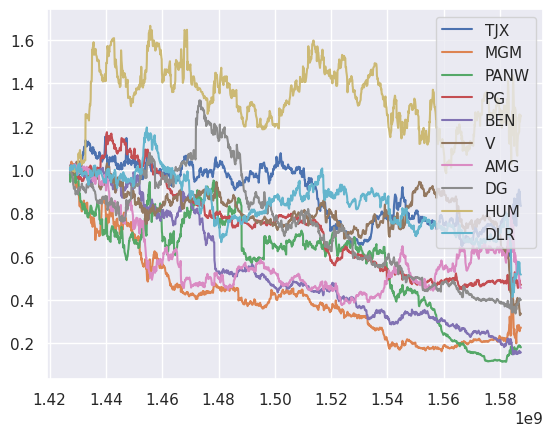

In [ ]:
for ticker in tickers:
  df_plot = df_result[df_result['Ticker'] == ticker]
  plt.plot(df_plot['Date'], df_plot['culm_return'], label=ticker)
plt.legend()
plt.show()

#### machine learning train the SDG to predict the price
+ the first version is no alpha, just train
+ combine with the other alpha and see the results
+ the algorithm should be accurate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# percentage change
df['Price_change'] = (df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change().shift(-1)))*100
df.head()


Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [ ]:
(df['Close'][2]-df['Close'][1])/df['Close'][1]

np.float64(-0.008196827556224933)

In [ ]:
df.dropna(subset=['Price_change'], inplace=True)

In [ ]:
df.shape

(796987, 101)

In [ ]:
SDG_features = [f'SDG_{i}' for i in range(1, 18)] + [f'STS_{i}' for i in range(1, 18)] + [f'LTS_{i}' for i in range(1, 18)]
target = 'Price_change'

#### LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
results = []
sector_result = []

sequence_length = 10

In [ ]:
# two sectors need 11:44 min
for sector, group in df.groupby('GICS Sector'):
    # if sector != 'Financials' and sector != 'Information Technology':
    #     continue
    tickers = group['Ticker'].unique()
    for ticker in tickers:
        print(f"Processing sector: {sector}, ticker:{ticker}")
        df_ticker = group[group['Ticker'] == ticker].dropna()
        if len(df_ticker) < sequence_length + 10:
            continue

        X = df_ticker[SDG_features]
        y = df_ticker[target]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_seq = []
        y_seq = []
        for i in range(len(df_ticker) - sequence_length):
            X_seq.append(X_scaled[i:i+sequence_length])
            y_seq.append(y.iloc[i+sequence_length])

        X_seq = np.array(X_seq)
        y_seq = np.array(y_seq)

        X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
        model = Sequential()
        model.add(LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mean_squared_error')

        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        sector_result.append((sector, ticker, mae, mse, r2))
        print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

Processing sector: Communication Services, ticker:CMCSA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2600
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9501
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0290
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7368
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9126
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0125
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8680
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7615
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6529
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5490
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.2076461514021053, MSE: 2.8477721443140127, R2: -0.2556169489176341
Processing sector: Communication Services, ticker:DIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2284
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0602
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8448
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9313
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4841
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0814
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9113
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9953
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3665
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1040
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 0.989524174740409, MSE: 2.3181914923506164, R2: -0.12807149033327536
Processing sector: Communication Services, ticker:EA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.0145
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3625
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1742
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7196
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5758
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4901
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9447
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2609
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9656
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6814
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.5472926153871251, MSE: 5.687821681827944, R2: -0.10896183991750785
Processing sector: Communication Services, ticker:FWONK
Processing sector: Communication Services, ticker:IPG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1136
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7103
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3333
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7033
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8766
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5862
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3899
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3040
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0177
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0235
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.4157861479984852, MSE: 6.353427737864857, R2: -0.5515151925254278
Processing sector: Communication Services, ticker:LYV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.6893
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5192
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0580
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6713
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2936
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2346
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5192
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4694
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5121
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8970
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.4337567765135963, MSE: 4.894485939629465, R2: -0.023387628969651963
Processing sector: Communication Services, ticker:NFLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.8481
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1346
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9659
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9801
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6246
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3343
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4619
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1436
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0972
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7283
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 2.038032262423532, MSE: 7.58081202220273, R2: -0.07821587531255858
Processing sector: Communication Services, ticker:NWSA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2340
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9343
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0413
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7397
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8042
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2210
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5547
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6222
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7968
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2916
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.2607622331834305, MSE: 2.918554215818864, R2: -0.1870954485578189
Processing sector: Communication Services, ticker:OMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9355
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8222
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6125
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7392
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6400
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5632
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6040
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6227
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2598
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2559
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.0402443845370517, MSE: 2.161423110765278, R2: -0.16598178392956697
Processing sector: Communication Services, ticker:SIRI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3752
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4963
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0974
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0985
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0821
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9228
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8803
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8893
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9003
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7747
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.231639047363179, MSE: 2.783041269933323, R2: -0.17761813751207445
Processing sector: Communication Services, ticker:T
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.3682
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.1819
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6067
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.2903
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.0299
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.5503
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.8641
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6691
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6139
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.4583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
MAE: 1.6970366090044473, MSE: 5.870881509467832, R2: -3.9647303194186527
Processing sector: Communication Services, ticker:TGNA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.9895
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9607
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6625
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0621
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5413
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5439
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4066
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7897
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6920
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0060
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
MAE: 1.7085428131564893, MSE: 7.292288100108513, R2: -0.07691450465864857
Processing sector: Communication Services, ticker:TMUS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.7757
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0154
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5302
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3322
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3327
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5381
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2801
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2477
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5969
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9494
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
MAE: 1.3532642820601382, MSE: 3.6284100671688626, R2: -0.14772818459279913
Processing sector: Communication Services, ticker:TRIP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.6831
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3387
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1664
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8637
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8976
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4759
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8222
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4345
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4022
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8890
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.7949650514354156, MSE: 6.695893573435929, R2: -0.06903088018761627
Processing sector: Communication Services, ticker:TTWO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5283
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8595
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4592
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8881
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0126
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6417
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8155
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3824
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7252
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6479
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
MAE: 1.4837609937405951, MSE: 4.0847429395366825, R2: -0.09667614447256523
Processing sector: Communication Services, ticker:VZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3171
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2888
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1547
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4346
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2369
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1801
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2749
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1967
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0063
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9639
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.9529481538758104, MSE: 1.6631392607645539, R2: -0.30987054361281685
Processing sector: Communication Services, ticker:Z
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 10.7463
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4596
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2665
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7287
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4686
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.3515
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9383
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6705
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3990
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8591
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 2.0746581548126586, MSE: 9.568768677155632, R2: -0.060759390054947904
Processing sector: Consumer Discretionary, ticker:ALV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0660
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7360
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5728
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9150
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4671
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9994
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4409
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8719
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9219
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.5616586107304262, MSE: 5.196451012096151, R2: -0.11054919696989929
Processing sector: Consumer Discretionary, ticker:AMZN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8327
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8516
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2043
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3760
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3656
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2070
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8057
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3526
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0185
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0058
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.5619734425290226, MSE: 4.69105021251822, R2: -0.36160583985443706
Processing sector: Consumer Discretionary, ticker:AN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.5551
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2053
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5928
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5453
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3720
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5835
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6969
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2079
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2101
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1794
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.7700984128118875, MSE: 7.625234226391361, R2: -0.5316122639659682
Processing sector: Consumer Discretionary, ticker:APTV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.3102
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7488 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1903
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3114
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3774 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8389
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1541 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0491 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5881 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4315
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
MAE: 1.804877972404026, MSE: 7.628449060723328, R2: -0.19198335326459715
Processing sector: Consumer Discretionary, ticker:ARMK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.9107
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5347
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1764
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8147
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0668
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3837
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4296
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4061
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7134
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7214
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.1904684038672404, MSE: 4.081437993099778, R2: -0.07752870222418773
Processing sector: Consumer Discretionary, ticker:AZO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.8981
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0381
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7410
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3278
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9082
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6937
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5698
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9117
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9873
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1442
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.2343583282944777, MSE: 3.7250314607412895, R2: -0.2267831572937764
Processing sector: Consumer Discretionary, ticker:BBY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.6203
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9406
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3491
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0885
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1313
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2281
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9900
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8982
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8549
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8141
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.7182213656567682, MSE: 7.141153310915636, R2: -0.19400017712726014
Processing sector: Consumer Discretionary, ticker:BWA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.0679
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2489
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3111
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0172
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6653
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3495
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2177
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8815
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4571
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3709
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.6081448993835796, MSE: 5.263529260262067, R2: -0.1487176202414171
Processing sector: Consumer Discretionary, ticker:CCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.7155
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0442
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5883
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1580
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2919
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7036
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.4558
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9335 
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3534
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3339
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.1437871384941578, MSE: 3.035928821707925, R2: -0.1748962118959807
Processing sector: Consumer Discretionary, ticker:CMG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.6124
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1599
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0149
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3842
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5931
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9957
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2012
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3755
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7611
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3391
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.5502467481034106, MSE: 7.005855366913833, R2: -0.07995114231591005
Processing sector: Consumer Discretionary, ticker:DG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.9228
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8721
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5182
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3764
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8571
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1932
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2197
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9326
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4049
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9730
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.2415268583402863, MSE: 2.8111702641266114, R2: -0.2231112152501633
Processing sector: Consumer Discretionary, ticker:DHI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1980
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6494
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9547
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4500
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2995
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7397
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9120
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2963
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9181
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7998
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.6267998252334075, MSE: 5.939947828545616, R2: -0.2526008892864826
Processing sector: Consumer Discretionary, ticker:DKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.4993
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8597 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1490 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1567 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0928
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1320
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9385  
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3994
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8762 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4497 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
MAE: 1.6715029470668827, MSE: 4.8297907978117625, R2: -0.43919851712673585
Processing sector: Consumer Discretionary, ticker:DLTR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.8401
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2307
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6851
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5726
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8039
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6844
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2667
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6498
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5465
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2652
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.3186077167843286, MSE: 3.565695286001269, R2: -0.24319567915307094
Processing sector: Consumer Discretionary, ticker:DPZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.3469
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.2800
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.2239
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.1801
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.1391
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.1022
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.0709
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0363
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.0024
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.9696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
MAE: 1.2040106765503855, MSE: 1.9846802776374606, R2: 0.01207028681494593
Processing sector: Consumer Discretionary, ticker:DRI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.2363
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1635
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9027
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3235
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2314
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4417
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4293
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6127
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6546
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4379
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.3992793795007994, MSE: 8.29497222019626, R2: -0.8386258683287406
Processing sector: Consumer Discretionary, ticker:EBAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.6093
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6793
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7871
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4715
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3674
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3963
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3662
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3300
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0286
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8667
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.3219783439954702, MSE: 3.6214138813293197, R2: -0.25652698481597547
Processing sector: Consumer Discretionary, ticker:EXPE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.7739
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5826
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3589
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2811
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3937
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7385
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0662
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2114
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2300
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5521
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.4876493455879092, MSE: 6.595899264659145, R2: -0.0641114158044056
Processing sector: Consumer Discretionary, ticker:F
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.7953
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0388
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4676
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9722
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8344
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7573
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3067
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8017
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2797
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8670
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 1.2606635573726688, MSE: 3.0685076470308617, R2: -0.22280029029087967
Processing sector: Consumer Discretionary, ticker:FL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.8469
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5902
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6629
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5532
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7232
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9612
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1273
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1037
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8631
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.7465562892274336, MSE: 7.611400468074808, R2: -0.22739120994190642
Processing sector: Consumer Discretionary, ticker:FOSL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 69.7643
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 51.5574
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 52.1443
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 45.5772
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 45.1976
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 56.7158
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 43.0670
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 50.5064
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 61.2449
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 46.0964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
MAE: 7.152147769662431, MSE: 367.8998316697447, R2: -0.11159409601682313
Processing sector: Consumer Discretionary, ticker:GM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.2306
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3047
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1740
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8685
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2843
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7104
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1291
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2260
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4384
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3008
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.4011571695940908, MSE: 4.2719666174121995, R2: -0.15971242894285176
Processing sector: Consumer Discretionary, ticker:GME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 10.4032
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1058
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1818
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0431
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7103
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3116
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7110
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0675
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1418
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4184
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 2.1526625943964195, MSE: 9.67206827482, R2: -0.19979003645873994
Processing sector: Consumer Discretionary, ticker:GPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2538
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2264
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9420
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9612
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9992
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8542
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6446
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0224
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7877
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5868
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 0.9830609634746469, MSE: 2.9267075572512615, R2: -0.2358125127075601
Processing sector: Consumer Discretionary, ticker:GRMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.7149
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4020
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3001
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1656
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0621
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8000
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6394
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9052
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2494
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1404
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.3096949187315765, MSE: 4.239859257633166, R2: -0.10572565011382862
Processing sector: Consumer Discretionary, ticker:GT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.7535
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0309
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8339
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0597
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0289
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6670
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0503
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4857
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1856
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8366
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.6588746616157675, MSE: 6.237727996920297, R2: -0.19069846372388177
Processing sector: Consumer Discretionary, ticker:HAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.9175
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1745
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1648
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3067
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1981
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2726
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7619
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7708
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2245
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7465
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.3267027871666093, MSE: 4.942578763040304, R2: 0.005103891615232503
Processing sector: Consumer Discretionary, ticker:HBI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.5752
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9366
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4454
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3833
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4689
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5776
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5368
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4309
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5311
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2128
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.6935475314586235, MSE: 6.594530162456806, R2: -0.06418072338175884
Processing sector: Consumer Discretionary, ticker:HD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9358
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4061
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9892
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9272
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1985
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0156
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6531
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7849
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7162
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5028
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.1028449234332218, MSE: 2.890146357188425, R2: -0.2165111433293807
Processing sector: Consumer Discretionary, ticker:HLT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.9415
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6816
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7071
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5312
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2870
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1881
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1933
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4088
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1023
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8798
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.4049437947017418, MSE: 4.704616451668542, R2: -0.21407359607753573
Processing sector: Consumer Discretionary, ticker:HOG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.7540
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5813
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3537
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9017
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7266
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0171
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0571
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1511
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2716
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1456
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.71041821285675, MSE: 6.868152182987508, R2: -0.3478845878528549
Processing sector: Consumer Discretionary, ticker:HRB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.0287
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1323
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7265
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1308
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7434
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9573
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0021
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5363
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8249
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4915
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
MAE: 1.49532554076577, MSE: 5.615267529071886, R2: -0.2681167535238167
Processing sector: Consumer Discretionary, ticker:KMX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6647
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5913
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4908
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2331
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6839
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3811
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9462
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0181
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7157
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6628
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.5714301051314896, MSE: 4.590915554597857, R2: -0.1277917102394086
Processing sector: Consumer Discretionary, ticker:KSS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.1086
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9999
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6134
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2024
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6447
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6082
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1123
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1947
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0898
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4928
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.5668465111121301, MSE: 5.599240372816739, R2: 0.015007649397988376
Processing sector: Consumer Discretionary, ticker:LEA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1856
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5588
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4788
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5116
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1948
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3491
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8702
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9519
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6735
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6910
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.4532662539693935, MSE: 4.618632133753615, R2: -0.1079726347465948
Processing sector: Consumer Discretionary, ticker:LEG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0521
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.9631
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.8933
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.8361
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.7927
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.7559
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.7273
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.7011
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.6757
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.6500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
MAE: 1.0636010021493978, MSE: 1.3203589168396968, R2: -0.49878889247381597
Processing sector: Consumer Discretionary, ticker:LEN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.9487
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2941
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3135
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6756
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7251
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8428
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2843
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8220
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8635
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8028
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.6175921345412112, MSE: 6.079180395164145, R2: -0.17468480787066487
Processing sector: Consumer Discretionary, ticker:LKQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.3462
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6668
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8266
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5569
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6346
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7422
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7025
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7071
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5058
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
MAE: 0.9728568540873138, MSE: 1.7535368289593363, R2: -0.08977661937406567
Processing sector: Consumer Discretionary, ticker:LOW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.4926
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3554
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4826
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5344
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5186
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3869
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4967
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7746
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6157
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3634
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.222637032901089, MSE: 3.5306314840205495, R2: -0.144871386433022
Processing sector: Consumer Discretionary, ticker:LULU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.3517
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7403
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3985
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2756
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0440
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4700
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1726
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4970
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5461
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1576
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.846462874055511, MSE: 8.735865554638691, R2: -0.24394352069664071
Processing sector: Consumer Discretionary, ticker:LVS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.0640
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3784
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6756
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0596
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3498
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2522
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9666
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5743
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2236
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4734
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.506792058386951, MSE: 4.461667081331748, R2: -0.13685909087700754
Processing sector: Consumer Discretionary, ticker:M
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.5950 
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6077
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1237
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4407
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2989
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7992
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6752
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2432
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6917
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2699
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.819431742497433, MSE: 7.866896819678473, R2: -0.025419009456564057
Processing sector: Consumer Discretionary, ticker:MAR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.7295
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6799
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5090
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4832
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3066
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1080
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2089
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5301
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0255
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1074
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.3345494407057317, MSE: 5.406813286999, R2: -0.12659279464637496
Processing sector: Consumer Discretionary, ticker:MAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.0216
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5352
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2753
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1820
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9193
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3501
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3324
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5940
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7802
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3904
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.6974010395278964, MSE: 6.073760448301603, R2: -0.1846639684514817
Processing sector: Consumer Discretionary, ticker:MCD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2009
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8496
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6892
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5133
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5785
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9493
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8895
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9707
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5159
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5387
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 0.960051857272539, MSE: 3.1353783253138796, R2: -0.1516628014610808
Processing sector: Consumer Discretionary, ticker:MELI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.8553
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5041
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7454
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6037
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2485
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2040
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7636
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5539
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0959
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3855
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 2.087173513324454, MSE: 8.340096662880265, R2: -0.35047321670089815
Processing sector: Consumer Discretionary, ticker:MGM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.9435
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5214
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1369
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3759
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2538
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8995
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4636
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9013
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6558
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7451
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
MAE: 1.8556180163657254, MSE: 11.890929855118332, R2: -0.7679391868937464
Processing sector: Consumer Discretionary, ticker:MHK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8288
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6489
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4894
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4325
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4636
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6368
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0387
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9870
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6886
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1977
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.440806094319714, MSE: 8.884337336893173, R2: -0.11834294096205711
Processing sector: Consumer Discretionary, ticker:MTN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.4332
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9905
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3752
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2021
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1108
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7377
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0467
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4420
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5046
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3933
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.198089819582209, MSE: 2.8569712966479024, R2: -0.024300715701580877
Processing sector: Consumer Discretionary, ticker:NCLH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.7703
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0124
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6701
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7883
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4554
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1092
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8525
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1472
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9507
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4534
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 2.0279428764852185, MSE: 19.250968594031733, R2: 0.006864588745499001
Processing sector: Consumer Discretionary, ticker:NKE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2202
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0164
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4293
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5772
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7484
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6332
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0198
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2498
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7832
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9784
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1607832452832065, MSE: 2.6618780170551037, R2: -0.1452995624527451
Processing sector: Consumer Discretionary, ticker:NVR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.7117
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3498
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0901
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8389
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1602
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6654
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9913
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2692
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1019
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9252
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
MAE: 1.379559411622387, MSE: 5.303913340795117, R2: 0.01251685314097839
Processing sector: Consumer Discretionary, ticker:NWL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.8467
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5107
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4691
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4478
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8009
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5602
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5374
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8453
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1048
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6223
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 1.8283651963134562, MSE: 7.388504137040455, R2: -0.2036633206174756
Processing sector: Consumer Discretionary, ticker:ORLY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1137
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6156
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0510
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9073
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6463
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8500
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5921
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2412
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9989
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2127
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.43723609137098, MSE: 4.204574485518662, R2: -0.31639279922617947
Processing sector: Consumer Discretionary, ticker:PHM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7443
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3485
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7001
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1228
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3493
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9967
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3580
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8944
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3744
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7312
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.5408855280685685, MSE: 4.978958077940056, R2: -0.15956961287715843
Processing sector: Consumer Discretionary, ticker:PVH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.8199
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4890
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5404
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0019
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0541
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9053 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2378  
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4931 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4329 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0068  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
MAE: 2.561331553530674, MSE: 23.54548463108387, R2: -0.6495442074662989
Processing sector: Consumer Discretionary, ticker:RCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.1610
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2833
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.4713
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.9669
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6474
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7737
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2113
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0869
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1361
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8552
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.5991321403591514, MSE: 6.6094736932867635, R2: -0.01614212125758896
Processing sector: Consumer Discretionary, ticker:RL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.8767
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7880
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8625
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1774
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6878
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1642
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1449
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3785
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2378
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3618
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.6208473703877, MSE: 6.630675998415011, R2: -0.13519564537349926
Processing sector: Consumer Discretionary, ticker:ROST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.3354
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6430
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6616
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8093
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7582
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3661
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2296
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5502
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0550
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9474
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.3221210825866763, MSE: 3.3813271801575318, R2: -0.5781758690716463
Processing sector: Consumer Discretionary, ticker:SBUX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4723
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0153
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0781
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1734
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4697
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0140
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1616
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8400
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7554
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2510
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 1.1228644446595182, MSE: 2.8013548982622405, R2: -0.0928083209081394
Processing sector: Consumer Discretionary, ticker:TGT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8345
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5963
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3733
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4605
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6603
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9277
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7840
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7662
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0041
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1911
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.324819893944117, MSE: 4.29406909410878, R2: -0.37888316427583946
Processing sector: Consumer Discretionary, ticker:TJX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8998
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2893
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2215
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9915
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2965
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4603
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7360 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6653
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3468
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3211
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
MAE: 1.120681456921139, MSE: 2.269835053607052, R2: -0.03132588927897895
Processing sector: Consumer Discretionary, ticker:TOL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8243
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0713
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7034
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7288
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5128
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6199
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8993
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4045
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8803
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7269
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.6185612271028587, MSE: 8.06088255424655, R2: 0.043936838189089666
Processing sector: Consumer Discretionary, ticker:TPR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.5668
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7947
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9390
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7210
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6853
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3317
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5311
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8101
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5514
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9159
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
MAE: 1.7943726578005217, MSE: 8.151672259088112, R2: -0.018172416243774414
Processing sector: Consumer Discretionary, ticker:TSCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2412
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2095
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1584
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0084
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8881
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2877
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6052
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9702
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1215
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2055
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.484857707530645, MSE: 4.2930981661763115, R2: -0.32623014016103924
Processing sector: Consumer Discretionary, ticker:TSLA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 11.0579
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2067
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4509
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4833
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5868
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9465
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2416
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2469
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8845
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9039
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 2.484187988065264, MSE: 12.189714921110438, R2: -0.14497426170143046
Processing sector: Consumer Discretionary, ticker:ULTA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.8028
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4449
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7054
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4982
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8383
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9454
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3690
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6940
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0899
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7834
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
MAE: 2.198800046137264, MSE: 14.451647191921916, R2: -0.26575853118829307
Processing sector: Consumer Discretionary, ticker:URBN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.5192
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4311
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8401
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7789
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2569
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9267
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7494
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2890
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0363
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3959
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.9860861156025986, MSE: 8.468615451027695, R2: -0.24268732520212155
Processing sector: Consumer Discretionary, ticker:WHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.4017
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3283
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6219
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9541
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3837
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3384
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2198
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5320
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8523
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4336
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.4324712044506673, MSE: 4.002275731289459, R2: -0.20383888190023391
Processing sector: Consumer Discretionary, ticker:WYNN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.0291
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0209
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7109
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1552
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2014
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5229
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9012
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8988 
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3301
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9939
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 2.197948872150168, MSE: 11.21628368297167, R2: -0.24362042590012
Processing sector: Consumer Discretionary, ticker:YUM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.1414
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2896
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8584
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2738
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4671
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7500
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0479
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7486
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5689
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4499
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.2720848220955494, MSE: 5.320185916566105, R2: -0.3507854592208728
Processing sector: Consumer Staples, ticker:ADM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.4942
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1743
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1314
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0703
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3075
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3209
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4756
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1723
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7109
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6297
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1243108913967057, MSE: 2.6856629267118612, R2: -0.16968807931027263
Processing sector: Consumer Staples, ticker:BG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.5242
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1290
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2650
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4871
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8886
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0457
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6474
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4799
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7084
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5537
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.180630402311269, MSE: 3.3992196662354965, R2: -0.22883218869136246
Processing sector: Consumer Staples, ticker:CAG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.3923
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6880
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7041
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8770
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3102
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7970
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3178
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5643
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2747
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4523
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
MAE: 1.246433800108757, MSE: 4.409119383154978, R2: 0.034698305737727586
Processing sector: Consumer Staples, ticker:CHD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.3752
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.3138
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.0454
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.1279
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.8860
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.8324
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.8887
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4064
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.5587
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.3426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
MAE: 0.6032353934021939, MSE: 0.7554122401795087, R2: -0.2330203625482299
Processing sector: Consumer Staples, ticker:CL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5252
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4724
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4322
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3965
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3695
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3426
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3142
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2856
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2574
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
MAE: 0.21446668236755462, MSE: 0.06900703315358471, R2: -0.963399258080061
Processing sector: Consumer Staples, ticker:CLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.8129
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4893
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7137
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7144
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9205
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6925
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4347
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6026
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4782
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3082
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 0.9601987208971072, MSE: 1.667332568121851, R2: -0.2773260794301706
Processing sector: Consumer Staples, ticker:COST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5972
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3323
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4247
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4317
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2474
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2964
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1329
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3290
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1953
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3185
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 0.8954759816379356, MSE: 1.813078986213156, R2: -0.2396115105275065
Processing sector: Consumer Staples, ticker:COTY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.5922
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5754
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3860
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3250
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3773
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8786
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4874
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5241
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2080
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8691
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 2.016020024154546, MSE: 14.01232268903095, R2: -0.34111248080435663
Processing sector: Consumer Staples, ticker:CPB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.4020
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6047
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0941
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6073
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0636
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8946
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0426
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1037
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7673
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6326
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.1202482730927914, MSE: 2.5404783455444333, R2: -0.3854019790425487
Processing sector: Consumer Staples, ticker:EL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.6582
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.2249
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9802
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9439
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2077
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1095
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2689
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1765
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0379
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4441
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.2038625871031603, MSE: 3.174995927159097, R2: -0.05702500857276949
Processing sector: Consumer Staples, ticker:EPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.6957
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3492
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6913
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0998
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5874
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1262
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2635
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3367
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4104
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3987
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.6401157387277037, MSE: 7.244303261412972, R2: -0.6081078539690958
Processing sector: Consumer Staples, ticker:GIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5137
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4801
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3656
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2718
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1737
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2096
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1031
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9801
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0211
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0139
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
MAE: 1.032118959900236, MSE: 1.9993971418744534, R2: -0.27254568775052346
Processing sector: Consumer Staples, ticker:HRL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.8525
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8503
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9781
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7841
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5964
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7406
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1060
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8332
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6378
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4913
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.0592544374252266, MSE: 2.066244718883626, R2: -0.11138468624945919
Processing sector: Consumer Staples, ticker:HSY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5760
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3398
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6269
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7741
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0420
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8816
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0421
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5901
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7070
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1930
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.019996269761501, MSE: 2.491087808397445, R2: -0.6298573358736532
Processing sector: Consumer Staples, ticker:INGR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.9846
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2089
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9534
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7061
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1911
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2168
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3920
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3122
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5616
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5116
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MAE: 1.0677545462654403, MSE: 1.9972912000031424, R2: -0.5128088593235893
Processing sector: Consumer Staples, ticker:K
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6818
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6833
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5960
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7796
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6463
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4388
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5408
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2984
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3323
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2779
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.06345908449284, MSE: 2.811595453968692, R2: -0.26834530055549743
Processing sector: Consumer Staples, ticker:KHC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.0596
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9622
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2229
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1456
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7398
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8180
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8461
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7026
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7512
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0808
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.1948728196675797, MSE: 3.7159159901607897, R2: -0.01627660480106785
Processing sector: Consumer Staples, ticker:KMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5521
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3878
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4189
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3828
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5460
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1191
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0277
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0870
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1406
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0746
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 0.9754388822186194, MSE: 2.1989915439200343, R2: -0.13528462742325242
Processing sector: Consumer Staples, ticker:KO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3062
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0244
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1566
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9957
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1235
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0945
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9641
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1384
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0535
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9950
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.8205403185865635, MSE: 1.533345418805179, R2: -0.2311916225866859
Processing sector: Consumer Staples, ticker:KR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9809
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7311
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5451
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5551
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5174
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8784
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8955
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4590
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8203
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5470
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.2772341194124348, MSE: 3.3769590517505237, R2: -0.18802796849390746
Processing sector: Consumer Staples, ticker:MDLZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5747
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8792
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9537
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0040
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1470
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0228
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4743
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2953
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4601
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3274
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0654968792918191, MSE: 2.01119761092032, R2: -0.20832876053159355
Processing sector: Consumer Staples, ticker:MKC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3580
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6873
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1004
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6094
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4816
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8411
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7932
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5338
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4116
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3540
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 1.0124544716122088, MSE: 2.236835126699404, R2: -0.5460422923804602
Processing sector: Consumer Staples, ticker:MNST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.8096
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6739 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1863 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6875
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9065 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8094 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6538 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8548 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9919 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2322 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
MAE: 1.352339248278584, MSE: 3.210623892446612, R2: -0.33716333869637527
Processing sector: Consumer Staples, ticker:PEP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2990
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5596
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1130
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3138
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2643
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2758
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2459
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3495
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9347
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1055
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
MAE: 0.8417573008197362, MSE: 1.3502260946384232, R2: -0.2653296108842689
Processing sector: Consumer Staples, ticker:PG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.9007
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3525
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6373
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8675
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3004
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1436
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7500
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9769
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5559
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3371
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
MAE: 0.6470133874554124, MSE: 0.7288506970707415, R2: -0.2644979814959798
Processing sector: Consumer Staples, ticker:SJM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3160
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4149
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0782
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3178
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3146
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9204
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2286
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1258
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0092
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1415
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.0119976964676538, MSE: 2.0345566921226275, R2: -0.3374623341096765
Processing sector: Consumer Staples, ticker:STZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6754
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7411
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9432
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8848
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7026
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6846
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8951
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6444
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6074
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5931
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.2379452299661016, MSE: 4.485164515890011, R2: -0.001690102113040437
Processing sector: Consumer Staples, ticker:SYY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3898
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5493
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0489
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7251
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1531
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4464
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1301
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8121
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8525
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5738
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.0523037842787728, MSE: 3.457710394521079, R2: -0.22337186808528542
Processing sector: Consumer Staples, ticker:TSN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7795
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7983
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1407
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1363
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4704
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1898
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0136
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3291
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9311
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8510
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.5180871282722694, MSE: 4.4019364313115235, R2: -0.34495524177008385
Processing sector: Consumer Staples, ticker:WBA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1130
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0586
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2689
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0981
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8126
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6155
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8065
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4115
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2391
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1485
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.2982941774399575, MSE: 3.805553314903253, R2: -0.3663818554557783
Processing sector: Consumer Staples, ticker:WMT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6511
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5208
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5219
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5759
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2042
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4739
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3298
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5446
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6177
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6899
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.8683514732361083, MSE: 1.5495351928776298, R2: -0.10083310599902329
Processing sector: Energy, ticker:AR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.5434
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8762
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0151
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4886
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5981
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6713
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5176
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3309
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1983
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2515
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 2.81023406912991, MSE: 18.580632850380187, R2: -0.03163324609662266
Processing sector: Energy, ticker:CLB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.9599
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7023
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4388
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5407
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3717
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3918
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2241
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4021
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9056
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8188
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
MAE: 2.1931829951582134, MSE: 9.392015520671796, R2: -0.0715030676033106
Processing sector: Energy, ticker:COP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.6952
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2202
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2832
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4153
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8559
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2050
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4016
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8927
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9345
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7312
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.5447793268292627, MSE: 5.577790277371301, R2: -0.04438090295846964
Processing sector: Energy, ticker:CVX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2696
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9878
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7965
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4626
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4360
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7412
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1563
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7236
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1008
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6308
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0934307191549435, MSE: 3.6356541204680144, R2: -0.0011732173603780094
Processing sector: Energy, ticker:DVN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.9728
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5521
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0531
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0202
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0074
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2988
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6405
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8800
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2788
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6777
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 2.0763529501537294, MSE: 9.830740432173258, R2: -0.1876336320481109
Processing sector: Energy, ticker:EOG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.5853
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3395
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4710
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8973
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1345
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4039
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9263
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3376 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8652
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4315
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
MAE: 1.7875976558986746, MSE: 5.688997110707648, R2: -0.25492549221178473
Processing sector: Energy, ticker:EQT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 8.5861
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0162
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.5647
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9074
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.5485
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.6480
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7045
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3380 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5463
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7719
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
MAE: 2.243395246201667, MSE: 10.519378789847684, R2: -0.7117876890605273
Processing sector: Energy, ticker:FANG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.6772
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2399
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.2922
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7910
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1705
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4345
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2850
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0983
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7949
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2468
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 1.970789140534542, MSE: 7.856740569526361, R2: -0.12243532874654739
Processing sector: Energy, ticker:FTI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.7907
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6644
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7905
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6325
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3244
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2334
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3678
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2177
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8323
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1503
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 2.03420008022753, MSE: 10.16173966522379, R2: -0.04732041906593132
Processing sector: Energy, ticker:HAL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.5431
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8511
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0512
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4412
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4067
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6386
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8345
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6752
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5651
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1232
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.7198145800082216, MSE: 6.806335902724661, R2: 0.08263709423733923
Processing sector: Energy, ticker:HES
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.9477
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2690
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4686
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8045
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1503
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0987
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5894
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9394
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7295
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1235
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.7464553790056707, MSE: 5.84730940602952, R2: -0.1428728997074178
Processing sector: Energy, ticker:KMI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.2199
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4343
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6027
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3481
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3206
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2793
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6902
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6023
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0290
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5959
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.4622886773838888, MSE: 5.0214672989117615, R2: -0.22060853473284725
Processing sector: Energy, ticker:LNG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4704
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2709
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7549
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0469
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6319
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6665
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8418
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7403
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6810
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0904
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.7124935778825041, MSE: 5.223382767855845, R2: -0.2510660239419604
Processing sector: Energy, ticker:MPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.7533
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9616
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9531
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1314
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5448
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2383
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3075
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6964
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8593
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1642
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.7146534463322534, MSE: 5.935876837236057, R2: -0.07296129371608484
Processing sector: Energy, ticker:MUR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.2350
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3671
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5544
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8921
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7058
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1893
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4397
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8914
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8443
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7478
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 2.075340712795668, MSE: 9.020552012119929, R2: -0.2831022891122932
Processing sector: Energy, ticker:NBR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 18.5090
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.3197
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.9231
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1638
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2769
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.1676
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.3494
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0976
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.4204
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.0031
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 3.2994184440269656, MSE: 22.064433286126377, R2: -0.2690306613858797
Processing sector: Energy, ticker:OII
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13.0401
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7537
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1358
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9503
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.2637
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.4162
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2000
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6542
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4116
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4509
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 2.2657445814375934, MSE: 10.304963104874519, R2: 0.036627418262632494
Processing sector: Energy, ticker:OKE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.4217
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4457
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3783
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6586
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7883
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2456
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2467
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0323
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1513
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5674
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.6691342096409847, MSE: 7.69027099815499, R2: -0.16903038636021273
Processing sector: Energy, ticker:OXY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.0162
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2008
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0718
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6427
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0450
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5158
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0377
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5929
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7617
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6432
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.277089618409719, MSE: 3.345428540093411, R2: 0.04126606664055987
Processing sector: Energy, ticker:PSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1430
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5795
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4430
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2880
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2542
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3299
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8850
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0246
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9109
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9635
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.3378722436550377, MSE: 4.732013240229318, R2: -0.3175835116838108
Processing sector: Energy, ticker:RRC
Processing sector: Energy, ticker:TRGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.3356
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9378
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9330
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8698
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7170
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8872
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7831
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9954
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1693
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9005
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 2.1487958271419374, MSE: 12.92745394273757, R2: -0.06604000874634286
Processing sector: Energy, ticker:VLO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8118
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2797
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6444
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7155
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3000
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3220
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7205
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6495
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1351
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1404
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.7293162241027182, MSE: 6.595649522714727, R2: -0.25138226960203647
Processing sector: Energy, ticker:WMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.1352
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0759
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1819
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8609 
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3249
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3732
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2533
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9747
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0790
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9546
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.8335693356989302, MSE: 13.353219532506987, R2: -0.18075478131093248
Processing sector: Energy, ticker:XOM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.8812
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7647
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9473
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9582
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5846
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6743
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8345
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6602
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5145
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4785
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.0136647149099132, MSE: 2.3960154937747276, R2: -0.1312941436784152
Processing sector: Financials, ticker:ACGL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.6780
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5474
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3497
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7970
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6625
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7499
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7943
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1869
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6026
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4866
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 0.9777747991748756, MSE: 2.5850748031826485, R2: -0.13844889715877406
Processing sector: Financials, ticker:AFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9077
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6147
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5735
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8445
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9168
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0432
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3014
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6008
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2804
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0085
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 0.8458789796473986, MSE: 1.3023263702597516, R2: -0.02741503436929471
Processing sector: Financials, ticker:AFL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9652
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7988
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9402
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7504
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3149
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5650
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7593
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6701
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3163
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4610
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.9255600340354159, MSE: 2.0614568093035506, R2: -0.47634090242201155
Processing sector: Financials, ticker:AIG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1202
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6205
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3066
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8325
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5486
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5564
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2944
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1203
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7522
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1397
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.0757573943667083, MSE: 3.206633794725105, R2: 0.038780050351352346
Processing sector: Financials, ticker:AIZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9428
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6638
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1766
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9691
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8806
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0188
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8170
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7620
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6965
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5291
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.2118701534948713, MSE: 2.9514408703636485, R2: -0.2742084702780585
Processing sector: Financials, ticker:ALL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9749
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7419
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8136
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1050
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3636
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8667
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7432
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5342
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6828
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4577
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 0.8684746829905141, MSE: 1.9247263574269284, R2: -0.042432533204727285
Processing sector: Financials, ticker:ALLY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8217
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3009
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7355
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1482
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8508
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0436
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4695
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7053
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1533
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.3130755330419634, MSE: 3.465271911823759, R2: -0.16387521128383908
Processing sector: Financials, ticker:AMG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 15.9856
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 15.7721
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 15.5617
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.3569
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 15.1685
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 14.9843
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.8011
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.6111
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.4096
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.1976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
MAE: 1.8740945632207988, MSE: 4.216338661499341, R2: -0.49648529238721495
Processing sector: Financials, ticker:AMP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1319
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7236
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1513
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7985
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9369
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0445
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6744
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9585
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3717
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4831
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.368902586303166, MSE: 3.826564852090642, R2: -0.11935717483977482
Processing sector: Financials, ticker:AON
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7576
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5733
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6158
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4020
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3585
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2413
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4152
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0441
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0845
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3321
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.0270597220269537, MSE: 2.2418276713242427, R2: -0.2792095154968537
Processing sector: Financials, ticker:AXP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8264
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6218
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6397
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8041
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5925
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4513
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2303
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9818
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1604
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1161
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0603753195915024, MSE: 3.2431805237620486, R2: -0.4479526953138473
Processing sector: Financials, ticker:BAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.2359
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7477
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6943
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2624
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6973
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3229
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9490
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7802
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7729
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7379
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.2907144056966426, MSE: 3.0784540065175428, R2: -0.20012379441029426
Processing sector: Financials, ticker:BEN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.7293
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5834
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7028
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4445
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5262
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8590
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5670
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3518
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4298
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3978
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.3660495972639466, MSE: 4.673292699620325, R2: -0.21586612167713715
Processing sector: Financials, ticker:BK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.6717
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.5544
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.4653
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.3963
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.3300
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.2710
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.2125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.1546
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.1035
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.0497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
MAE: 1.293588455766542, MSE: 1.9440628533570103, R2: 0.04600811614481726
Processing sector: Financials, ticker:BLK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0678
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1174
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9377
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5527
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5386
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6476
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3798
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9383
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8021
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5297
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.1162810405793493, MSE: 2.8437952262902066, R2: -0.16308091961246118
Processing sector: Financials, ticker:C
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7927
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8316
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6734
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4942
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1014
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8919
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5128
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7361
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5673
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4467
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.2738081399202035, MSE: 3.4128419824372793, R2: -0.040764990646547705
Processing sector: Financials, ticker:CBOE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.8283
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8710
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6622
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2519
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9346
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9065
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6955
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6008
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3718
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3410
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
MAE: 1.517873598198183, MSE: 6.227260411292401, R2: -0.751184970471074
Processing sector: Financials, ticker:CFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.2871
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0543
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1834
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9096
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9843
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7940
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3350
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2405
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2835
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1523
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.3999734042983198, MSE: 4.337630475794918, R2: -0.006202927066765174
Processing sector: Financials, ticker:CINF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0971
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8250
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7149
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8076
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4560
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5337
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5993
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1424
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2067
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1477
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MAE: 1.1287679675812483, MSE: 3.87173984211117, R2: -0.1542900788266608
Processing sector: Financials, ticker:CMA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.5034
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9298
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0181
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6792
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5935
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7356
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5962
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7788
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1276
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2018
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.4186188909375927, MSE: 5.034008253663183, R2: -0.21483396527763965
Processing sector: Financials, ticker:CME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3267
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2945
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6530
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1850
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3767
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9937
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1027
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2569
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4230
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4415
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.111478228558823, MSE: 2.87011556545101, R2: -0.0413680810677004
Processing sector: Financials, ticker:COF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7936
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6786
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8701
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4920
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3336
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9684
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8353
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0947
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8538
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8845
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.3579463465496524, MSE: 5.272889128544693, R2: -0.19584137173595928
Processing sector: Financials, ticker:EWBC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.1286
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6571
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2638
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2113
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5376
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1010
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4525
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7733
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7694
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3906
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
MAE: 1.8835919620779213, MSE: 5.767187186427718, R2: -0.6133699528923124
Processing sector: Financials, ticker:FITB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.0009
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8897
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3560
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2236
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1777
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2806
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1346
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8663
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3343
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0017
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.3576964615838605, MSE: 4.153631246349655, R2: -0.03890528541246385
Processing sector: Financials, ticker:FNF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.8250
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0017
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2608
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8392
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5016
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9439
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7629
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7173
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0021
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8037
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.1740558077444656, MSE: 3.0341820467363627, R2: -0.2824445567716032
Processing sector: Financials, ticker:GNW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 14.1764
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.4778
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7604
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5200
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.4344
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.4043
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.5526
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.3174
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.4235
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.5504
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 2.4975254845255592, MSE: 15.215950589132943, R2: -0.1904401259782582
Processing sector: Financials, ticker:GS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.5242
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1789
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0694
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2022
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3972
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3131
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3243
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6445
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7334
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8106
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.1647934831918825, MSE: 2.7614478178791844, R2: 0.0073984468766958855
Processing sector: Financials, ticker:HBAN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0355
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5115
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9649
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2636
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6881
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4389
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9455
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3156
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1126
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6602
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.3021156515798782, MSE: 3.2455183369846465, R2: -0.23508402202526435
Processing sector: Financials, ticker:ICE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5003
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0022
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2043
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9721
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9094
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9407
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7973
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1172
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1948
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8683
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.055260037953455, MSE: 2.3282878222334156, R2: -0.06545354881275345
Processing sector: Financials, ticker:IVZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.3096
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5297
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7699
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2254
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2618
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8172
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7386
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3574
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0012
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6366
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.477434318301738, MSE: 4.708771559317088, R2: -0.17012777477594865
Processing sector: Financials, ticker:JPM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2358
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5639
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9377
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4167
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6493
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7252
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3176
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4808
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4476
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7702
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.1545053758825836, MSE: 2.6285435773953045, R2: -0.21819188705434067
Processing sector: Financials, ticker:KEY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2665
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7792
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4259
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4479
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2883
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0847
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9210
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0238
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0946
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5732
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.3949683211422805, MSE: 3.9342397448512454, R2: -0.43484606221199296
Processing sector: Financials, ticker:L
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6771
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6019
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5004
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1723
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2987
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1748
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1930
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2770
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0129
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9700
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.2664157672676486, MSE: 9.196774390507116, R2: -1.2073664344402766
Processing sector: Financials, ticker:LNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.0910
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1592
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3903
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5236
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7571
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3733
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1674
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2848
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2163
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9414
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.542236407970179, MSE: 5.21643987011778, R2: -0.1838268905379714
Processing sector: Financials, ticker:MCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.4779
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8469
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9452
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8769
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5135
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0279
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8701
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7911
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9433
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6806
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.1361209279413682, MSE: 3.3809258683811954, R2: -0.05036502551682509
Processing sector: Financials, ticker:MET
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.1525
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4320
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9092
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2599
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0588
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4834
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7025
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1661
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7738
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4161
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.3686871044895108, MSE: 4.028317959762135, R2: -0.24504360836273653
Processing sector: Financials, ticker:MMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0206
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6234
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4725
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5428
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2859
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2356
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5632
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1289
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1512
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1361
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 0.8659486939358753, MSE: 1.569640482675072, R2: -0.36598485138614145
Processing sector: Financials, ticker:MS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.7675
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9946
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2808
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5706
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2137
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9009
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6520
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2823
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0641
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9303
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.3859700126661818, MSE: 3.924162162995959, R2: -0.09419867847336172
Processing sector: Financials, ticker:MTB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.2987
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5994
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8474
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3592
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4676
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9505
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3836
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2818
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1015
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2851
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.2641582491452512, MSE: 4.233957784191808, R2: -0.2499865016004319
Processing sector: Financials, ticker:NAVI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.7435
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6880
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7809
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2526
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0279
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6858
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2028
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0043
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0995
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7932
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.937355859782687, MSE: 10.205215667194732, R2: -0.05114711062806698
Processing sector: Financials, ticker:NDAQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3366
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0154
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7842
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9686
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6630
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7906
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7490
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2186
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9779
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9529
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.077491067863619, MSE: 3.198193221733762, R2: -0.13571142092885835
Processing sector: Financials, ticker:NTRS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4795
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3863
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0883
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0858
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8717
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0431
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7952
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5660
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7118
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7943
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.355931422053816, MSE: 4.504783213581942, R2: -0.3216858548608361
Processing sector: Financials, ticker:PFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1128
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5833
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8532
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4437
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0424
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2072
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6342
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8734
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7746
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4139
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.315526793699948, MSE: 3.619973369750157, R2: -0.00882345689127173
Processing sector: Financials, ticker:PGR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8809
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4087
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5368
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5467
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3966
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2688
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3343
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5526
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3583
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1386
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.1432781959332454, MSE: 3.0082396786427803, R2: -0.13762288133402634
Processing sector: Financials, ticker:PNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.8941
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3460
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5423
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2159
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0927
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2665
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4028
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7437
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4585
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6084
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.070645118191096, MSE: 2.5311889369853326, R2: 0.011029266615857125
Processing sector: Financials, ticker:PRU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.4985
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3256
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5828
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4956
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2746
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8675
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6396
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9935
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9999
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7621
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.4279414122030107, MSE: 4.505702500591388, R2: -0.32505160345735584
Processing sector: Financials, ticker:RF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0773
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0126
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6496
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7115
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2977
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9180
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1420
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4580
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0539
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6364
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.5192581758201644, MSE: 5.369740134347337, R2: -0.05792336077362892
Processing sector: Financials, ticker:RGA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1225
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7555
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8376
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9295
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6605
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6782
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4860
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3244
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0869
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2492
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 0.9864570708126722, MSE: 2.668758385730935, R2: -0.17994921880915804
Processing sector: Financials, ticker:RJF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2967
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4277
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5383
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6563
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8926
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4940
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5512
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3855
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4449
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0974
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.2917658263473972, MSE: 3.067401740460844, R2: -0.26292896091785845
Processing sector: Financials, ticker:RNR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7269
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4192
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5505
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4595
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5095
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3849
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2802
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2947
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0500
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0741
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 0.9634620412112986, MSE: 2.638129185916986, R2: -0.17505403612566028
Processing sector: Financials, ticker:SCHW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.0367
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6450
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3767
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1117
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2175
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3004
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1390
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7669
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0648
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1035
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.6599019492766214, MSE: 5.111464009962091, R2: -0.13067263777524163
Processing sector: Financials, ticker:SEIC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3416
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7825
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3751
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9573
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9553
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8329
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9277
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8481
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4106
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7238
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 1.1239856113768112, MSE: 2.5159258546857464, R2: -0.12014483240188034
Processing sector: Financials, ticker:SPGI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.6480
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5574
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6005
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.0962
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5261
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.6261
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5404
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5355
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.5340
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.2576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
MAE: 1.2783459896516025, MSE: 2.495564940732929, R2: 0.132762521942822
Processing sector: Financials, ticker:STT
Processing sector: Financials, ticker:SYF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.2726
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.1413
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.0254
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.9347
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.8523
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3.7734
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.6957
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3.6171
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.5454
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.4780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
MAE: 1.0397195992093011, MSE: 1.3284744733019545, R2: -0.84670578422626
Processing sector: Financials, ticker:TROW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1631
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3384
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0563
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6802
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1132
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3606
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1772
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2210
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4381
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6080
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.2019840834524442, MSE: 2.81071084520426, R2: -0.10345804250042034
Processing sector: Financials, ticker:TRV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5428
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3592
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8246
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1891
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2860
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2721
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4064
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0820
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0448
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9628
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.004146588661721, MSE: 3.4598925062145005, R2: -0.5827487479410696
Processing sector: Financials, ticker:UNM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5106
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6717
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1172
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2623
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9247
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4276
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4125
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2357
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1910
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0768
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 1.4660247423097856, MSE: 4.212635180966425, R2: 0.11750922215404713
Processing sector: Financials, ticker:USB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.6498
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9021
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1487
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8380
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5984
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.4031
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6624
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3143
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.6269
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
MAE: 1.6979300204440786, MSE: 10.30528943816721, R2: -0.16126307734984247
Processing sector: Financials, ticker:VOYA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7932
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0826
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2947
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0041
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8475
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8806
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4641
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2699
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3682
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1670
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
MAE: 1.449518510082438, MSE: 4.0148889203072065, R2: -0.16671193941606854
Processing sector: Financials, ticker:WFC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1065
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9454
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3947
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2893
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1521
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7817
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9763
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5356
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7988
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1645
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0912943773447847, MSE: 2.321025421594998, R2: -0.06443090043925914
Processing sector: Financials, ticker:WRB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2231
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0802
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1073
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1785
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0110
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9523
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8664
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0275
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9674
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8377
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 0.9105996819436785, MSE: 1.666968950973224, R2: -0.2351737033610921
Processing sector: Financials, ticker:ZION
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.2811
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9014
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8793
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3849
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8867
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9744
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1063
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6908
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3581
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6738
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.2882951574004362, MSE: 2.890894465329654, R2: 0.021466122597253112
Processing sector: Health Care, ticker:ALGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.5886
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.8562
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.5061
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0089
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.0161
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.3028
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.9311
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.6238
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.7793
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.4228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
MAE: 1.3508881750781583, MSE: 3.939809834817726, R2: -0.0757409052119411
Processing sector: Health Care, ticker:ALKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.2232
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2585
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6268
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6269
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.6995
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6165
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8973
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1791
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9294
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6684
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 2.379000895619717, MSE: 19.310243524637126, R2: -0.957365897055084
Processing sector: Health Care, ticker:ALNY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 17.8612
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5262
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.4477
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7800
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.1203
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.4867
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3028
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4844
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8991
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.5787
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 2.7664388602124754, MSE: 13.462241230006647, R2: -0.11063563117978248
Processing sector: Health Care, ticker:AMGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.7189
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7298
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6595
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6912
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5886
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4871
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5807
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2888
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0070
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0295
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.2719166698985411, MSE: 3.2040827316667486, R2: -0.12405880410115144
Processing sector: Health Care, ticker:BAX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9597
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1311
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0341
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8526
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6060
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8471
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8262
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9706
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5582
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5821
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0493689400235926, MSE: 2.271374064331118, R2: -0.3942076642481238
Processing sector: Health Care, ticker:BDX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2609
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7346
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0048
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7805
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4806
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5704
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6278
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8157
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4350
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3760
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.1070874473827939, MSE: 2.1092968906286567, R2: -0.3804687990010942
Processing sector: Health Care, ticker:BIIB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.8039
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3904
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3901
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5204
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5149
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0234
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0229
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5452
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7555
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3957
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.662533455772467, MSE: 5.389633473896184, R2: -0.2212093262903676
Processing sector: Health Care, ticker:BMRN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.6569
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3921
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3801
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1581
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2251
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0024
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0019
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2810
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1883
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1493
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 2.0361314483377657, MSE: 7.302229099869832, R2: -0.28633383747454655
Processing sector: Health Care, ticker:BMY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5957
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8005
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0480
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4399
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5006
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4768
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7136
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1499
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0413
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9490
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.2704724306277984, MSE: 2.895714298797125, R2: -0.26543514092652054
Processing sector: Health Care, ticker:BSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8916
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6172
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0307
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9961
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5096
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7270
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7052
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0609
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5998
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3453
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.4080507144871115, MSE: 4.348840482032122, R2: -0.18897503746409616
Processing sector: Health Care, ticker:CAH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2060
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7437
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7663
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6648
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7924
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4484
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6768
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7234
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2175
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5765
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.2784168962219462, MSE: 2.924694104644844, R2: -0.1512919718594945
Processing sector: Health Care, ticker:CNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.4822
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7727
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7604
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5183
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3228
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8314
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2642
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7056
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8322
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3238
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.8321952544295836, MSE: 7.412653321987466, R2: -0.07487401805685301
Processing sector: Health Care, ticker:COO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4885
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1519
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5609
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0501
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8824
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5165
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1610
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9851
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7812
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9767
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
MAE: 1.13142260975901, MSE: 2.6237394296544765, R2: -0.14502962040616785
Processing sector: Health Care, ticker:CVS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.0158
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8908
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6862
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5950
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6469
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9735
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0904
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1784
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7737
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5266
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.2131351030578597, MSE: 2.7358070635072678, R2: -0.16844718366198763
Processing sector: Health Care, ticker:DGX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2904
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9350
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0096
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9438
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5451
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6976
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6624
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5994
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4178
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2364
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.188837648294942, MSE: 4.391299007895656, R2: -0.2803031637682938
Processing sector: Health Care, ticker:DHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4719
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6165
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6660
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5137
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9065
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3664
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6235
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0920
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1080
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6055
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
MAE: 0.9027072100991241, MSE: 2.0298481853333787, R2: -0.17424274801769024
Processing sector: Health Care, ticker:DVA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.2821
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2701
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4431
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9503
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6627
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8060
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3581
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6122
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3905
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2753
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.4494548526700683, MSE: 4.966833242443698, R2: -0.19763676069300917
Processing sector: Health Care, ticker:DXCM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 14.3514
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4448
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5476
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0422
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.4054
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3437
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.9231
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8455
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3768
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4553
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MAE: 1.8200894372114405, MSE: 5.041867520920157, R2: -0.24920966810591327
Processing sector: Health Care, ticker:EW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1451
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6069
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7006
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2660
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8103
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4220
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0824
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8894
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0098
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9589
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.4850681403968011, MSE: 5.056762534228896, R2: -0.19109436235077415
Processing sector: Health Care, ticker:GILD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4153
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9986
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2105
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9266
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9904
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8893
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8115
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8671
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6225
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1252
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.4040985843825873, MSE: 4.127314809300885, R2: -0.36573979169365134
Processing sector: Health Care, ticker:HCA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.7455
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4001
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8870
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6521
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5808
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6930 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9448
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0402 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8280
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
MAE: 1.3619633399959252, MSE: 3.368141532649371, R2: -0.15927037998513716
Processing sector: Health Care, ticker:HOLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.7863
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4044
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5417
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3243
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9666
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3589
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2172
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0703
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3483
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8436
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.324934103683362, MSE: 3.7618141151663953, R2: -0.16066008013687405
Processing sector: Health Care, ticker:HSIC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4900
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2611
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5757
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1362
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3788
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7442
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0844
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0512
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6476
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6877
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 1.0552730215879562, MSE: 1.9804703784301283, R2: -0.215929052798151
Processing sector: Health Care, ticker:HUM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.4084
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2315
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8007
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3696
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4205
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3812
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2095
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0535
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2123
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7234
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.1689360698421962, MSE: 2.7846461742700783, R2: -0.08204261642755384
Processing sector: Health Care, ticker:IDXX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.3389
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5080
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8605
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9643
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2762
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9816
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2091
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4471
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0404
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0109
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
MAE: 1.576661669348707, MSE: 5.665783852558289, R2: -0.29967108887163274
Processing sector: Health Care, ticker:ILMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.2916
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4328
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6003
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7318
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8099
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7223
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9013
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1806
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7577
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0061
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.8132229163539106, MSE: 7.4659484674737016, R2: -0.29948146572061707
Processing sector: Health Care, ticker:INCY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.7088
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6495
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3710
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3530
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8390
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2945
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9242
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6288
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3764
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9611
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 2.2657685665372016, MSE: 11.561843933999876, R2: -0.3209075787318154
Processing sector: Health Care, ticker:IQV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6240
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3509
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8746
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6887
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3033
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0348
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2512
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9499
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.6398
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0572
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
MAE: 2.2292126289210117, MSE: 14.73921349127766, R2: -1.4089967271477213
Processing sector: Health Care, ticker:ISRG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.6394
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6773
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5026
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6526
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9637
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9957
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5754
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7333
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1281
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9036
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.2918056781147804, MSE: 3.332146542514507, R2: -0.2216986843756641
Processing sector: Health Care, ticker:JAZZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.9096
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9536
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5493
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7367
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1869
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4585
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4777
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0247
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8840
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8934
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.7775370061647913, MSE: 5.97479534648488, R2: -0.20955646997178334
Processing sector: Health Care, ticker:JNJ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.4847
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6314
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6639
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6550
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6337
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2307
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2514
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5327
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1969
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1703
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 0.8619780188784444, MSE: 1.761112781401473, R2: -0.18524962978809278
Processing sector: Health Care, ticker:MCK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2838
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6563
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1919
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4033
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2082
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7300
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9499
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2369
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4359
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6814
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.3283857584364482, MSE: 4.678802905425265, R2: -0.09019664623922785
Processing sector: Health Care, ticker:MD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8679
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4238
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9001
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7013
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0199
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6031
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3201
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5502
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3263
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7033
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
MAE: 1.4722045070749648, MSE: 4.306433008238353, R2: -0.08361985509792147
Processing sector: Health Care, ticker:MDT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7688
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9585
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4752
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6754
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6968
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5662
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7587
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8267
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2516
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4541
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.0229301270826243, MSE: 2.3006378043597455, R2: -0.16886364221060424
Processing sector: Health Care, ticker:MRK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8460
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7773
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5809
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4444
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6085
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6010
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3176
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3018
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1555
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2572
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.19442423007357, MSE: 3.2587732571601133, R2: -0.22069736960873554
Processing sector: Health Care, ticker:MTD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.9316
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0195
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0379
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6960
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7806
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8562
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8074
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7841
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6872
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4349
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
MAE: 1.1337940883826014, MSE: 2.6259305918712115, R2: -0.1701646812978157
Processing sector: Health Care, ticker:PFE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8776
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3782
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4245
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5381
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2793
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4036
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2880
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2153
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1906
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2621
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.964936406623465, MSE: 1.9408277432320813, R2: -0.12349425610836784
Processing sector: Health Care, ticker:PRGO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.5359
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2400
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9414
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2409
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8711
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4900
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2080
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9266
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9608
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7102
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.4354364285924526, MSE: 4.279700493031545, R2: -0.168022029137205
Processing sector: Health Care, ticker:REGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.5028
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9040
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2901
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5293
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9341
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5606
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9482
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3140
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1780
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0036
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.7570414446001588, MSE: 5.587563156444318, R2: -0.19721134840784416
Processing sector: Health Care, ticker:RMD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.1486
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1228
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9014
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5159
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2486
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7564
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3791
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3378
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4584
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1404
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 1.1229749374798867, MSE: 2.4023292962694525, R2: -0.42399984111544686
Processing sector: Health Care, ticker:SYK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5206
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8826
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0998
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1027
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4468
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1488
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8844
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0085
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8796
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8158
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.0660128603872674, MSE: 3.0078055764311986, R2: -0.17132829782653913
Processing sector: Health Care, ticker:TFX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6385
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4423
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4337
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9893
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5347
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4895
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4429
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2256
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3846
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9138
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
MAE: 1.0186506879794077, MSE: 2.3871630341274948, R2: -0.23703019641051726
Processing sector: Health Care, ticker:TMO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.3310
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9726
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9851
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0200
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0380
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5925
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6019
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7196
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4871
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3637
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.1640294625543437, MSE: 2.660244612171323, R2: -0.16187752678172562
Processing sector: Health Care, ticker:UNH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6067
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4370
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2197
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1539
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2684
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9897
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1901
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8494
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7664
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3409
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.2759247986662994, MSE: 3.3162661086370067, R2: -0.09066025599517147
Processing sector: Health Care, ticker:UTHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4253
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3756
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4615
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1912
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2472 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4695
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7107
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0679
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6713
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1442
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.7376851488938132, MSE: 5.417272555527932, R2: -0.1256187905787065
Processing sector: Health Care, ticker:VEEV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.2781
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5947
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8694
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8647
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3395
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2944
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5959
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8154
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5248
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4881
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 1.827983518902989, MSE: 5.460574794712346, R2: -0.15743632013158182
Processing sector: Health Care, ticker:VRTX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.9571
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3491
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4644
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7759
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8230
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7389
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7948
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6371
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1804
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8344
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.90281463906763, MSE: 6.214458082779794, R2: -0.2598626429398454
Processing sector: Health Care, ticker:WAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6180
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0757
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2156
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2141
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2061
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1194
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8441
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9694
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6901
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8412
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.1493524730315394, MSE: 2.707232377410468, R2: -0.26896802555187227
Processing sector: Health Care, ticker:XRAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7842
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9027
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3435
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2750
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3244
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4740
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9561
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7049
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8568
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6628
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
MAE: 1.4546459069640416, MSE: 7.362512983515464, R2: -0.10417710339297237
Processing sector: Health Care, ticker:ZBH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.8191
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7053
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2170
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8029
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7166
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4503
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2475
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8585
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2461
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2384
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.0570226291078737, MSE: 2.1609007842187467, R2: -0.059473764469665014
Processing sector: Health Care, ticker:ZTS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2485
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6553
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0600
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6650
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1262
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7087
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4523
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5773
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4992
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5908
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.3107731624398937, MSE: 3.3755684606518317, R2: -0.24196308575603842
Processing sector: Industrials, ticker:AGCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1625
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7283
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8298
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2188
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1968
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9546
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4237
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5896
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7566
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8246
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.4258504059160892, MSE: 4.013437457284759, R2: -0.12015207075203604
Processing sector: Industrials, ticker:ALLE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.6022
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0121
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.9728
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0722
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.7028
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6278
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5867
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6173
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5691
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
MAE: 1.3108923054145327, MSE: 2.672043542899656, R2: -1.374268124756774
Processing sector: Industrials, ticker:AME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6063
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3941
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3925
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3711
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3101
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5295
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7508
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6063
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1267
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1050
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.0258738436593988, MSE: 2.2086377988382746, R2: -0.3128465186088323
Processing sector: Industrials, ticker:AOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7041
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6234
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6200
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7186
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6196
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3668
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5389
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4938
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3577
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2520
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
MAE: 1.1814696272599954, MSE: 2.898712298091441, R2: -0.3254656380209884
Processing sector: Industrials, ticker:AYI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.6754
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6826
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9555
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5727
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5474
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1923
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2512
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6064
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6607
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9992
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.63230121777023, MSE: 5.191874542406034, R2: -0.47396659313976075
Processing sector: Industrials, ticker:CAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1561
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9750
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5946
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8327
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6952
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1142
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5273
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6350
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4438
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2830
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.2501226066900257, MSE: 3.054050544805106, R2: -0.24410281432944103
Processing sector: Industrials, ticker:CHRW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1359
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8845
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7376
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5503
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4692
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6756
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3555
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0412
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0510
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9543
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.0004159115038085, MSE: 2.0644309834449412, R2: -0.1399698691971507
Processing sector: Industrials, ticker:CMI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5030
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8084
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5123
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5475
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5915
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0642
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4179
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4241
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5646
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9759
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.3218397130179882, MSE: 3.3172939774727404, R2: -0.27441029315401955
Processing sector: Industrials, ticker:CSGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.0200
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9507
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6388
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4794
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9306
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3504
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5904
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1135
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1651
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7784
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.3008994406709662, MSE: 3.317420773573129, R2: -0.2493474381406373
Processing sector: Industrials, ticker:CSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9836
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9794
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3774
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9304
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6440
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6748
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5063
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8473
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4461
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3799
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.3921968865120644, MSE: 5.338353652727398, R2: -0.1617741451320387
Processing sector: Industrials, ticker:CTAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1873
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6359
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6364
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2662
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2929
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2858
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9462
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6535
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4584
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9581
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 1.1646709985563442, MSE: 4.3695173703203025, R2: -0.9152016917652226
Processing sector: Industrials, ticker:DAL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.6166
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0507
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3632
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2615
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9763
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5210
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6692
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0937
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3963
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9399
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.6448836551442587, MSE: 6.370072784437414, R2: -0.030879686016753283
Processing sector: Industrials, ticker:DE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5190
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5411
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5512
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7012
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4876
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5610
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7013
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3959
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7887
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6418
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.257722483118088, MSE: 3.992774894483269, R2: -0.29427990464588727
Processing sector: Industrials, ticker:DOV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.6639
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9233
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6602
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9252
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4258
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4705
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6386
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6857
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0581
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3528
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 1.2396464763557733, MSE: 3.354841205716003, R2: -0.21174643942924343
Processing sector: Industrials, ticker:EFX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4432
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4785
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4752
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4334
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3776
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1104
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0246
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2167
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2165
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2630
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.222756855730788, MSE: 2.9733158863767044, R2: -0.13643203040191376
Processing sector: Industrials, ticker:EMR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.4139
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6604
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2495
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5626
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4872
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0370
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1057
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7636
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9519
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5944
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.242840321178892, MSE: 4.133836668991053, R2: -0.2944400035466923
Processing sector: Industrials, ticker:ETN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0828
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7075
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0699
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2877
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9576
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1553
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0104
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1299
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2132
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9793
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.3175388034655644, MSE: 4.178256649952203, R2: -0.6511204815570646
Processing sector: Industrials, ticker:FAST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0656
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3143
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5775
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9062
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8180
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7263
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6299
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5985
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8830
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1727
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.285367984451297, MSE: 2.9081360431544963, R2: -0.21886282444533078
Processing sector: Industrials, ticker:FDX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.9726
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6997
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0088
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6917
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9208
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5456
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9120
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8204
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1035
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5789
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1579003450784495, MSE: 3.192988493975224, R2: -0.09640299948419395
Processing sector: Industrials, ticker:FLR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 11.4806
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.6123
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2447
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7293
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.5058
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.1254
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8631
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7622
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.0228
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9316
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.5621843158765756, MSE: 5.987180399431999, R2: -0.056540273705951716
Processing sector: Industrials, ticker:FLS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.0887
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4232
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9089
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1493
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6504
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3710
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4329
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7675
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0832
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8230
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MAE: 1.578925071025094, MSE: 5.018468279398913, R2: -0.03201795318079603
Processing sector: Industrials, ticker:FTV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0513
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5128
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1088
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0950
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3322
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5891
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0213
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6542
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1142
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2681
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.0313179805306278, MSE: 2.184731573365892, R2: -0.22903591694668202
Processing sector: Industrials, ticker:HON
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.1997
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7738
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2506
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1488
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9520
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7160
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6235
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5664
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8263
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4453
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.8912685582802049, MSE: 1.660942213442004, R2: -0.18378507789321818
Processing sector: Industrials, ticker:IEX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.6028
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3229
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3036
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7929
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5696
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3230
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3216
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3253
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0929
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4356
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
MAE: 0.9428228323243094, MSE: 1.7662256821134756, R2: -0.2640941834372701
Processing sector: Industrials, ticker:ITW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.7365
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5935
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6627
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3926
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5223
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3267
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4312
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3386
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4409
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3488
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.0622733309652033, MSE: 2.3676626753875816, R2: -0.0966070253808049
Processing sector: Industrials, ticker:JCI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4775
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2358
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2586
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0918
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2572
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1824
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9496
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0385
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7553
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1359903700198022, MSE: 2.860058504401857, R2: -0.3078022600750552
Processing sector: Industrials, ticker:LII
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5826
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0100
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1813
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0947
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1629
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7003
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0650
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7554
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7311
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9228
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.235424199697032, MSE: 3.2883273031616693, R2: -0.19815325142844142
Processing sector: Industrials, ticker:LUV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.1955
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7610
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6758
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8612
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7662
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4752
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7450
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5218
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8210
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5479
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.2974688398357284, MSE: 3.32043188193637, R2: -0.11500366761904379
Processing sector: Industrials, ticker:MAN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8123
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3396
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5131
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9910
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9022
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8421
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8124
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5210
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6888
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7321
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 1.5286761748619535, MSE: 6.007540217171276, R2: -0.2206151431011849
Processing sector: Industrials, ticker:MAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.1030
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6820
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8554
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5687
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6270
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4401
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4327
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5047
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2124
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6537
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.2654721158329088, MSE: 3.2639222005559323, R2: -0.134945688527895
Processing sector: Industrials, ticker:MIDD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.4644
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8111
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6675
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9376
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0135
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1008
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7644
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8554
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7218
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0379
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
MAE: 1.274293343096247, MSE: 2.99788080900083, R2: -0.14163164679487195
Processing sector: Industrials, ticker:NSC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8553
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1037
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9971
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8918
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0779
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8285
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1681
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4962
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7590
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1820
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.3114459454926952, MSE: 4.298934091377237, R2: -0.1959702386042561
Processing sector: Industrials, ticker:OC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6667
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0487
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4998
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2725
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7498
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7665
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7071
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4961
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3315
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3240
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.445283825769564, MSE: 4.730474369668511, R2: -0.158982065634927
Processing sector: Industrials, ticker:ODFL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.9510
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4697
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7582
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5418
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3514
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1704
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2964
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4450
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9875
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8916
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.374006885443774, MSE: 4.508562650608195, R2: -0.21426938473583546
Processing sector: Industrials, ticker:PCAR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5286
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2590
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1112
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4685
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6700
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1278
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0886
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9728
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5963
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9308
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.253239055384201, MSE: 3.059682428222845, R2: -0.14408325536069566
Processing sector: Industrials, ticker:PH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.3861
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8424
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2036
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5980
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2035
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3139
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1563
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5116
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9927
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.549048972924012, MSE: 6.533848001927982, R2: -0.11715963443079391
Processing sector: Industrials, ticker:PNR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3481
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3874
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9446
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4083
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0581
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1180
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9323
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1570
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5270
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6391
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
MAE: 1.3252291168001142, MSE: 3.5936424739600703, R2: -0.23529656384879138
Processing sector: Industrials, ticker:PWR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0299
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5744
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4892
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8415
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3854
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5551
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6481
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3822
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3893
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0821
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 1.2853088050884618, MSE: 3.268543155883924, R2: -0.2789725044115279
Processing sector: Industrials, ticker:ROK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.9718
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9402
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0630
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2515
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9860
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0269
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7255
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5431
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0979
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8008
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.184926336050021, MSE: 2.9275670888298904, R2: -0.28295614299423244
Processing sector: Industrials, ticker:ROL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4229
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8587
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8345
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3722
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6078
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4868
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5586
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3567
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3415
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2833
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MAE: 1.0810429363717664, MSE: 2.005786056541737, R2: -0.3108550041882976
Processing sector: Industrials, ticker:ROP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.1794
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6605
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0459
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1909
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6528
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7595
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3017
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6511
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3719
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2235
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 1.0795436775743683, MSE: 2.0932210714753854, R2: -0.31007813429476716
Processing sector: Industrials, ticker:RSG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4416
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3271
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2739
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6465
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0540
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0822
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1457
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2372
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1651
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0607
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 0.7396772737328527, MSE: 1.1258705801523925, R2: -0.22704499199991135
Processing sector: Industrials, ticker:SNA
Processing sector: Industrials, ticker:SWK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3321
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9854
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2051
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7610
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8035
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8894
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7917
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6087
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5071
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7598
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MAE: 1.330891724829646, MSE: 6.2432360737165595, R2: 0.04014710110081776
Processing sector: Industrials, ticker:TRU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7904
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3218
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9539
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2205
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5119
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3598
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9564
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8513
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9273
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7032
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.2623600557219872, MSE: 2.9566170960134386, R2: -0.028453766734652275
Processing sector: Industrials, ticker:UNP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1104
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5984
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8279
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3686
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6710
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6870
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4024
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2928
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9618
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1205
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.108131612480562, MSE: 2.405824265489659, R2: -0.162809570026901
Processing sector: Industrials, ticker:UPS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9441
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6573
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5137
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4060
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6800
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7281
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6448
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5173
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5798
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3636
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.9606723935839439, MSE: 1.9213897258435586, R2: -0.2450635136898709
Processing sector: Industrials, ticker:URI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.2497
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7317
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8144
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3465
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4461
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8614
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5580
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4532
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5535
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2419
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 2.0101379003361317, MSE: 8.53071130158253, R2: -0.1204009845377676
Processing sector: Industrials, ticker:VRSK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4981
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1028
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7853
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6496
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7618
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8040
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6882
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7104
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3808
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2078
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.9223044359572827, MSE: 2.202154941259383, R2: -0.5084111885133713
Processing sector: Industrials, ticker:WAB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.4619
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8378
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5483
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9615
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4640
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2697
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1047
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3819
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7860
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5349
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.5518489807902884, MSE: 6.155290991043942, R2: -0.07007302044451835
Processing sector: Industrials, ticker:WCN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.6489
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6666
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6748
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4513
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4151
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4306
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5134
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5984
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1951
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0863
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 0.9174669791219526, MSE: 1.7866109675171566, R2: -0.2580238315890362
Processing sector: Industrials, ticker:WM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1583
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3824
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2644
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1416
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9850
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1151
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9663
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9792
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9556
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7908
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 0.7914858292471453, MSE: 1.5648733313098533, R2: -0.42845544537809066
Processing sector: Industrials, ticker:XYL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9628
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1174
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1112
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1767
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8030
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8390
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8687
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0643
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5413
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7051
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
MAE: 1.285242295876361, MSE: 3.723587822246984, R2: -0.15975095976375253
Processing sector: Information Technology, ticker:ACN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6458
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9387
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8115
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1375
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8869
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7183
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3329
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8440
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8379
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3651
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.1281478650689856, MSE: 3.164541189896609, R2: -0.3107884357036814
Processing sector: Information Technology, ticker:ADBE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.3917
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1575
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6279
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4762
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0448
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0121
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5091
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8790
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5088
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7437
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
MAE: 1.5650487051973152, MSE: 5.340539075457854, R2: -0.09391806171327821
Processing sector: Information Technology, ticker:ADI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.7772
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1350
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7219
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9899
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8316
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2207
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2332
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3641
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7096
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7092
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.3807700088973962, MSE: 4.604681523223328, R2: -0.30122378464334965
Processing sector: Information Technology, ticker:ADP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9356
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0419
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7481
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4781
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8262
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0580
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4723
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4849
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4027
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4188
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 0.9507605793151246, MSE: 1.8460698359578165, R2: -0.12401827932498999
Processing sector: Information Technology, ticker:ADSK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.2967
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4946
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5798
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2590
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8134
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1069
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6863
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2822
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4542
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9724
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.7330205519409954, MSE: 6.529273591368927, R2: -0.22385369263539467
Processing sector: Information Technology, ticker:AKAM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.8912
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4052
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0106
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3807
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7949
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5550
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1127
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4625
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6259
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7395
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.4754299831122524, MSE: 5.081410257396162, R2: -0.10415367771510131
Processing sector: Information Technology, ticker:AMAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.7238
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.1060
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0873
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7637
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9521
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1195
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4518
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2735
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7155
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5954
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.9397011183536808, MSE: 8.450698691684261, R2: -0.4649341788768053
Processing sector: Information Technology, ticker:AMD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 16.2099
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0603
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.6779
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.0004
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.0807
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.9738
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.6441
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.6305
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.6500
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.9302
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 3.217662592881715, MSE: 17.33442143894934, R2: -0.19003534142474554
Processing sector: Information Technology, ticker:ANET
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.7914
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4936
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4937
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2665
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3551
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0776
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0269
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7041
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8177
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3026
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 2.0351346493273232, MSE: 7.90603044835693, R2: -0.20171059902188526
Processing sector: Information Technology, ticker:ANSS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.7360
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8571
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3033
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0338
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4732
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3627
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7428
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4094
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3170
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2440
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 1.2370749283022409, MSE: 3.2367368764138065, R2: -0.04965781344668607
Processing sector: Information Technology, ticker:APH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.5980
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3658
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4404
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3646
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1752
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4183
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1393
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0593
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0897
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1430
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
MAE: 1.0554888360783756, MSE: 2.3690819089197124, R2: -0.1391204360704612
Processing sector: Information Technology, ticker:ARW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.6551
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5319
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9509
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9663
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7862
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7787
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2541
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6653
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1325
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5094
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.295415672922986, MSE: 4.042710946230895, R2: -0.3195372079678154
Processing sector: Information Technology, ticker:AVT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.0096
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8080
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4771
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5509
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2512
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2052
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3950
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0904
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1853
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5099
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.2230011455394172, MSE: 2.832444630389424, R2: -0.2719178022220228
Processing sector: Information Technology, ticker:BR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1277
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0838
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2730
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0644
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6674
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6841
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5486
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5145
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5455
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3783
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 0.942754286298673, MSE: 1.6101624622216464, R2: -0.15267923391294835
Processing sector: Information Technology, ticker:CDNS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6931
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7168
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7056
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5488
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4535
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3985
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1131
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7715
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4653
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7953
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.2164920490617905, MSE: 3.1944748481611853, R2: -0.08444721804927213
Processing sector: Information Technology, ticker:CDW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.5118
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.1517
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.1979
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.2201
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.9761
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.0358
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.5106
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.8763
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.7104
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.3725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
MAE: 0.7842389378090991, MSE: 0.7753889407166248, R2: -0.20198129263515407
Processing sector: Information Technology, ticker:CGNX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.7043
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1161
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1210
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1150
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6129
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3586
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3077
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7861
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7527
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3198
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 1.8021146594038864, MSE: 7.688225895668333, R2: -0.2749950003697006
Processing sector: Information Technology, ticker:COMM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.2615
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0818
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4336 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0351
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5665
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1338
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3927
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.2199
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3782
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8830
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.8843282647028075, MSE: 12.655233934441327, R2: -0.4122788297005924
Processing sector: Information Technology, ticker:CSCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4517
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1673
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6236
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2491
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3341
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8746
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4075
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5927
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7160
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5466
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.2349815467435505, MSE: 4.146110292202099, R2: -0.352525293215983
Processing sector: Information Technology, ticker:CTSH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6474
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9526
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8464
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5001
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5474
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3000
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3290
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1225
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2542
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3397
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.190451644228277, MSE: 3.2351779355656616, R2: 0.02887091953736054
Processing sector: Information Technology, ticker:DXC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.3880
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9727
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1721
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4523
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3123
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5461
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9039
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8162
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6998
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0885
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.4687318438076051, MSE: 8.073002510618062, R2: -0.051100615037603214
Processing sector: Information Technology, ticker:FIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0141
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9383
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7059
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8188
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7522
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2824
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1693
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7067
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5384
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5397
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 1.2082982429827362, MSE: 5.652860135106042, R2: -0.5275981996325203
Processing sector: Information Technology, ticker:FLEX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.3394
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3593
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7307
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9820
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5755
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2298
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9523
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9554
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8985
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7061
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 1.0230179385155524, MSE: 1.7297375881724717, R2: -0.03630524350418285
Processing sector: Information Technology, ticker:FTNT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8512
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3488
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6989
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5672
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2178
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2052
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9084
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3862
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9100
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5891
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 1.6188757918609409, MSE: 5.139442808608454, R2: -0.15392244486617845
Processing sector: Information Technology, ticker:GLW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2324
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0836
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9927
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2539
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2951
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5218
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4276
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0396
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1563
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7166
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.4177232224438807, MSE: 4.698536174682783, R2: -0.29048516779008593
Processing sector: Information Technology, ticker:GPN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6150
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1997
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3535
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1290
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1850
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4622
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0911
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1536
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9064
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4791
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.2289786222778223, MSE: 3.322446608530011, R2: -0.17328470055716605
Processing sector: Information Technology, ticker:HPE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.5373
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2223
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8690
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5016
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1778
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9070
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7802
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5610
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2545
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8124
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
MAE: 1.6928903025132152, MSE: 5.913795067475691, R2: -0.31758652631135886
Processing sector: Information Technology, ticker:HPQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.6127
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7222
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4402
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6428
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2709
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1635
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1544
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6708
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4275
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0879
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.5637161903238694, MSE: 5.351849734822755, R2: -0.2709737159273431
Processing sector: Information Technology, ticker:IBM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0122
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0862
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9742
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8067
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7940
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9709
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6739
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0809
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3583
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6692
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0855070431884508, MSE: 2.3272105101877436, R2: -0.07643480054213625
Processing sector: Information Technology, ticker:INTC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.0895
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0894
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8520
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8794
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9281
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8257
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4326
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9898
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7747
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7181
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.2784646669149902, MSE: 3.635792786933064, R2: -0.20765677538526783
Processing sector: Information Technology, ticker:INTU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6813
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4822
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6906
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8620
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5335
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6276
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3297
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3076
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6122
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.2496020475612561, MSE: 3.147523492594865, R2: -0.26616924095429706
Processing sector: Information Technology, ticker:IPGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.5935
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2845
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2669
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1789
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0439
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1717 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9158 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6769
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5363
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7807
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
MAE: 2.4070106174950965, MSE: 20.9347277643088, R2: -0.050095231273274754
Processing sector: Information Technology, ticker:IT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2540
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3152
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2233
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2252
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3640
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3097
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0357
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3702
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2425
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1092
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1441467755824661, MSE: 2.9460597453158406, R2: -0.1587977634470794
Processing sector: Information Technology, ticker:JKHY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.8388
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7743
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8035
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8135
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7230
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7068
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7234
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7191
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6167
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
MAE: 0.8980715594021583, MSE: 1.0666399404509286, R2: -0.25676112497339787
Processing sector: Information Technology, ticker:LDOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.3322
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4776
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4923
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2458
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9777
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5938
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5603
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0913
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4928
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8777
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 1.3195582054337316, MSE: 3.235803966014038, R2: -0.18183651930991584
Processing sector: Information Technology, ticker:LRCX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.6761
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5026
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7220
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1225
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2297
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6913
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1369
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2464
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8354
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4751
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.7233860656624753, MSE: 6.433990092643123, R2: -0.20713849265441242
Processing sector: Information Technology, ticker:MA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0342
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7486
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5507
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3504
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6186
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5199
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3477
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5950
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2091
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5324
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 1.1469384990074445, MSE: 2.8682482618681138, R2: -0.11907862759973242
Processing sector: Information Technology, ticker:MCHP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.9240
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2176
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0166
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8075
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1642
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0935
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5177
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4837
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9011
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0175
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.498531567730559, MSE: 5.485896471669351, R2: -0.37559258863418843
Processing sector: Information Technology, ticker:MSFT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.6858
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6278
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5641
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8720
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5287
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9962
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5957
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7119
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7194
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2763
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 1.1903916123191352, MSE: 3.003022179109208, R2: -0.23725673159540173
Processing sector: Information Technology, ticker:MSI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5011
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3493
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3819
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9131
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9544
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0872
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9042
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1578
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6207
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6374
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.0776303901397402, MSE: 2.4269907748330795, R2: -0.2731014627155277
Processing sector: Information Technology, ticker:MU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.3177
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4043
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4640
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8048
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9321
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4734
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7707
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2114
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1409
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6996
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 2.441134589149205, MSE: 10.890811780511408, R2: -0.26222348930467576
Processing sector: Information Technology, ticker:NOW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4295
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5453
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6268
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3345
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5495
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8589
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3104
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2025
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2822
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1948
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.883622240592102, MSE: 8.338478544697352, R2: -0.47504608534698534
Processing sector: Information Technology, ticker:NTAP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7578
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4069
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6226
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5275
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2003
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8014
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3875
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4475
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2701
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8166
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.6283006572432517, MSE: 7.01193801371085, R2: -0.09269697781664155
Processing sector: Information Technology, ticker:NVDA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.0311
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7010
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2871
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8624
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0426
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5025
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2738
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7127
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0870
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4604
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.5950504278299065, MSE: 5.707264692709191, R2: -0.06939872283261939
Processing sector: Information Technology, ticker:ORCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5524
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2241
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1570
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3592
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4014
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9437
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0629
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0164
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8482
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8972
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.1052402784615556, MSE: 2.899569484358978, R2: -0.2587290317123081
Processing sector: Information Technology, ticker:PANW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.5320
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2539
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9002
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1853
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0375
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6229
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6747
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8175
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8448
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8849
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.7555384392048412, MSE: 6.2406657369592216, R2: -0.18399511579413663
Processing sector: Information Technology, ticker:PAYX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6944
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8579
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1364
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6306
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4380
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6544
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7021
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3400
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7959
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7108
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.0422576180318195, MSE: 2.8591074342278686, R2: -0.11171527968125128
Processing sector: Information Technology, ticker:PYPL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.2310
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1626
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1202
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2716
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4554
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0812
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9028
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0947
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7312
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8047
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.6133725613926047, MSE: 5.243893033881418, R2: -0.1540071405657013
Processing sector: Information Technology, ticker:QCOM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.4378
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4875
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5653
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5716
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2913
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0032
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8105
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3763
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3874
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8446
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.2805808841628705, MSE: 3.516525796754894, R2: -0.07799273691752195
Processing sector: Information Technology, ticker:QRVO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.0822
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5056
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7669
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9672
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3912
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9883
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3746
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2298
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6552
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0635
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 2.1954447221787894, MSE: 10.758903458972291, R2: -0.06256435760558632
Processing sector: Information Technology, ticker:SABR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.5589
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3746
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6729
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8653 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0268
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7895
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8855
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5294
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4425
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4378
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 1.5447373450724773, MSE: 9.52074566533644, R2: -0.05214251844868878
Processing sector: Information Technology, ticker:SNPS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.7010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9625
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8007
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0090
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8242
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8972
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1100
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9030
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9018
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7659
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.147748788808593, MSE: 2.828705391563271, R2: -0.2123784852593389
Processing sector: Information Technology, ticker:SSNC
Processing sector: Information Technology, ticker:STX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.4984
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5541
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2955
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8479
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1852
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1447
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7447
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8594
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9541
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7712
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.890283449101504, MSE: 7.232566960896545, R2: -0.403387242220725
Processing sector: Information Technology, ticker:SWKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.8046
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1611
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3387
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6105
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5061
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0105
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2804
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8828
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6006
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7366
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.8045736863075719, MSE: 7.841051603647813, R2: -0.301166151204334
Processing sector: Information Technology, ticker:TDC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.9800
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8353
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1714
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7779
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9973
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7167
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2630
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5162
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3105
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0337
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MAE: 1.8971480170603572, MSE: 8.858371874125085, R2: -0.41683679605392343
Processing sector: Information Technology, ticker:TRMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.2997
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2762
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7629
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0019
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2122
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2671
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3589
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9577
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0425
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0559
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 1.2962120892019824, MSE: 4.485405538342022, R2: -0.02987317156104141
Processing sector: Information Technology, ticker:TXN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.0489
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6161
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6184
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6019
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3207
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2307
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2196
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9588
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9648
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7855
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.326910107392335, MSE: 3.66443613669681, R2: -0.11120803450930028
Processing sector: Information Technology, ticker:V
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.7998
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5609
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4836
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1743
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6382
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2630
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3676
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6004
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0197
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9634
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.1114562435608717, MSE: 2.650796199815761, R2: -0.261329937738094
Processing sector: Information Technology, ticker:VRSN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.6356
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3313
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3984
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7744
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7052
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2830
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2404
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0868
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8429
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4463
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.1304860536378463, MSE: 2.6231669390005616, R2: -0.21696576017885993
Processing sector: Information Technology, ticker:WDAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.6803
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6194
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9786
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2625
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2286
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2499
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3398
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4193
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7609
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2563
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.8307025267602026, MSE: 6.744102672033951, R2: -0.15329174093003672
Processing sector: Information Technology, ticker:WDC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.7348
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6964
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1068
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9100
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3730
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4340
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3811
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3074
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1396
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2434
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
MAE: 1.9632462519872984, MSE: 7.140745133616471, R2: -0.08106109198643052
Processing sector: Information Technology, ticker:WU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4480
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3276
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5161
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3481
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3366
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2122
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0168
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0295
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9174
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9703
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.162628277717354, MSE: 2.5600663912250647, R2: -0.0731789481027203
Processing sector: Materials, ticker:ALB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8994
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7397
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0999
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7888
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4845
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0321
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6603
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1580
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3355
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2549
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.6242851048558522, MSE: 5.499007259125399, R2: -0.15894712319041449
Processing sector: Materials, ticker:APD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.5456
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.2506
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.1739
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.3957
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8547
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8593
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.8173
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.9982
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8213
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.7185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
MAE: 0.8193893514045695, MSE: 1.1143845473312572, R2: -0.4502341036703166
Processing sector: Materials, ticker:AVY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0917
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1249
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1129
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9875
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9920
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9167
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6974
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8469
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6078
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7614
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 1.2774639855548666, MSE: 5.789635951531553, R2: -0.25864081695944385
Processing sector: Materials, ticker:AXTA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6741
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8409
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1932
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7514
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0954
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0512
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4898
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3872
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7180
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7321
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 1.4910318338099255, MSE: 5.334858590753624, R2: -0.37901994184897503
Processing sector: Materials, ticker:CCK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2927
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9517
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5410
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6700
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4682
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8336
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3149
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6935
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6652
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1465
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.2532054273798015, MSE: 3.193641890843879, R2: -0.11132372496310361
Processing sector: Materials, ticker:CE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.2320
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9217
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5660
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9921
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8707
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9852
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2632
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2678
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1858
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8916
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.3062042755184888, MSE: 3.901261480885749, R2: -0.21846721127834656
Processing sector: Materials, ticker:CF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4093
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6978
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5943
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7700
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0002
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2493
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7077
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9924
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7624
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3863
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 2.0070875784069018, MSE: 7.898443214828166, R2: -0.17859120452388
Processing sector: Materials, ticker:ECL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8958
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3322
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5570
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4667
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2233
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2506
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1600
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2418
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2952
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9763
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 0.9691567748209551, MSE: 3.2072292407894474, R2: -0.6498285254245515
Processing sector: Materials, ticker:EMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8985
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2026
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7730
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8099
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9405
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5007
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5364
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2455
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2382
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1367
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.311223352988397, MSE: 3.6223739444395955, R2: -0.28236959571295395
Processing sector: Materials, ticker:FCX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13.9862
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.7891
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.5729
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1825
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.2313
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8210
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5552
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8308
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.4510
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5477
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 2.7757925609762424, MSE: 17.506503945897848, R2: -0.08060975028318795
Processing sector: Materials, ticker:FMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.2699
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9001
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1120
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6790
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2482
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4502
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4512 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8857 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9636
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4800 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
MAE: 1.229203603580408, MSE: 2.6208824996816493, R2: 0.01737655943233607
Processing sector: Materials, ticker:IFF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.6040
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4108
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2983
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2118
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5176
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3990
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3031
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2595
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3161
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2946
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
MAE: 1.725227779460396, MSE: 8.651733886567444, R2: -0.059643973558173746
Processing sector: Materials, ticker:IP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.4200
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0003
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2523
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6325
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4536
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2645
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8503
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8761
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1815
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0535
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.2847249917872408, MSE: 3.192478423607911, R2: -0.2409361702960937
Processing sector: Materials, ticker:LYB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.9112
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1133
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4034
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5630
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3944
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2837
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4313
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0488
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1594
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4582
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 1.6082604420299396, MSE: 7.513119928661088, R2: -0.2579103153946958
Processing sector: Materials, ticker:MLM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.4270
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4217
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3307
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1520
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4954
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2482
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9432
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5835
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6120
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4447
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
MAE: 1.652300429193003, MSE: 7.111154618663616, R2: -0.5041851183532513
Processing sector: Materials, ticker:MOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.4180
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1146
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9050
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1097
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5009
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6341
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2498
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9650
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9617
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2035
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 1.9046032836672904, MSE: 12.207755431265458, R2: -0.5383755636807164
Processing sector: Materials, ticker:NUE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1926
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5503
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9538
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4985
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5714
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4425
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3698
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1763
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0217
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2365
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 1.5748059864192994, MSE: 4.845179606394709, R2: -0.14882873314956524
Processing sector: Materials, ticker:PKG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1034
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6667
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8403
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8002
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9470
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3986
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1804
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4319
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3511
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2778
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
MAE: 1.4499890005768588, MSE: 4.655087514012977, R2: -0.3981191602390164
Processing sector: Materials, ticker:PPG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.5116
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1366
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0406
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9046
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9169
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9721
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9578
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8402
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8992
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4580
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.0264864943759304, MSE: 2.0420297094823474, R2: -0.08004676841129887
Processing sector: Materials, ticker:SEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.5707
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3752
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6361
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0354
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0278
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4696
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3055
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7236
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0938
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8505
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
MAE: 1.140380629434378, MSE: 2.865731331865548, R2: -0.10339518586281837
Processing sector: Materials, ticker:SHW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6095
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4815
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2018
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3355
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5360
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4474
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4294
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0923
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4872
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8948
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.325727968697005, MSE: 3.533249909313839, R2: -0.3229848347414126
Processing sector: Materials, ticker:STLD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.4017
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9510
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4483
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0520
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7985
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4693
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2636
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7451
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7523
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5076
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.7962110924225922, MSE: 5.619408330137005, R2: -0.2813333712815429
Processing sector: Materials, ticker:VMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.4143
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9377
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7958
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7070
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0966
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5040
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5554
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1977
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5583
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1310
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.5116352153509311, MSE: 4.831114242796687, R2: -0.20329128237131178
Processing sector: Real Estate, ticker:AMT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8424
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1410
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5346
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7182
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9975
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9753
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7243
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5634
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1160
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6014
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.1591081669571042, MSE: 2.6284585540344887, R2: -0.1327293159898857
Processing sector: Real Estate, ticker:AVB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.6754
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6721
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5639
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9743
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6234
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4540
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3620
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5674
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8967
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2346
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.0635379259168418, MSE: 2.9051642793982775, R2: -0.10321448968242186
Processing sector: Real Estate, ticker:BRX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.2911
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1897
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8003
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5307
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0405
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1703
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0388
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1507
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8415
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0266
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MAE: 1.3049278643744966, MSE: 4.134629336625787, R2: -0.14220311470507574
Processing sector: Real Estate, ticker:CBRE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.4311
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7033
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1261
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9209
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2169
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4852
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4402
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0487
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8160
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3336
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
MAE: 1.1553900023144021, MSE: 2.2748975267667015, R2: -0.08709813231883734
Processing sector: Real Estate, ticker:CCI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3163
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0391
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2065
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9034
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7714
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8588
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7055
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6113
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6557
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4816
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 0.957687152887653, MSE: 1.9402509831659116, R2: -0.11569405878585104
Processing sector: Real Estate, ticker:CPT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0084
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0143
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0382
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4293
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5500
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5584
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2368
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1834
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2406
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3586
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 0.9874279127313679, MSE: 3.392948510509294, R2: -0.36847752653604493
Processing sector: Real Estate, ticker:DLR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1778
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8420
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4791
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4005
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4488
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8990
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5477
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7117
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2138
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4780
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.1163577997182754, MSE: 2.276941621200358, R2: -0.19098813540804382
Processing sector: Real Estate, ticker:EQIX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.0254
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6089
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7909
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4521
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9375
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2757
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5530
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4602
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2006
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1570
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.1520574039096787, MSE: 2.5884921034419874, R2: -0.33328663367394284
Processing sector: Real Estate, ticker:EQR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8539
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5989
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3325
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8289
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5104
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5221
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7362
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4988
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6404
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 0.9717684666544492, MSE: 1.7592826937395922, R2: -0.009597448591733393
Processing sector: Real Estate, ticker:ESS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8194
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0513
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0019
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5535
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0075
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3919
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6055
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5155
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3901
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4872
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.0747736774861811, MSE: 2.8678942018080726, R2: -1.1037323455287904
Processing sector: Real Estate, ticker:EXR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0390
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0373
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6976
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6179
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5793
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5923
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6743
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5869
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5201
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4539
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.0868241853720053, MSE: 2.1416669333245384, R2: -0.10855482643140202
Processing sector: Real Estate, ticker:FRT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.4317
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8204
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7388
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.5773
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4931
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.3665
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2891
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2793
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1600
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
MAE: 1.350526424500974, MSE: 4.562068616309938, R2: -1.8264612957552973
Processing sector: Real Estate, ticker:HST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5898
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9808
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3107
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6538
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9832
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6016
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5070
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4193
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3593
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3467
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.245486953198055, MSE: 3.186820573356371, R2: -0.1150639355852443
Processing sector: Real Estate, ticker:IRM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4973
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0056
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5167
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9355
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8367
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6955
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7470
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5206
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5305
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3889
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 1.4464816375304566, MSE: 6.499574352732551, R2: -1.0514865006277265
Processing sector: Real Estate, ticker:JLL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.5481
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9015
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8015
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5809
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5571
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2929
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3561
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9202
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6792
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3858
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.5808581417041343, MSE: 6.018505024720269, R2: -0.4652267894628468
Processing sector: Real Estate, ticker:KIM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4468
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2469
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1898
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0510
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7491
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7710
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7631
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6405
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4068
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4056
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 1.3429682802245924, MSE: 4.527630127785462, R2: -0.4295695423358481
Processing sector: Real Estate, ticker:MAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.9573
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0496
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1917
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9937
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0522
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2645
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4761
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4168
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1441
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7253
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
MAE: 1.4957285000250413, MSE: 7.157127098347431, R2: -0.13380632230160416
Processing sector: Real Estate, ticker:O
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.7189
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6797
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8726
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9619
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7133
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2518
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3663
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1621
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8113
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4984
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.0924433300191094, MSE: 2.891513892031725, R2: -0.5116165612261734
Processing sector: Real Estate, ticker:PLD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4816
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0512
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2689
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0447
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3021
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8644
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5540
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7518
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9069
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3893
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.1222008485395911, MSE: 3.0511923229574056, R2: -0.03284980157739881
Processing sector: Real Estate, ticker:REG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1309
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0898
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1060
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5478
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1460
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5633
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0400
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6626
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4893
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9496
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.2531437398842165, MSE: 5.115477351179292, R2: -0.15970303824997
Processing sector: Real Estate, ticker:RYN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3879
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3060
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8856
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3323
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9639
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9162
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1653
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6181
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2576
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5398
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.5366245170458523, MSE: 5.569048960687494, R2: -0.12341957463103359
Processing sector: Real Estate, ticker:SBAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8506
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7093
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9849
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3687
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3863
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3295
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1086
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2164
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7483
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2191
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
MAE: 1.3362677709288178, MSE: 4.364558857763186, R2: -0.2267888286946269
Processing sector: Real Estate, ticker:SLG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5865
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9044
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7720
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6504
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1741
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9927
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7646
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5843
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2486
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7813
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MAE: 1.1177396663839927, MSE: 3.4554566413175656, R2: -0.25851818750855027
Processing sector: Real Estate, ticker:UDR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7431
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8288
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8869
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7212
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7620
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7935
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8174
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8604
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4506
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4668
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 1.0147868798503148, MSE: 2.0871403375871806, R2: -0.2469280858464491
Processing sector: Real Estate, ticker:VTR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.3296
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3804
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5512
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9042
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8672
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0774
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2505
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6817
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8613
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2028
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 1.2252804705150104, MSE: 3.7217997391528086, R2: -0.2409302171710228
Processing sector: Real Estate, ticker:WELL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3518
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9990
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4458
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9001
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0925
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2067
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7612
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8008
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1926
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5466
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 1.3652309282598876, MSE: 4.62026568755883, R2: -0.13032402383372954
Processing sector: Real Estate, ticker:WY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0624
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6899
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2909
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8966
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5497
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1341
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9244
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1956
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0444
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8936
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAE: 1.226957041046309, MSE: 3.1148948144347526, R2: -0.14874916178901465
Processing sector: Utilities, ticker:AEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0144
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4858
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7328
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6413
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3919
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5170
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0841
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0399
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2346
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5343
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 0.99620541019374, MSE: 2.915934092772603, R2: -0.267253625910292
Processing sector: Utilities, ticker:AEP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5090
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7271
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3046
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0110
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1848
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3679
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0410
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1643
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9002
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8823
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 1.0384248448937539, MSE: 3.3691281846100662, R2: -0.821900661825266
Processing sector: Utilities, ticker:AES
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.9267
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8921
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.9234
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7026
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8633
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0928
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7984
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9073
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.9437
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
MAE: 1.3996087342181387, MSE: 3.67919369252034, R2: -0.19706697908505566
Processing sector: Utilities, ticker:ATO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0155
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5913
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3618
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9774
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5922
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3435
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4881
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5793
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7400
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4140
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 0.9794769171714666, MSE: 2.1765421926757282, R2: -0.08737324770242672
Processing sector: Utilities, ticker:AWK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.6852
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6038
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4827
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6504
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2003
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3855
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0574
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0755
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0154
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8844
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MAE: 0.9386642490807414, MSE: 2.0216496528856425, R2: -0.4241055153276898
Processing sector: Utilities, ticker:CMS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9750
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0312
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9466
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8594
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9051
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7890
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7100
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6642
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6336
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5645
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
MAE: 0.743522985414929, MSE: 0.9492679185355286, R2: -0.6118555744286502
Processing sector: Utilities, ticker:CNP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.1622
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2945
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7540
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7934
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9936
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2000
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8354
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1250
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8892
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0387
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 0.925278348051437, MSE: 1.5207784233799686, R2: -0.3043037851711816
Processing sector: Utilities, ticker:D
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0198
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1593
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8258
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8196
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6224
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1147
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7155
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7842
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6974
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7377
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
MAE: 1.0471964889693364, MSE: 3.4371978627481927, R2: -0.3621947199025102
Processing sector: Utilities, ticker:DTE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2256
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9136
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8412
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8185
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9246
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7325
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8001
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7111
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7851
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8314
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
MAE: 0.8221230385214496, MSE: 1.5321669777565372, R2: -0.2519982452979257
Processing sector: Utilities, ticker:DUK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.7566
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3213
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8045
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4588
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5759
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3133
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3432
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5428
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2884
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2892
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 0.8450975124639875, MSE: 1.8018194704830932, R2: -0.1014559108411317
Processing sector: Utilities, ticker:ED
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.5617
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2673
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4454
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7919
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1271
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1514
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5893
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0913
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3740
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0942
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 0.9452026773165327, MSE: 1.7263632941039173, R2: -0.25184729337522915
Processing sector: Utilities, ticker:EIX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.2942
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4703
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4782
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9741
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4175
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1842
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9497
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3505
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5839
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0042
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.1460643208997672, MSE: 4.444914739126021, R2: -0.3427686432052146
Processing sector: Utilities, ticker:ETR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2027
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4606
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6972
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7092
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5081
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8469
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4868
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4465
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4659
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3844
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MAE: 1.072325589255084, MSE: 2.8341416357786238, R2: -0.551056221788383
Processing sector: Utilities, ticker:EXC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9094
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5103
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2399
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0125
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3823
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9816
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1935
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7649
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8181
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0405
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.0698769959434433, MSE: 2.2845383055345208, R2: -0.14217206545850414
Processing sector: Utilities, ticker:FE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2504
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5178
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3847
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2233
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5027
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1279
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7499
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9943
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8356
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3678
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 1.1313362066731598, MSE: 2.2817258869819694, R2: -0.18320621578584784
Processing sector: Utilities, ticker:LNT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5019
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6569
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4006
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2669
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6149
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3704
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2617
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2501
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1698
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0335
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 1.1594528022922899, MSE: 5.360747545976047, R2: -1.8296423825015933
Processing sector: Utilities, ticker:MDU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2304
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9148
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1614
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1439
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3693
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8590
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9646
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9682
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4002
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3329
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
MAE: 1.1979482395981045, MSE: 2.6530035132063094, R2: -0.1074783814667506
Processing sector: Utilities, ticker:NEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9971
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6225
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6258
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5202
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4057
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4430
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6431
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5233
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6679
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2712
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.8582113988012962, MSE: 1.4780814961254634, R2: -0.3532153137797045
Processing sector: Utilities, ticker:NRG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.6310
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0765
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8581
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9835
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9433
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2913
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5027
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4041
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9976
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9879
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
MAE: 1.5974302734370271, MSE: 5.204226608002498, R2: -0.302693988901519
Processing sector: Utilities, ticker:OGE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.8533
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5388
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5005 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4490 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2876 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5864 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4651
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3381
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1813 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1370
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
MAE: 0.8225388275911917, MSE: 1.0906188118770819, R2: -0.09313545276046842
Processing sector: Utilities, ticker:PCG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 10.9859
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.1633
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.4117
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.2167
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.1550
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.4854
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.9581
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.6129
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7356
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.5324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
MAE: 1.5390982964243207, MSE: 4.881540360747677, R2: -0.17105854444212865
Processing sector: Utilities, ticker:PEG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5568
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9105
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3641
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5280
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4308
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4188
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2680
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1532
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0793
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9910
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE: 1.130626357004068, MSE: 3.0373111373419746, R2: -0.4311875503486353
Processing sector: Utilities, ticker:PNW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3003
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4015
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1297
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2788
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2969
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1665
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0371
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2810
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2197
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1231
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 1.0121147867090405, MSE: 2.0013866476303717, R2: -0.17443486363431715
Processing sector: Utilities, ticker:PPL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.0090
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6592
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3184
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7627
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4422 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1091 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3300
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9132
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1861
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1914
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
MAE: 1.023041976676182, MSE: 1.958342700296538, R2: -0.16412083391434873
Processing sector: Utilities, ticker:SO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6595
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7256
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2696
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8100
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2383
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3793
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3524
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1915
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1915
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0510
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 1.0200284085029703, MSE: 3.4753764414363135, R2: -0.6123342832550378
Processing sector: Utilities, ticker:SRE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.1454
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8047
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0284
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8219
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3303
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9116
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7827
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9713
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3308
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6716
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.9592768287872859, MSE: 1.9172010567083293, R2: -0.26832257014022387
Processing sector: Utilities, ticker:UGI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0160
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6759
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7512
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7502
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5771
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4201
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5607
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3680
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2205
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3089
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.2764848153354202, MSE: 3.2153194868693906, R2: -0.1369781357939468
Processing sector: Utilities, ticker:WEC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.4192
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9682
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9856
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8608
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8975
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8074
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8043
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7320
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8087
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7486
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
MAE: 0.7259775277925465, MSE: 0.9143395142399628, R2: 0.038400626019516215
Processing sector: Utilities, ticker:XEL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.8875
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7228
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7331
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4758
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4271
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6614
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4361
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2597
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4300
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4553
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.8244590820933565, MSE: 1.3443969666163074, R2: -0.15255057128300953


In [ ]:
result_df = pd.DataFrame(sector_result, columns=['Sector','Ticker', 'MAE', 'MSE', 'R2'])
result_df.dropna(inplace=True)

Sector: Communication Services
Total Return: -0.7213353206314652
Max Drawdown: -0.7607861778897721
Sharpe Ratio: -0.6359184328680888
Win Ratio: 0.48621271806415306
Volatility: 0.2395819583068962
Sector: Consumer Discretionary
Total Return: 3.325851984023295
Max Drawdown: -0.5311156108404078
Sharpe Ratio: 0.8211710096039072
Win Ratio: 0.5132245357343838
Volatility: 0.314970310471269
Sector: Consumer Staples
Total Return: 0.4408297430950241
Max Drawdown: -0.4207938562516492
Sharpe Ratio: 0.3448929674201727
Win Ratio: 0.530106921778278
Volatility: 0.2209648370636977
Sector: Energy
Total Return: 0.9883683435731523
Max Drawdown: -0.5095709138605289
Sharpe Ratio: 0.46984230158406
Win Ratio: 0.5188519977490152
Volatility: 0.31110294195970445
Skipping sector Financials due to insufficient data.
Sector: Health Care
Total Return: -0.7222521956017032
Max Drawdown: -0.790113204110625
Sharpe Ratio: -0.44304734138394797
Win Ratio: 0.4879009566685425
Volatility: 0.30482408679848627
Sector: Industrial

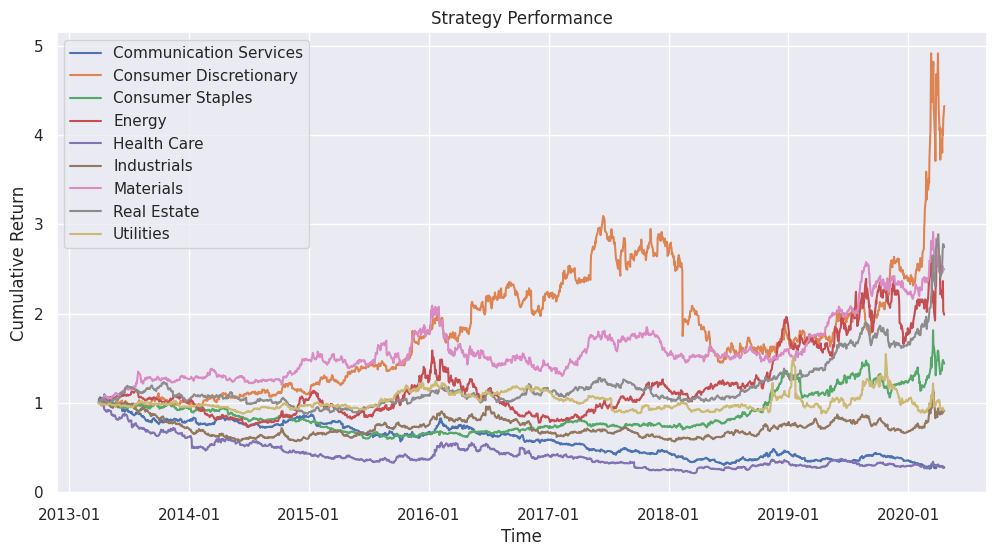

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))
index_results = []

for sector, sector_df in result_df.groupby('Sector'):
  # sector_sorted = sector_df.sort_values('MSE')
  # print(sector_sorted.head())
  # top3 = sector_sorted.head(3)
  # bottom3 = sector_sorted.tail(3)
  # select_ticker = top3 + bottom3
  # print(select_ticker)
  top3 = sector_df.sort_values('MSE').head(3)
  bottom3 = sector_df.sort_values('MSE').tail(3)

  selected = pd.concat([top3, bottom3])
  tickers = selected['Ticker'].tolist()
  long_ticker = top3['Ticker'].tolist()
  short_ticker = bottom3['Ticker'].tolist()

  df_selected = df[df['Ticker'].isin(tickers)]
  # price_data = df[df['Ticker'].isin(select_ticker['Ticker'].tolist())]
  sector_price = df_selected[df_selected['GICS Sector'] == sector]
  returns_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()

  weights = pd.DataFrame(0, index=returns_matrix.index, columns=returns_matrix.columns)
  if returns_matrix.empty or returns_matrix.shape[1] < 6:
    print(f"Skipping sector {sector} due to insufficient data.")
    continue

  for t in long_ticker:
      weights[t] = 1 / len(long_ticker)
  for t in short_ticker:
      weights[t] = -1 / len(short_ticker)
  # returns_matrix = sector_price.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  # returns_matrix = returns_matrix.dropna()



  # weights = pd.DataFrame(0, index=price_data.index, columns=price_data.columns)
  # for t in top3['Ticker'].tolist():
  #     weights[t] = 1 / len(top3)
  # for t in bottom3['Ticker'].tolist():
  #     weights[t] = -1 / len(bottom3)

  daily_pnl = (weights * returns_matrix).sum(axis=1)/100
  cumulative_pnl = (1 + daily_pnl).cumprod()
  cumulative_pnl.index = pd.to_datetime(cumulative_pnl.index)

  total_return = cumulative_pnl.iloc[-1] - 1
  max_drawdown = (cumulative_pnl / cumulative_pnl.cummax() - 1).min()
  sharpe_ratio = daily_pnl.mean() / daily_pnl.std() * (252 ** 0.5)
  win_ratio = (daily_pnl > 0).sum()/len(daily_pnl)
  volatility = daily_pnl.std() * (252 ** 0.5)

  print(f"Sector: {sector}")
  print(f"Total Return: {total_return}")
  print(f"Max Drawdown: {max_drawdown}")
  print(f"Sharpe Ratio: {sharpe_ratio}")
  print(f"Win Ratio: {win_ratio}")
  print(f"Volatility: {volatility}")
  if not daily_pnl.empty:
    metrics = {
        'Sector': sector,
        'Total Return': total_return,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Win Ratio': win_ratio,
        'Volatility': volatility
    }
    index_results.append(metrics)
  else:
    print(f"Skipping sector {sector} due to empty daily_pnl.")


  plt.plot(cumulative_pnl,label=f'{sector}')



# plt.plot(cumulative_pnl,label='long top3, short bottom 3')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Strategy Performance')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/LSTM_strategy_performance.png')

In [ ]:
metrics_df = pd.DataFrame(index_results)

# Reorder columns if needed
metrics_df = metrics_df[[
    'Sector', 'Total Return', 'Sharpe Ratio', 'Volatility', 'Max Drawdown', 'Win Ratio'
]]

# Format numbers as percentages or with 2 decimals
metrics_df['Total Return'] = (metrics_df['Total Return']/100).apply(lambda x: f"{x:.2%}")
metrics_df['Volatility'] = metrics_df['Volatility'].apply(lambda x: f"{x:.2%}")
metrics_df['Max Drawdown'] = metrics_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")
metrics_df['Win Ratio'] = metrics_df['Win Ratio'].apply(lambda x: f"{x:.2%}")
metrics_df['Sharpe Ratio'] = metrics_df['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")

# Show the table
from IPython.display import display
display(metrics_df)

Sector Total Return Sharpe Ratio Volatility Max Drawdown  \
0  Communication Services       -0.72%        -0.64     23.96%      -76.08%   
1  Consumer Discretionary        3.33%         0.82     31.50%      -53.11%   
2        Consumer Staples        0.44%         0.34     22.10%      -42.08%   
3                  Energy        0.99%         0.47     31.11%      -50.96%   
4             Health Care       -0.72%        -0.44     30.48%      -79.01%   
5             Industrials       -0.09%         0.06     22.94%      -45.94%   
6               Materials        1.50%         0.70     22.01%      -37.67%   
7             Real Estate        1.74%         0.85     18.94%      -29.42%   
8               Utilities       -0.08%         0.08     24.96%      -42.57%   

  Win Ratio  
0    48.62%  
1    51.32%  
2    53.01%  
3    51.89%  
4    48.79%  
5    49.07%  
6    51.10%  
7    53.12%  
8    51.27%

#### MLP - fully connected feedforward neural network.

In [ ]:
# 12 min run all
# MLP - fully connected feedforward neural network.
from ast import mod
results = []
sector_result = []
for sector, group in df.groupby('GICS Sector'):
    # if sector != 'Financials' and sector != 'Information Technology':
    #     continue
    tickers = group['Ticker'].unique()


    for ticker in tickers:
        print(f"Processing sector: {sector}, ticker:{ticker}")
        df_ticker = group[group['Ticker'] == ticker].dropna()
        if len(df_ticker) < 50:
            continue

        X = df_ticker[SDG_features]
        y = df_ticker[target]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        sector_result.append((sector, ticker, mae, mse, r2))


Processing sector: Communication Services, ticker:CMCSA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4000
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1072
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8441
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8732
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7623
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9689
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6912
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8253
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1080
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7006
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:DIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2734
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4785
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2536
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3920
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9584
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9104
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7285
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1431
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4030
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0876
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:EA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0755    
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1058
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9313 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1256 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5870
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0480
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4649
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2884
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8465
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4898 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:FWONK
Processing sector: Communication Services, ticker:IPG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8327
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7526
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9483
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9456
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8551
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0695
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3297
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7851
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3751
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5395
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:LYV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4663
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0086
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8887
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3596
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9398
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6845
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6304
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9003
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2055
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4415
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:NFLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8251
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2481
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1642
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6402
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7923
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4253
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9921
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0264
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8868
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8611
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:NWSA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7759
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1912
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8952
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4786
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7648
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6425
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5877
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4048
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3749 
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6573
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:OMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0762
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8057
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7974
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7675
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6331
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6545
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6316
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2957
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4989
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3358
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:SIRI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1095
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5587
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4756
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2586
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4086
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4079
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1144
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0254
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8428
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9364
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Communication Services, ticker:T
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8184 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.4867
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.3565
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8732
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.1529
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5590
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6974
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4271
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6170
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing sector: Communication Services, ticker:TGNA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7885   
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3106 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5297 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7778 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2500 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9464 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3558 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6933  
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5849 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0534 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing sector: Communication Services, ticker:TMUS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5289  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8231 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7924 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2445 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5632 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7957 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3252 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0547 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9442 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4082 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing sector: Communication Services, ticker:TRIP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5511    
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8267 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8789 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1645 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5201  
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2697 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8251  
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9976
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5234 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8216 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Communication Services, ticker:TTWO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3563  
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0617 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1006 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3591 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9789 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1654 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0436 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2625 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9253 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4738 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Processing sector: Communication Services, ticker:VZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4265
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2674
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2533
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1989
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1180
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0346
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0131
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0059
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9257
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0053
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Communication Services, ticker:Z
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8939    
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4431 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7376 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9664 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6190 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4778 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7740 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8149
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8201 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2994 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:ALV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7041   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2377 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2184 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9443 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9843 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8937 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5239 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7760 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7192 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4000 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Consumer Discretionary, ticker:AMZN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7254
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3145
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4923
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2624
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0178
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5553
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4225
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1261
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8152
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3652
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:AN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7639   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7821 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2597 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1549 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6663 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2046 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2936 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2892 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8111 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8957 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:APTV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0902  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1156 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3830 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1841 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4268 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3364 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0955 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8927 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6203 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7908 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing sector: Consumer Discretionary, ticker:ARMK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8235
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0622 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2724 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7197 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5401 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5945
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2768
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0893
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4239
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9057
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:AZO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5000
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5107
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9838
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3596
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9227 
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2208
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8808 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7240
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5730
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7108 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:BBY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3462    
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9007
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7615
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9835
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8190
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8531  
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1580
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4881
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1186
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4255
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:BWA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0675
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3799 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3146
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2321
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1072
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7347 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6010
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5564
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3745
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2962
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:CCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3286
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6603
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2285
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7157
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1078
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9607
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4990
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8411
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4551
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5894
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:CMG


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2483
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1646
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2251
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0970
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7086
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3696
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5641
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4614
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4334
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7928
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:DG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1465
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8102 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1160 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6635 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1012 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3529 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7310 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4214 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1288
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6846 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:DHI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6601
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7990 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6190 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3639 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4360 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7237
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0992 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2679 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1771
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0144
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:DKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.2065  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9353 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4116 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7414 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2966 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0737 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6562 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4122 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0636 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9625 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing sector: Consumer Discretionary, ticker:DLTR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7685
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3164
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9088
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3674 
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7626
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7852
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9490
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9355
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7747
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3857
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:DPZ
Processing sector: Consumer Discretionary, ticker:DRI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4207
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1677
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2584 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1944 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0532 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5600  
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2201
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4127
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1950
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8829
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:EBAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6060
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8292
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3089
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7445
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6344
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1529
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0957
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3909
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2709
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0626
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:EXPE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3441
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0103
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3965
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9952
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7487
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2146
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0344
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8421
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1309
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5539
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:F
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0135
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2433
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7147
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5250
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2517
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4770
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8076
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5085
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5706
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3873
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:FL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0548
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2612 
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5727
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4559
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7741
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6315
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8060
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4060
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5012
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9719
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:FOSL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 85.9649  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 111.0424
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 114.6196
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 167.5623 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117.5316
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.6620 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.0927
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81.6541 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 163.3781 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.2852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing sector: Consumer Discretionary, ticker:GM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8439   
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7576 
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1729 
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1309
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0659
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4299
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7008
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4656
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1416
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0675
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:GME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.8949
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3176
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8961
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9610
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1252
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3376
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9420
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1896
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2395
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8622
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:GPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0462   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8083 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4813 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7328 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2541 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7639 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2044 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8473 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1865 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1550 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:GRMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6981
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7304
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3859
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8087
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4002 
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1872
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3889
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8453
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7435
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3240
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:GT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9648
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3798
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8048
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3013
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3113
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2099
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2708
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7983
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1201
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7660
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:HAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6096
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4871
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2597
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1128
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8691
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7824
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2359
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7669
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2250
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1193
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:HBI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3199   
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3718 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0020 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1949 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0201 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3346 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9479 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4323 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9766 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0479 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:HD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5211   
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8119
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2114
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7878
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1880
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8932
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7732
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4703
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8709
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8039
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:HLT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8266
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5214
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5900 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7519
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2993
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8348
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3798
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3471
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2269
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1604
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:HOG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5303
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2576
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3155
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8891
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1059
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1030
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2875
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0592
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4580
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8062
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:HRB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2509  
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7731 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5593 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7482 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4109  
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0778 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8852 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9380 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0646 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2477 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing sector: Consumer Discretionary, ticker:KMX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3263   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7907
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1282
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7290 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2216 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6640
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7911 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4596 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2944 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3417 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:KSS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3192
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7921
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5287
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4083
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3437
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4152
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6461
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3261
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7182
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2539
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:LEA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0467
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9052
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7436
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9363
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7622
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6129 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0387
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4218
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9924
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1950
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:LEG
Processing sector: Consumer Discretionary, ticker:LEN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7479
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9398
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8964
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9417
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7469
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1231
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9056 
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3116
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0967
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4993 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:LKQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9589  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1072 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7142 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5849 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7650 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6732 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5556 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1595 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1104 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5439 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing sector: Consumer Discretionary, ticker:LOW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2045
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2020
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7953 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7794 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6873 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1416 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4086 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9773
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5049 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7313 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:LULU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8097    
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1755  
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6826 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4991 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2804 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6148  
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3736 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9699 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5714
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1455 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:LVS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9788
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0317
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2616
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5292
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1184
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5466
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3395
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8303
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3465
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5112
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:M
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0445
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3771
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7885
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0574
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7773
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1297
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2177
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1818
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5765
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1167
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:MAR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0345
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6300
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5400
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5393
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4173
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2099
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1848
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1297
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1542
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9683
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:MAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8299
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2069
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7387
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6556
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6673
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0729
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8183
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6497
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2730
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2901
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:MCD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7995
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6927 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5366 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7480  
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8689
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4085 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4193
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5273 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4775 
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3097 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:MELI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.0124  
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5722 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9487  
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1040 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6336  
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8108 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0509 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0637
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4709 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2848 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:MGM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3730  
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2491
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0900 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1798 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0938 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6488  
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8678 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8054 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6240 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9747 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Processing sector: Consumer Discretionary, ticker:MHK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0547   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6027 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1102 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7186
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9879
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9804 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7777 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1971 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4156 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2661  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:MTN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6483   
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6165 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7092 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7130
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6604 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3989 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4434
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6799 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4536 
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5369 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:NCLH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9555
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1493
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8398
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9680 
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8156 
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8556
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7661  
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7061
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7344
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1256
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:NKE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7750
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7501
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4419
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2499
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3861
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1574
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4555
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4348
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3080
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5066
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:NVR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7574  
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9344 
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9116 
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4620 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2197  
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3412 
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4368 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0492 
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7279 
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3526 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing sector: Consumer Discretionary, ticker:NWL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4561   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2376 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8625 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3699 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9343 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1120  
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3754 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3730 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0438 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7549 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Consumer Discretionary, ticker:ORLY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4034   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8124 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3233 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0302 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6877 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8079 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5356 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5921 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2998 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6662 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Consumer Discretionary, ticker:PHM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8475
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1588
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2955 
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3297
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1575 
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1361
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6886
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8112
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8494 
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8596
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:PVH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.2041   
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6413  
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8025 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7178 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1178 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9802 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9924 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3267 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0019 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8043 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing sector: Consumer Discretionary, ticker:RCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6552
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1248
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8499
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6453
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7164
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3691
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9493
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0956
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2094
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3040
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:RL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1485
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2755
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6964
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2424
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3603
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7686 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9641
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2835 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8988
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8212
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:ROST


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8238
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1298
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3362
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0734  
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6933 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1798 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9190
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0639 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4083
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8954 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:SBUX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6141
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8353
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2838
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3431
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5798
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9466
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4259
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3992
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1366
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3822
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:TGT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7358   
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8968 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8477 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6996
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5905 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0490
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1754 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6468
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5252 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9565 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Discretionary, ticker:TJX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3094  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6187 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8501 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7839 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9829 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0935 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0948 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8065 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4979 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3250 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing sector: Consumer Discretionary, ticker:TOL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4859   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2835 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6441 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5735  
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6525 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8519 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6233 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3845 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6937 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2365 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Consumer Discretionary, ticker:TPR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.4069 
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1872 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4060  
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5233 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2825 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1803  
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2774 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7865 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9532 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6992 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Consumer Discretionary, ticker:TSCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6878
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5225
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4299
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8875
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5355
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7728
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5499
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2408
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3033
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5066
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:TSLA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.5889
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7288
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3199
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5051
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3939
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5507
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0384
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0445
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8550
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0428
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:ULTA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7630    
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3735 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9929 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9095  
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2660 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4517 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8156 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3933  
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3934  
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4233  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing sector: Consumer Discretionary, ticker:URBN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1241
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8931
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3389
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7158
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2134
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8514
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1994
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0531
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0914
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6907
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:WHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1197
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0834
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3356
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0272
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9502
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2963
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2372
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3503
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3473
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3860
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Discretionary, ticker:WYNN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9034
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9669
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3469
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9083
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8143
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5689
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2874
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3381 
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7195
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8862
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Discretionary, ticker:YUM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0098
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6983
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0622
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5118
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3025
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7344
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0125
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8682
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8993
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7630
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:ADM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4466
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3552
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5759
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1508
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2299
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3901
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8691
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9179
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8636
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5417
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:BG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2125
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3888
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1183
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8429
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7819
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5944
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9472
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6489
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5772 
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2914
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:CAG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2062   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0170 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8122 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1326 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8553 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0204 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1673 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7240 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8851 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9035 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Consumer Staples, ticker:CHD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7915 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5177
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4462
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4024
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3998
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5311
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6319
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6447
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4405
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing sector: Consumer Staples, ticker:CL
Processing sector: Consumer Staples, ticker:CLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7029
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5148
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4337
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3545
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3040
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3456
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1761
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3732
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3714
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4088
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:COST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5585
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3973
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6604
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1260
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1597
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2185
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4538
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2908
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4191
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2063
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:COTY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.5320  
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5065
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9308 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8624 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3148 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5365  
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1883 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4352 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8422 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4323 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Staples, ticker:CPB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6355
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1562
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1549
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8361
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9304
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5803
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9125
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7527
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4288
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7131
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:EL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4908   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6611 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3586 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0949 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2319 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1319 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9559
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7976 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5609 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7061 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Staples, ticker:EPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6935    
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7996 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0923 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2688 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7125 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8488 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8115 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1047 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2965  
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4825 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing sector: Consumer Staples, ticker:GIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5613  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2582 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1681 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2115 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2928 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0602 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1606 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9923 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9022 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9489 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Processing sector: Consumer Staples, ticker:HRL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5494
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0905
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6243
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6765
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4727
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6341
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9645
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5268
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5018
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4863
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:HSY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4111
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1490
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0780
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6383
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3050
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5045
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3459
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4636
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7672
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7614
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:INGR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8857   
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5263 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9323 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2165 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1869 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6780 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3598 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0257 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6906 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6384 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Consumer Staples, ticker:K
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0888
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8500
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8777
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5649
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4032
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7157
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4689
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5228
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5139
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4256
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:KHC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5438
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7457
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8779
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9290 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5114 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6998 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2168 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9748 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3313 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7354 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Staples, ticker:KMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7922
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5063
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2896
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2535
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4835
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2929
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2499
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0903
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4191
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1363 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:KO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3758
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8913
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9486
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2118
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0565
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9018
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9088
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8371
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9859
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7337
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:KR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1719
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7469
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1215
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6583
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8117
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2397
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4275
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3245
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0738
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2324
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:MDLZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2833
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0569
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1440
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9153
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0633
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8223
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7611
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7313
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3377
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8805
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:MKC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4015   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9349 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9477 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7291 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7164 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8800 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6139 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6514 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3764 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2926 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Staples, ticker:MNST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7899  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1213 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9073 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8693 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4957 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0228 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8113 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8587 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9607 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6141 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing sector: Consumer Staples, ticker:PEP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4913
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2825
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2695
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4885
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5059
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5570
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0038
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1213
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3436
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0720
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:PG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7007  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9947 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9016 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4566 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5605 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1205 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0871 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9672 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6503 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5215 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing sector: Consumer Staples, ticker:SJM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7315   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2093 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1564 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2075 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6274 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9498 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6242 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0197 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5803 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6593 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Consumer Staples, ticker:STZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0982
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0039 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9947 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6923
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6869
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7931
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8201
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5601
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7995
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:SYY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3452   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3035 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6234
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2594 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0987 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9902 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5988 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3458 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5322
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6412
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:TSN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2654
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4427
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8174
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7752
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9669
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7424
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0541
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4797
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6840
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6986
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Consumer Staples, ticker:WBA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3063
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6561
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6206
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4444
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3451
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6920
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3971
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3436
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3641
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1239
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Consumer Staples, ticker:WMT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8275
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2936
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4945
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2775
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2506
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1804
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5253
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2123
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3019
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1387
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:AR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.9646   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3318
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8213 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4271 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2240
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2950 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9378 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2705 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2637
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2932 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Energy, ticker:CLB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6245  
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6821 
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2070 
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2956 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3124 
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5912 
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3839 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0122 
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8416 
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6600 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processing sector: Energy, ticker:COP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7684
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4863
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4457
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0592
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5898
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3495
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5963
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1276
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4488
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5402
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Energy, ticker:CVX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0821
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7948
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6287
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2770
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6838
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2327
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4371
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6762
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7231
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4011
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Energy, ticker:DVN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8361
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2473
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7869
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4714
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9452
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8757
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8136
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5240
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6158
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7404
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:EOG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8387  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8960 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5669 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6067 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6462 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2914 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6248 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0190 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2587 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8632 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Energy, ticker:EQT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5684  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4906 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8476 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1498 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7091 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6808 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0604 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2337 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3203 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8815 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing sector: Energy, ticker:FANG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7815
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4000
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5867
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7020
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6537 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8908 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1471
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2260
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2225
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0984 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Energy, ticker:FTI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1996   
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1900
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6186
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2969
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9696
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5348
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8746
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5349
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6532 
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5654
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Energy, ticker:HAL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3689
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5835
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9512
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8082
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2265
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2398
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7628
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7264
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4919
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6449
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Energy, ticker:HES
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9200
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9612
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1871
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5954
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7686
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7038
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1755
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7256
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2363
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8068
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Energy, ticker:KMI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8627
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0420
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0786
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9674
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9870
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7312
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2067
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4377
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7201
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0913
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Energy, ticker:LNG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.9260
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2286
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9255
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4443
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8197
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1505
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1900
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1137
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1291
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2936
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:MPC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2767   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4809 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2941
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3001
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6982  
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7494  
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8557 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7136 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4578
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9865 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Energy, ticker:MUR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1320
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1781
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5257
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7560
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4491
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7241
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6704
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5843
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6692
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0690
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:NBR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.4295
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.4457
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8772
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5007
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3720
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.8338
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.3172
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8400
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7542
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0477
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Energy, ticker:OII
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.4986  
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4150 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5797
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8017
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8754
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9744 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8698
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0358 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8746
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6803
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Energy, ticker:OKE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.5792   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4081 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1612 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2808 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0726
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4213 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5417 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6994
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0787 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6005
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Energy, ticker:OXY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8799
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9672
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5021
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9393
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7973
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5468
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8154
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9034
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8212
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5676
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:PSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5970   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2800 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9263 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3350 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1597 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5534 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5408 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4115 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3157 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9097 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Energy, ticker:RRC
Processing sector: Energy, ticker:TRGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3958  
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3901
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9890 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2798 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.5430 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8579 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7221 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2295 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2300 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1319 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Energy, ticker:VLO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7825
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8421
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4319
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1903
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0654
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7440
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7140
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6068
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9619
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5230
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Energy, ticker:WMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2838
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6206
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1799
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4801
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4964
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1566
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9488
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3547
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1769
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6623
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Energy, ticker:XOM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9272
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0681
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8621
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7508
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6336
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6847
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5306
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7124
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9172
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5470
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:ACGL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7289
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1797
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8203
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3743
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0650
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7821
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9136
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0123
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8159
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3674
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:AFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8845   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8694 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0524 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6860 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3942 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4176 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9028 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1740 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5398 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6455 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Financials, ticker:AFL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9851
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1810
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8566
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3625
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7674
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4619
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2763
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6015
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4234
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0093
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:AIG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7848
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9306
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9695
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6663
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0489
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7268
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3502
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8426
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3069
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5381
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:AIZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6197   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2286 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1061 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1199 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7876 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6803 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4986 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5881 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5407 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5512 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Financials, ticker:ALL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1596
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7336
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9131
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6448
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3952
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3913
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4199
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2637
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4980
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1056
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:ALLY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3287   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5394 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6536 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8376
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9236
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1635
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4461
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6123
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0370 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0112 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:AMG
Processing sector: Financials, ticker:AMP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2760   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3748
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0716
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6906
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6014
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5531
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6540
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9484
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4943
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5804
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:AON
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2038   
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7375 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5227 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5720 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4006 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4726 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2809 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4789 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2935 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1942 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Financials, ticker:AXP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0548
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7257
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5420
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6972
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1721
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3257
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4093
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3563
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6813
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2563
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:BAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2931
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3336
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7930
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1193
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8747
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5097
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2703
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3617
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3949
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0447
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:BEN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3176
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8598
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7339
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8783
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9148
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9814
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7769
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3012
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6351
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2029
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:BK
Processing sector: Financials, ticker:BLK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9279
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4288
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2742
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2678
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6856
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6842
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1718
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7685
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3454
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4021
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:C
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7050
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0565
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1790
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8020
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5843
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2313
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2900
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0931
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7181
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8724
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:CBOE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7906  
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5555 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5733 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3870 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3763 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4684 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7146 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8534 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1784 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6131 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing sector: Financials, ticker:CFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6270   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7616
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1417 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9857
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1306
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7261
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4626
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8959
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9546
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5249
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:CINF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9010   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7132 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3186 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7407 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2986 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5236 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2516 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5358 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0604 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7801 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Financials, ticker:CMA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7251
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7634 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3517
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1729 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6197
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5502 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3073
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8117
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8072
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8932 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Financials, ticker:CME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6497
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1690
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8556
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2051
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5884
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8831
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1711
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0522
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1187
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7557
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:COF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4842
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9524
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9515
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2951
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9332
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6089
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5986
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8894
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3604
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0249
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Financials, ticker:EWBC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8166  
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4425 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4766 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1748 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3440 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0700 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7817 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9323 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0759 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7148 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Financials, ticker:FITB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5587
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9023
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6221
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1451 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5103
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2920
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0365 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0006
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6593
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6352
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:FNF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7630   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5802 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2488 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8468 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2110 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9590 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0010 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1375 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7710
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6457 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:GNW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1019
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.2422
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5702
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6708
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1685
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4841
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4971
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0393
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6915
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Financials, ticker:GS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6884
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6649
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0370
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2696
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5755
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3735
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6190
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7842
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6731
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4761
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:HBAN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3769   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1544 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8286 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5748 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0336 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2807
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4899 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6471 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1176 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9145 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:ICE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3857
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1379
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9481
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9005
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0886
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8767
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6606
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6826
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9209
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0857
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:IVZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1404
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4052
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3188
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3674
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6836
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2827
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6323
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1698
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6893
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6894
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:JPM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2046
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3366
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1928
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3942
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5876
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2484
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5676
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5497
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7655
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2299
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:KEY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8098
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1439
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2831
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3577
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6297
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6038
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3158
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7207
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5171
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3888
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:L
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7793
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6224
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4560
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5231
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6615
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7246 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3567 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6705 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0337 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0931 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:LNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9594
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3743
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3325
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7866
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0176
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1245
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8043
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8644
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8402
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3447
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:MCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9406
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9157 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0410
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0984
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8032 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6586
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5940 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3393
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2581 
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3606 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:MET
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8881
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6004
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1857
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8348
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3301
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9047
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2289
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8938
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6661
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5886
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:MMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7408
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6437
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6342
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3704
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1437
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2141
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1605
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0750
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0450
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8575
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:MS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0712
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9271
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3684
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0489
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0628
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2980
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2927
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5266
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7053
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1824
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:MTB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2806   
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5858 
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5913
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9839
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1830 
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5709 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7522
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1152
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1635 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7861
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:NAVI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8864   
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3239  
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1711 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2833 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8498 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0919 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0644 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7225 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2198 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4042 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Financials, ticker:NDAQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4941   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1506 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1846 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2958 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8443 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8531 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0496 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9808 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3507 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0386 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:NTRS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7988   
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5401
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9996 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9001
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9931
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9362
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8203
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0761
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7466
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8091
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:PFG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6200
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0144
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1079
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7205
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7483
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3811
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9258
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0160
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2235
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6026
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:PGR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2676   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6435 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9336 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9264 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6227 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7832
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6961 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5337 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6321 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8173 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:PNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6214
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7626
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2448
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4541
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4175
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0629
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2938
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4769
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4820
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3115
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:PRU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1366
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8887
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5751
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8214
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9321
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9221
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8927
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6141
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3400
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9357
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:RF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6564
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6868
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8298 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8278
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8340
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6448
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8194
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6272
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1923
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3584
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:RGA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0151   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1241 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7403 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5450 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6811 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6230 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6814 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4546 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4582 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3537 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:RJF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9523
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5358
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0145
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1610
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6076
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7476
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1989
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8721
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9823
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:RNR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2992   
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7304 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6843
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8643
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7771 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4247
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3652
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0807 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5258 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5032 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Financials, ticker:SCHW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8736
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6629
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5982
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9479
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6280
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5782
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0187
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3539
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4212
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0470
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:SEIC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4968   
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0675 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8124 
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5442 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5481 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4581 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5631 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8585 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5924 
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3501 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Financials, ticker:SPGI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1310 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9657
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6023
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4973 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3756
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1319
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2351
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0570
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8905
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7612 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing sector: Financials, ticker:STT
Processing sector: Financials, ticker:SYF
Processing sector: Financials, ticker:TROW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6767   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8586 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2909  
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1187
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0669
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1462 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2770
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6612 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4311 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9385 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:TRV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4721
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7911
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3712 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1497 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4532
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4216
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1192
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2001 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1091
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2991
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Financials, ticker:UNM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.8447 
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6631 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0999 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3528 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4872 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0660 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0929 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0313 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1359 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8625 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Financials, ticker:USB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4703 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9083
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1001
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5544
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0409
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0045
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9351
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1316
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0805
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing sector: Financials, ticker:VOYA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4831   
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9125 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8612 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8076 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6581 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6487 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9782 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3989 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8928 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2324 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:WFC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5269
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5706
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7891
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2262
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9614
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2587
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5623
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7799
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2222
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8949
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Financials, ticker:WRB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1241   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0571 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9834 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8998 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8899 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8614 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8135 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7863 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8005 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7559 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Financials, ticker:ZION
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4568
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1880
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8442
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9804
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0584
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5846
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7767
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8384
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5242
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2981
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:ALGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.8452 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3711
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.1408
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.0013
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6202
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1371
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.4579
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3424
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7986
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing sector: Health Care, ticker:ALKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3622   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8532 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6944  
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5445  
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0531
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7156 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6162 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8617  
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5735 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4713  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Health Care, ticker:ALNY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.4814  
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5261 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5454
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2524 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8847 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2922
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9384 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1808
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0890
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2619
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:AMGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2319
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9602
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7958
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6761
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5209
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7071
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1855
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6594
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4669
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2528
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:BAX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0136
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1286
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7269
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9070
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6153
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9567
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6278
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9343
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8961
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4785
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:BDX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1994
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0689 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9169 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0081 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5063 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5496
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5133
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7145 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6404 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4975 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Health Care, ticker:BIIB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3966   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1073 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4645
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3186
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9934 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7703 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2472 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2146 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7430 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3048 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:BMRN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5929
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5547 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1210
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2642 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5929 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1698 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8667 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5735 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5173 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8195 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:BMY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9489
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3203
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2820 
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4317
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6277
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3019
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1761
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9127
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9521
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9624
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:BSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4417
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1501
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8280
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9722
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5428
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8605
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8484
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7323
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8914
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2813
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:CAH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2996
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2397
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8764
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0969
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3744
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8217
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9487
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7069
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1776
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3931
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:CNC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2523
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0915
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8513 
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0975
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3411 
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0332
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7435 
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0220 
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9872 
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9291 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:COO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6234   
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4849 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9881 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4020 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1638 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0005 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9721 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7416 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6891 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6241 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Health Care, ticker:CVS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1042   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4736 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3075 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6520 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1419 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1982 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8250 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4838 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7328 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5744 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Health Care, ticker:DGX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2206
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8407
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3276
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8108 
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9172
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1560
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5869
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5988
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4197
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4179
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:DHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4357
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8837
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7294
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7909
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6392
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1096
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3661
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8255
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6838
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5613
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:DVA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8394   
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6654 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3921 
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8575 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3030 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3693 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0673 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6919 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0409 
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0705 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Health Care, ticker:DXCM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.0762  
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7141
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.1613
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5323 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0734
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7739
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7682
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8390
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7780 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3303
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Health Care, ticker:EW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1581
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1757 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0961 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0283
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2692
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3742
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8041 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5512 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2293  
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6257 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:GILD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3590
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9151
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1064
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1152
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0040
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8338
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8292
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8121
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6438
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6894
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:HCA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5179  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2621 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0230  
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5632 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2866 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2073 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8469 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4397 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3186 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9939 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing sector: Health Care, ticker:HOLX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9016   
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7057 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7791
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0399 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3410 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2200 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5629
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9595
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1002
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0727
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:HSIC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4985
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3478 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4840 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0460
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7505 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8397 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9076 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8669 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8518 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5751 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:HUM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1932   
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9043
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7450 
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8184
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0377
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5752
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5372
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5922
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0615
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1235
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:IDXX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5948  
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1859 
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2805 
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6651 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5731 
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9519 
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9731 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0436 
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6623 
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8088 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Processing sector: Health Care, ticker:ILMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8461    
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0102 
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6037
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8987
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7081 
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6156
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0984 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2518 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8042 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1576  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:INCY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1350   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9454  
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9521 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4458 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7745 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5311 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1402 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9314 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8633
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5568 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:IQV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5946  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1060  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9265  
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7896 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6452 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3365 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9790 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4276 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1472 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0969 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing sector: Health Care, ticker:ISRG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9673   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2798 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4718 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9779 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3399 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2066 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4753 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3160 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2905  
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2100 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:JAZZ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6516
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0638
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5097
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7454
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7738
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9299
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4616 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4779 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7640 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0332
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:JNJ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9503
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2303
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5258 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4923 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3392 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1981
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9296
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3013
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0970
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1532 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:MCK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5261
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1798
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6117
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0054
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7355
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9427
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8935
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8560
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7202
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5617
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:MD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4324   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1028 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9076 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3663 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6797 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2781 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8220 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9022 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5434 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7323 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Health Care, ticker:MDT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2709
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0468
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0542
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9232
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8111
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5656
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8244
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4732
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0354
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6520
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:MRK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9151
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6300
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6229 
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5832
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3930
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4039 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5797 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3564 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1044
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2539
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:MTD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3410   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3832 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8511 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8413 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6662 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7041 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5311 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6415 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7327 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6397 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing sector: Health Care, ticker:PFE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9783
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4062
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5447
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3441
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4205
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4712
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3891
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2204
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3316
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4131
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:PRGO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1896
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1475 
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6398
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8079
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0784
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5314
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1537
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1583
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9629
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1726
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:REGN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1468
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5836
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0178
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7778
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7726
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0603
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2544
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8078
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1353
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6910
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:RMD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2213   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6450 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5284 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7313 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8603 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3259 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4704 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8059 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4931 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2026 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:SYK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6091
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8982
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0405
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1251
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2765
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9604
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8839
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5712
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7950
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8455
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:TFX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2252  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5804 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1457 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4636 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2305 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7009 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5413 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2547 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3390 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0579 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Processing sector: Health Care, ticker:TMO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2672
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1998
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1890
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8369
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8414
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9383
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8842
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6469
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9476
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4846
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:UNH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0952
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5523
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4024
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4971
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4033
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4172
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6342
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3009
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8854
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9551
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:UTHR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2890   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6642 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1833 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0052 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9284 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1556 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8128 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1735 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4908 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3382 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Health Care, ticker:VEEV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8099   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1969  
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9652 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6301 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1328 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2108 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2441 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5087 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5037  
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0237 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Health Care, ticker:VRTX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.3720
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9043
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6047
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0184
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2774
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1064
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4308
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4595
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7165
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2049
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Health Care, ticker:WAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9329
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9182
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4642
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2284
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3534
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9875
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1440
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9963
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8096
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6538
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Health Care, ticker:XRAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2613  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5182 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2218 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7615 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4460 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3809 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2767 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0783 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6053 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7854 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Health Care, ticker:ZBH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3555   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7156  
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6448 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9095 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6199 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8819 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8271 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1708
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9785 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3358 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Health Care, ticker:ZTS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5566   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9998 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3046 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1013 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8649 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0460
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0308 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0123 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0474 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6959
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:AGCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8265
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2462
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9531
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7682
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4989 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0182
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8035
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7049
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2912
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7425
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:ALLE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6325 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6660
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6101
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6342 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2305
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2334
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4971
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2323 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1719
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing sector: Industrials, ticker:AME
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7575
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6382
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0893
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3078
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0309 
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6993
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6588
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6823
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5216
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9642 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:AOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4965  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1946 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7330 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8602 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0761 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7370 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8062 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7942 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7832 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8769 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Industrials, ticker:AYI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8580   
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5351 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9761 
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2584 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6200 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5948 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5876 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3153 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4312  
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1565  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Industrials, ticker:CAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3487
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0986
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8075
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9197
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1234
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6773
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7036
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3681
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3273
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5007
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:CHRW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4958   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0120 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8655 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7312 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6409 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7030 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7617 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8549 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4327 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3837 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Industrials, ticker:CMI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6883
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8324
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6680
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4684
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3770
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0655
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2223
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3600
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1964
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4365
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:CSGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0425
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8618
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3782
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5697
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6166
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4633
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1447
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3267
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1470
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8781
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:CSX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9879   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5368 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5556 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2999
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3627
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0099
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1591
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1415
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1064 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1697
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:CTAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6819   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2593
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4489 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3290 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8472 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1139 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8618 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9152 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1864 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3171 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Industrials, ticker:DAL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3851
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1994
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7359
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2925
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3861
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1751
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8040
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9815
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8746
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6587
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:DE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6902
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4230
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0938
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4977
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9648
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3537
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2967
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3837 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7330
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8876
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:DOV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8877   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8035 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8681 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4606 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1965 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1226 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3731 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0005 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9308 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4607 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:EFX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2229
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5442
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1799
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6068
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0325
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7380
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2633
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3928
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6055
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0865
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:EMR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7175
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9009
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0567
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4492
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6284
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4951
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6814
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0046
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3113
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0597
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:ETN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5205
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0983
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6638
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8685
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3000
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3458
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7337
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3482
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3026
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:FAST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.6551
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7381
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7070
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0197
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6691
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5224
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4203
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5192
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5201
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1904
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Industrials, ticker:FDX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4595
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7732
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2920
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7938
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7777
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6187
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4994
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0985
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5803
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1281
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:FLR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8252
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3735
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3218
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7844
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7660
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1099
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7234
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1217
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.0033
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4431
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:FLS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1104   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3921 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4591 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2369 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2171 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6315 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7857 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8502 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6518 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4163 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Industrials, ticker:FTV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7682   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0287 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0113 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9343 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7752 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7690 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7679 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5644 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6316 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8983 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Industrials, ticker:HON
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8809   
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1965
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9652 
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9922
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6702
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5558
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7063
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5072
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4540
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4847
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:IEX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8665  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4905 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6693 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2332 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2816 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1043 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1213 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1138 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1000 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0908 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing sector: Industrials, ticker:ITW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7567
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6022
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5507
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4938
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5052
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3679
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5280
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2628
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1376
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3253
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:JCI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0582
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5696
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4832
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9484
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0805
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7470
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8826
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8248
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5630
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8871
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:LII
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9946   
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3210 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7670 
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3735 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1412 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1062 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2264 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8258 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8775 
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1295 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Industrials, ticker:LUV
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4025
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4989
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6478
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2032
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7966
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6815
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3331
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3936
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9170
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2071
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:MAN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8094   
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2992 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4901 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8361 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0463 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1027 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3651 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5712 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6966 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8139 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Industrials, ticker:MAS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9575   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7387 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8790
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3360 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4552 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3062 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1510 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5494 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0034 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0521 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Industrials, ticker:MIDD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2367   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5487 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8120 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8684 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8088 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2426 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3412 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7688 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5261 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3108 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Industrials, ticker:NSC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1154
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9515
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6931
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8754
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7591
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1091
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6568
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7063
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5229
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2770
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:OC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9191   
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1350 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3845 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8883 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2435 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2910 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9105 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0468
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8757 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4706 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:ODFL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3840   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8439 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7323 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4748 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2252 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3748 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3672 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5180 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2444 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1460 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Industrials, ticker:PCAR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1005   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3401
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1946 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5726
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4156
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2866
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2191 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9081
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0523
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1478 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:PH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8889
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4016
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2819
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0460
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1129
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2307 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8977
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5781
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1917 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3124
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:PNR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1782  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3163 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5811 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4632 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4871 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0578 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2141 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2028 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7849 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8919 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing sector: Industrials, ticker:PWR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0626   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0851 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4182 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2084 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1440 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7763 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3775 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8548 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9684 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1746 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Industrials, ticker:ROK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1855
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4605
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4948
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5705
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2586
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7658
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3156
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3700
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8263
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6547
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:ROL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6562   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1514 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8274 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8816 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6735 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4620 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1309 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6956 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7690 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8376 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Industrials, ticker:ROP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2045   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1159 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0111 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6477 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2618 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9196 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9445 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7286 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5129 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7473 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Industrials, ticker:RSG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2508
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5523
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1809
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2250
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0923
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1216
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0653
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0671
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0709
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8861
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Industrials, ticker:SNA
Processing sector: Industrials, ticker:SWK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2663   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5174 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1750 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8918 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4755 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0515 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9348 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8012 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9279 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6483 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:TRU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7135   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4465 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1435 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1785 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5095
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7431
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7753 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2799 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4427
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2265 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:UNP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5687
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6116
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7236
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3099
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1410
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3361
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0914
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2406
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4236
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1609
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:UPS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0146
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2960
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6990
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7444
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6977
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0337
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3924
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7243
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5029
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3880
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Industrials, ticker:URI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4766   
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6218  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3373 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9685 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1452 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1225 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6243 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2054 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9438 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6264 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Industrials, ticker:VRSK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1281
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8302
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7125
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5605
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5972
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6654
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2379
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4329
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2730
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3823
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Industrials, ticker:WAB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4466   
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0800 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8160 
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5528
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3835
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9455
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2144
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0896 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2999
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0869
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:WCN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2389   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8812 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8261 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9126 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3679 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4534 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3155 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4302 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2135 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3223 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:WM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4695   
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1556
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8429 
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1523
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0478
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9602
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8094
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7905 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7880
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Industrials, ticker:XYL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2457   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4289 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3521 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0714 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1136 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3887 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0902 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0024 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7421 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9714 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Information Technology, ticker:ACN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2250
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3553 
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2444
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4603
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0407
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2980 
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1213 
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7898
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5044
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0153
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:ADBE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0735  
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2338 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7103 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7395 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6270 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5911 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3663 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4158 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0882 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0178 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Processing sector: Information Technology, ticker:ADI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9951   
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0040 
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2664
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4534
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5046
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7831 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3348
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9345
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9791
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1162
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:ADP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0186   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2816 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9588 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8847 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6296 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6093 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5573 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4559 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4176 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4617 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:ADSK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4699
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5089
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6423
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1986
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6675
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4636
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8931
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0273
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5838
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6979
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:AKAM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9074
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9573
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2560
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7716
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0038
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8747
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9607
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4004
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4191
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1359
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:AMAT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9554   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9276  
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9798 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6818 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7115
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5853
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5075 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4191 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6038  
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7321 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:AMD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.7510  
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9919 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8382
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8592 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.6734 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8496  
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3847
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.2773 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2798 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.0373 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:ANET
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5268    
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4808 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9328 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6637 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5075  
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6964  
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4552 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3571 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2226 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9076 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:ANSS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6863   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9090
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3885 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1142 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4944 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6115 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5119
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4077
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0477 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1784
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:APH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2396   
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5838 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3768 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3802 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3410 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2949 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2711 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1911 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1512 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1934 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Information Technology, ticker:ARW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1642   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9542 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8650 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7830
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6940 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5790
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1378
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7580 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2565
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4507
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:AVT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0229   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5786 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3826 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4150 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2570 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3218 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3527 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9004 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2662 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2566 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Information Technology, ticker:BR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4765
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1411
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7625
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1774
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6623
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0703
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8493
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7443
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8193
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4040
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Information Technology, ticker:CDNS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5834
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1141
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4231
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9911
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5986 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0177
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5659
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7803
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3947 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4059 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:CDW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5622 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7660 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1364
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1898 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9741
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7815 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6905 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9320
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4557
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing sector: Information Technology, ticker:CGNX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6084   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0104 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9266 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5123 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7190 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3899 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1817 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7887  
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3013 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5665 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:COMM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.0668  
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5893
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7267
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7799 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2568 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5325 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7194 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2365 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1152 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8743  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Information Technology, ticker:CSCO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5380
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4306
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6111
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3869
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3137
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1091
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3501
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2717
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5550
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1893
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:CTSH
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9862   
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9801 
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1442
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9920
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2186
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3962
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2387
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5483
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0865
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3177
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:DXC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2624
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8643
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3499
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1371
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7122
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1524
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7008
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5351
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6586
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5955
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:FIS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7880   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7154 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4244 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7569 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8192 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0677 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4908 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2034 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1559 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6962 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing sector: Information Technology, ticker:FLEX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3715   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8945 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1780 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2454 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0402 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8525 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9289 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5613 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3972 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8698 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Information Technology, ticker:FTNT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5584   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6155 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1713 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5857 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1938 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6214 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9530 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8684 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6803 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Information Technology, ticker:GLW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0987
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9841
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8195
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7974 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3380
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8287 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9259
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6640
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7563
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1197 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:GPN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3909
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3599
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8458
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5689
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4420
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9210
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7140
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8181
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4577
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6191
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:HPE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8996   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6811 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7552 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8071 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6219 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9772 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4085 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1220
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6368 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2630 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:HPQ
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2416
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3151
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7044
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7342
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5130
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5273 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8975
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3522 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6957
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2271
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:IBM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8029
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3666
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6967
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6638
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8893
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1415
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7805
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9374
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7674
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6994
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:INTC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5146
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3358
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7945
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8104
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3007
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2876
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2945
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7939
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2040
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6221
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:INTU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0858   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6162 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4174 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2580 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5315
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3900
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2750 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1361 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2316 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8805 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Information Technology, ticker:IPGP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4236  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1103 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3478 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1389 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5488 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8973 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1172 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1492 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4804 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0546 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing sector: Information Technology, ticker:IT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4540
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5243
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0807
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0308
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2721
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2768
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1877
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5495
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6722
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9902
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:JKHY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.1533 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9582
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8555
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7869
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7824
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7259
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7042
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6585
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6385
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing sector: Information Technology, ticker:LDOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3221   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9352 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6987 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9081 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8724 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5684 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6862 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7847 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5270 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3048 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:LRCX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8549   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6856 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9132
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0238
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1311 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7913 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5528
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3392 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0120 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4831
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:MA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4849
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9867
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5820
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6711
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7562
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4602
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7727
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9718
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0064
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0745
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:MCHP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4300   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9460 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2258 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6013
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7910 
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1714
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0046 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5012
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7865
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4827 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:MSFT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3879
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1731
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6199
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6460
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2770
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0858
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2524
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4362
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2606
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3344
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:MSI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3343
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9567
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2790
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8986
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9236
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8140
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8521
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6006
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2276
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4843
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:MU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8452
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4264
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0017
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2497
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7030
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9475
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5516
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4588
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4313
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7398
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:NOW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8774
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3864
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8306
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4636
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2686
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0743
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0748
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6869
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3680
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9828
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:NTAP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9587   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9175 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3940 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9477  
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9562
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9755 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6973 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9747 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3192 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2159 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:NVDA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8411
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3445
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6765
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2326
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8279
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6553
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5648
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8352
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5432
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:ORCL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6544
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1244
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0554
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0844
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0356
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0914
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7954
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2976
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7796
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6513
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:PANW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1627
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2323
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7155
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7887
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7536
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4134
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6592
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3591
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0407
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2598
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:PAYX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9695   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5334
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5194
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9505
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4318
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5713 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7700
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5612 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2598 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1380 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:PYPL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2073    
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2590 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4827 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4554 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7502 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0095 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9817
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3997 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3699 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4325
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:QCOM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3530
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1450
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7816
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8352
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6914
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0961
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5538
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7671
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0313
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9742
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Information Technology, ticker:QRVO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5208    
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5792  
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5341 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0365 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7998 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4230 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5780 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8770 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4638 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5961  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Information Technology, ticker:SABR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0785    
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5456  
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4882 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2435 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9321
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5120
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0350
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0497 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0840
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0394 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:SNPS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6627
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2954 
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3919 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9217 
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9475
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9807 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8821 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7671
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6204
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8535
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:SSNC
Processing sector: Information Technology, ticker:STX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4115
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9293
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7226
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4866
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3926
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8401
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5880 
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5482 
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2977
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1323
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:SWKS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0118
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6790
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3895
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9777
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9037
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1360
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8493
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9327
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7182 
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6467
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Information Technology, ticker:TDC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6384   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1258 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8802 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8645 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3122 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7615 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9263 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3436 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6190 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9689 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Information Technology, ticker:TRMB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9607   
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2321 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1902 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6578 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6101 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9571 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9660 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4701 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5957 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9586 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Information Technology, ticker:TXN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1746
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7630
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9451
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1692
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3696
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3360
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9549
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9326
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1383
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1136
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:V
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7728
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7087
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3831
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8096
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3049
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1085
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1056
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1657
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0446
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8376
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:VRSN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9533
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1587 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3504 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9948
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5489
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0716 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3548 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5940 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1862 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7979 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:WDAY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3183
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8488 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8843 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4000 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3154
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0182  
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8302 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1486 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7775 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8807 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Information Technology, ticker:WDC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6538
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4646
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3346  
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8178
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0715
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0986 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7054
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4094 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4932 
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9978
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Information Technology, ticker:WU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7919
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4085
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4884
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0853 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7202
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9990 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7495 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8055
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7494
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8107
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:ALB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0042
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1590 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2515
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5834
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9078 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2371
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9932
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0919
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1695
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2351
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:APD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1899 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1897
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9824
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9971
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0840
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8904
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7392
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6388 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9352 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.6174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing sector: Materials, ticker:AVY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4002   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2559 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9943 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8882 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8007 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0859 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0370 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6964 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6335 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8021 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Materials, ticker:AXTA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9324   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4939 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4935 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8364 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7874 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5813 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8442 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0563 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9643 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2374 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Materials, ticker:CCK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6421   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1381 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0464 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5759 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0298 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9140 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9131 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9831 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9205 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0347 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:CE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1187
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9320
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0610
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5219
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7404 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9900 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3762 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7750
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1154
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7539 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:CF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8480
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6722
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7388
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8708
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2007
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9651
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5635
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5844 
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6973
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5210 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:ECL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6596   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1709
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4998 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6474 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6573 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6400 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6471
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2350 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4460 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3308 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Materials, ticker:EMN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9369
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3901
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5971
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7473
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0442
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3789
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3358
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4590 
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3131
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4030
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:FCX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3258
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8383
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7141
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.0689
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9262
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2278
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9569
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1937
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.6206
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8286 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:FMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6878  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0067 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9150 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9186 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0740 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5876 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8147 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4257 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0288 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7858 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing sector: Materials, ticker:IFF
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9853  
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4766 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0504 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7840 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3906 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7869 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9680 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4828 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3903 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8736 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processing sector: Materials, ticker:IP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2971
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9878
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1101
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8154
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7198
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1824
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2499
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5776
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9571
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4566
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:LYB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9548
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3707
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9379
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0528  
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5268 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7884 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6079 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6827
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7545
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8260
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:MLM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0118
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7462
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5022
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5928
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8200
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4424
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8434
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0240
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9064
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6705
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:MOS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5498
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6088
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7597
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6917
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1496
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2047
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1196
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2249
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5336
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5368
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Materials, ticker:NUE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2491
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4238
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2274
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2761
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5649
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2116
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5276
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8380
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3681
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1475
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:PKG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9611   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0153 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5782 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9069
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0801
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6171 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4654
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8978 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0225 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8070 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Materials, ticker:PPG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2159
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8571
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3283
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1031
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8989
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6295
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8100
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8739
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8547
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6091
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:SEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8266   
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9726 
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3018 
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1577 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2349 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3666 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2139 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1802 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4753 
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2639 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Materials, ticker:SHW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4802
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3498
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9777
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7984
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9657
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5982
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9553
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2336
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7663
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4938
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Materials, ticker:STLD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7673
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9762
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0707
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0380
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1590
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1497
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2283
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8503
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6305
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3741
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Materials, ticker:VMC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9005
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0708 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9388 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8827 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8273 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9802
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3966
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2303
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7175
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5671
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:AMT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9455
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6018
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5363 
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3589 
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3971
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3754 
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4461
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4173 
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4021
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2082
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Real Estate, ticker:AVB
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9059   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5093 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3244 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4633 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4391 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2845 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1452 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3567 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3642 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7373 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:BRX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5415   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9500 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7433 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2527 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1531 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0786 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7366 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9296  
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8671 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7600  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Real Estate, ticker:CBRE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8118  
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1216 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1442 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0601 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2016 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9572 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9916 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8028 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9780 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8946 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing sector: Real Estate, ticker:CCI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4453   
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8617 
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0108 
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6551 
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7505 
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6398 
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5201 
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7892 
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3092
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4332
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:CPT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1473   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8753 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8248 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5745 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8628 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1006 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0306 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4316 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2345 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6384 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:DLR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7394
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8517
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6779
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5619
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0191
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6050
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3378
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4237
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0892
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2602
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Real Estate, ticker:EQIX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8430   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7085 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3612 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2497 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3102 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5936 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3941 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1213 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3023 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0347 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Real Estate, ticker:EQR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5771   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4509 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7563 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5876 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5746 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5981 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4838 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4139 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3374 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3319 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:ESS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6625   
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0238 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8847 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8411 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6203 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8213 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7332
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5372 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6317 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3810 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Real Estate, ticker:EXR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2417
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7511
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7300
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7914 
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1166 
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9930
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5878 
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7150 
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5102
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4166
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:FRT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9267 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6981
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3556
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4593
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1109
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0585
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9870
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9070
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9421
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing sector: Real Estate, ticker:HST
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8058   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0903 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5486 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9066 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3293 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0371 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6747 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8627
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5834 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1955 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:IRM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6469   
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7480
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0410
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0626
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1514
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1580
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0030 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7845
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2182
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6975
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Real Estate, ticker:JLL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9364
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0819
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5879
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6993
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1542 
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6165
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8780
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3476
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8350
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2092
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Real Estate, ticker:KIM
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4104   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2014 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3241 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1159
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0765
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0384 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0023 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9168 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8186 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1431 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:MAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5011   
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2186 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6040 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9135 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5931 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0930 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6993  
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7621 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3432 
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4840  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:O
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0290
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8720
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0593
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3040
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3696
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9111
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5722
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2388
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8355
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4309 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Real Estate, ticker:PLD
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2151
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6778
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5861
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0235
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7333
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9213
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1705
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5455
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2854
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8483
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Real Estate, ticker:REG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6902   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6625 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4126 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4539 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2780 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4764 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1412 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0171 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2705 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5957 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:RYN
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4098   
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8228 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0163 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6447 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8378 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4628 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2844 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5561 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8208 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9720 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Processing sector: Real Estate, ticker:SBAC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0328  
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3540 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4347 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7477 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3160 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2592 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9449 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7925 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9078 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9563 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Real Estate, ticker:SLG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2838   
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7381 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3792 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8652 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2057 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7995 
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5634 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9410
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2415 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8468 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:UDR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8644   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0383 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0045 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9983 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3145 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8923 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9235 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8830 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1113 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2019 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Processing sector: Real Estate, ticker:VTR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8423   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4411 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0883 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6050 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0300 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3601  
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7508 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6333  
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6101 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7070 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Real Estate, ticker:WELL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4210   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5761 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9574 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6096 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4044 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9063 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2392 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5452 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6843 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9479 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Real Estate, ticker:WY
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2496
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9406
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6074
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2227
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1657
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9703 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0028
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4586
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2039
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4223
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Utilities, ticker:AEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5679   
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7434 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7607 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8150
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6039
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3967 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4500
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5595 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3309 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3918 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Processing sector: Utilities, ticker:AEP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8387
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5133
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3008
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2270
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0972
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1836
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2235
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0932
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0554
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9618
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:AES
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2001  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6953 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3988 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2781 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4643 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9294 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8902 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3351 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8812 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5219 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing sector: Utilities, ticker:ATO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1688
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1185
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7366
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6728
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7028 
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3091
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5370
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6684
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4724
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8662
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:AWK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3440
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4089
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2455 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1780 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2461 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0289 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9210 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9475 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0026
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8470
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Utilities, ticker:CMS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8746  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1474 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0261 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9210 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8078 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7738 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8604 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8671 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8086 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7894 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing sector: Utilities, ticker:CNP
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0387
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7639
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9663
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6703
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6269
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5693
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8464
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7295
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3229
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3087
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:D
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0256   
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9727
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4222 
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7026
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0872
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7507 
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6024 
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9151 
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9075
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8772 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:DTE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2905  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0724 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1024 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9529 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1021 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8631 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7032 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7937 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7233 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6547 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing sector: Utilities, ticker:DUK
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8675
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3748
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3306
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4106
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1976
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3059
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4922
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2740
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1837
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1885
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Utilities, ticker:ED
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4682   
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4233 
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2747 
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4395 
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5029 
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0765 
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885 
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1248 
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0605 
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0062 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Processing sector: Utilities, ticker:EIX
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4390
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6384
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0862
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5629
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8753
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6261
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2838
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4325
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3251
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3490
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Utilities, ticker:ETR
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4444
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9226
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2238
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1233
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8851
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6315
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6595
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7955
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9063
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4874
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:EXC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8695
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4969
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8896
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2339
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1040
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4799
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0896
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0140
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7845
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8002
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Utilities, ticker:FE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5936
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6335
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0772
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6903
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0780
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9039
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3393
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3219
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8706
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2271
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Processing sector: Utilities, ticker:LNT
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0578
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7902
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6397
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6164
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6491
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3185
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3532
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2116
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1870
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2981
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:MDU
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8114   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4887 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0630 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0989 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9859 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7225 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0235 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9060 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7464 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0683 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Utilities, ticker:NEE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9066
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6882
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7532
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2562
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6585
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8040
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6164
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6246
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6037
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1516
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Utilities, ticker:NRG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6613  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5694 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4173 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5396 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8567 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3083 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5813 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7556 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3056 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8604 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing sector: Utilities, ticker:OGE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7653  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4331 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1695 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0918 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9409 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9076 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9107 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8779 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8838 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8423 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing sector: Utilities, ticker:PCG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6007 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5531 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6866 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1846 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4436 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.0165 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.3084 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.2006
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4757
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing sector: Utilities, ticker:PEG
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7736
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8205
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4253
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6781
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4646
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4530
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3473
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4649
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2763
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3315
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Processing sector: Utilities, ticker:PNW
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8927   
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9085 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3195 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2616 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2639 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4074 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6777 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0999 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3029 
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2905 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:PPL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6094  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5705 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3755 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2692 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3517 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5870 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6177 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7098 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1320 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1807 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing sector: Utilities, ticker:SO
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6832
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1928
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7475
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1359
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2588
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3553
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1817
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0646
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0654
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1082
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Processing sector: Utilities, ticker:SRE
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8371
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2488
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1621
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7962
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2812
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4726
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0075
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0053
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4016
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3671
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Processing sector: Utilities, ticker:UGI
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8515   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1124 
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6337 
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5381 
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7429 
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6666 
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7816 
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4453 
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5874 
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3207 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing sector: Utilities, ticker:WEC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4461  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1574 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9401 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9286 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9222 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7159 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7024 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8064 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7879 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6546 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing sector: Utilities, ticker:XEL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5041
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3089
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4271
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2069
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2495
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1542
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2186
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0687
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9874
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1392
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
len(sector_result)

442

In [ ]:
# df['GICS Sector'].unique()

array(['Financials', 'Information Technology', 'Consumer Staples',
       'Utilities', 'Industrials', 'Materials', 'Health Care',
       'Consumer Discretionary', 'Real Estate', 'Energy',
       'Communication Services'], dtype=object)

In [ ]:
df_result = pd.DataFrame(sector_result, columns=['Sector','Ticker', 'MAE', 'MSE', 'R2'])

In [ ]:
df_result

Sector Ticker       MAE       MSE        R2
0    Communication Services  CMCSA  1.071042  2.200908 -0.071084
1    Communication Services    DIS  0.964976  1.866658 -0.078522
2    Communication Services     EA  1.526261  4.805164 -0.052950
3    Communication Services    IPG  1.285623  4.315836 -0.011154
4    Communication Services    LYV  1.481349  6.420457 -0.083959
..                      ...    ...       ...       ...       ...
437               Utilities     SO  0.987458  3.458339 -0.085004
438               Utilities    SRE  0.931190  1.889942 -0.146115
439               Utilities    UGI  1.015394  2.544995 -0.074161
440               Utilities    WEC  0.867738  1.234504 -0.095280
441               Utilities    XEL  0.984018  2.880831 -0.031824

[442 rows x 5 columns]

In [ ]:
df_result.dropna(inplace=True)

In [ ]:
#some companies have no data.
df_result.groupby('Sector').head()

Sector Ticker       MAE        MSE        R2
0    Communication Services  CMCSA  1.071042   2.200908 -0.071084
1    Communication Services    DIS  0.964976   1.866658 -0.078522
2    Communication Services     EA  1.526261   4.805164 -0.052950
3    Communication Services    IPG  1.285623   4.315836 -0.011154
4    Communication Services    LYV  1.481349   6.420457 -0.083959
16   Consumer Discretionary    ALV  1.484457   5.453299 -0.071279
17   Consumer Discretionary   AMZN  1.318950   4.113338 -0.066984
18   Consumer Discretionary     AN  1.693894   8.351645 -0.181816
19   Consumer Discretionary   APTV  1.855752   8.578083 -0.061210
20   Consumer Discretionary   ARMK  1.175096   3.771175 -0.116642
85         Consumer Staples    ADM  1.098654   2.415253 -0.130353
86         Consumer Staples     BG  1.148452   2.711584 -0.098455
87         Consumer Staples    CAG  1.160557   3.076362 -0.114866
88         Consumer Staples    CHD  0.863533   1.399387 -0.444255
89         Consumer Staples    CLX  0.927030   1.744861 -0.009530
115                  Energy     AR  2.348225  10.743717 -0.072867
116                  Energy    CLB  2.038557   7.682408 -0.059656
117                  Energy    COP  1.442950   4.942748 -0.050570
118                  Energy    CVX  1.086868   3.516929 -0.024948
119                  Energy    DVN  1.982503   9.334765 -0.055989
139              Financials   ACGL  0.866387   1.608576 -0.116234
140              Financials    AFG  0.944697   4.665849 -0.293768
141              Financials    AFL  0.953417   2.577828 -0.128582
142              Financials    AIG  1.253531   4.492022 -0.096448
143              Financials    AIZ  0.994182   2.399570 -0.046690
198             Health Care   ALGN  1.113130   1.986212 -0.123828
199             Health Care   ALKS  2.289764  11.926922 -0.049210
200             Health Care   ALNY  2.929438  23.605146 -0.033876
201             Health Care   AMGN  1.161341   2.488005 -0.140756
202             Health Care    BAX  0.902071   1.630313 -0.114587
249             Industrials   AGCO  1.281195   3.490227 -0.044387
250             Industrials   ALLE  1.214585   2.798446  0.040118
251             Industrials    AME  1.140254   3.594220 -0.193886
252             Industrials    AOS  0.939385   1.542694 -0.099139
253             Industrials    AYI  1.451774   4.529810 -0.156618
301  Information Technology    ACN  1.070956   2.425886 -0.137512
302  Information Technology   ADBE  2.072096  12.582496 -0.045459
303  Information Technology    ADI  1.361926   3.580016 -0.164811
304  Information Technology    ADP  1.028922   1.959400 -0.105961
305  Information Technology   ADSK  1.541770   5.175256 -0.082582
363               Materials    ALB  1.517201   4.758563 -0.069112
364               Materials    APD  1.212883   2.248853 -0.707365
365               Materials    AVY  1.111783   4.386779 -0.065456
366               Materials   AXTA  1.331588   4.979008 -0.159594
367               Materials    CCK  1.246811   4.215011 -0.093664
386             Real Estate    AMT  1.186573   3.882132 -0.080462
387             Real Estate    AVB  1.033953   2.682099 -0.153609
388             Real Estate    BRX  1.189709   2.552932 -0.063012
389             Real Estate   CBRE  1.466424   4.077796 -0.134144
390             Real Estate    CCI  1.082798   2.937472 -0.139799
413               Utilities    AEE  1.000490   2.368568 -0.067659
414               Utilities    AEP  0.961525   2.402347 -0.468913
415               Utilities    AES  1.501394   4.665911 -0.088585
416               Utilities    ATO  0.889988   1.654654 -0.140623
417               Utilities    AWK  0.971289   2.809329 -0.037891

In [ ]:
for sector, sector_df in df_result.groupby('Sector'):
  print(sector)
  print(sector_df.sort_values('MSE').head(3))
  print(sector_df.sort_values('MSE').tail(3))

Communication Services
                    Sector Ticker       MAE       MSE        R2
14  Communication Services     VZ  0.895345  1.583609 -0.124820
9   Communication Services      T  0.938158  1.591208 -0.176811
1   Communication Services    DIS  0.964976  1.866658 -0.078522
                    Sector Ticker       MAE        MSE        R2
5   Communication Services   NFLX  1.810289   7.244343 -0.029196
12  Communication Services   TRIP  1.904266   7.787728 -0.063286
15  Communication Services      Z  2.166384  10.592149 -0.041062
Consumer Discretionary
                    Sector Ticker       MAE       MSE        R2
51  Consumer Discretionary    LKQ  1.073124  2.025003 -0.210924
75  Consumer Discretionary    TJX  1.171239  2.045382 -0.083508
43  Consumer Discretionary     HD  1.003306  2.186680 -0.030270
                    Sector Ticker       MAE        MSE        R2
69  Consumer Discretionary    PVH  2.079558  13.190016 -0.043919
63  Consumer Discretionary   NCLH  1.957361  13.7825

Sector: Communication Services
Total Return: -0.6365605639423493
Max Drawdown: -0.7691868174826323
Sharpe Ratio: -0.35839770057020137
Win Ratio: 0.4884637028700056
Volatility: 0.2858451037381744
Sector: Consumer Discretionary
Total Return: 3.1150040569586377
Max Drawdown: -0.5083338617071693
Sharpe Ratio: 0.8155395116343512
Win Ratio: 0.5194147439504784
Volatility: 0.30442966076155187
Sector: Consumer Staples
Total Return: 0.619717641254159
Max Drawdown: -0.4444521616787762
Sharpe Ratio: 0.4213441036759395
Win Ratio: 0.5143500281373101
Volatility: 0.21954803670599857
Sector: Energy
Total Return: 1.2672441484593358
Max Drawdown: -0.45738498271544714
Sharpe Ratio: 0.5071295351775882
Win Ratio: 0.5120990433314575
Volatility: 0.3476770076586146
Sector: Financials
Total Return: 0.47828445452392576
Max Drawdown: -0.5001362430558527
Sharpe Ratio: 0.3432122717387867
Win Ratio: 0.5126617895329206
Volatility: 0.2612274573604337
Sector: Health Care
Total Return: -0.8651811434401843
Max Drawdown: 

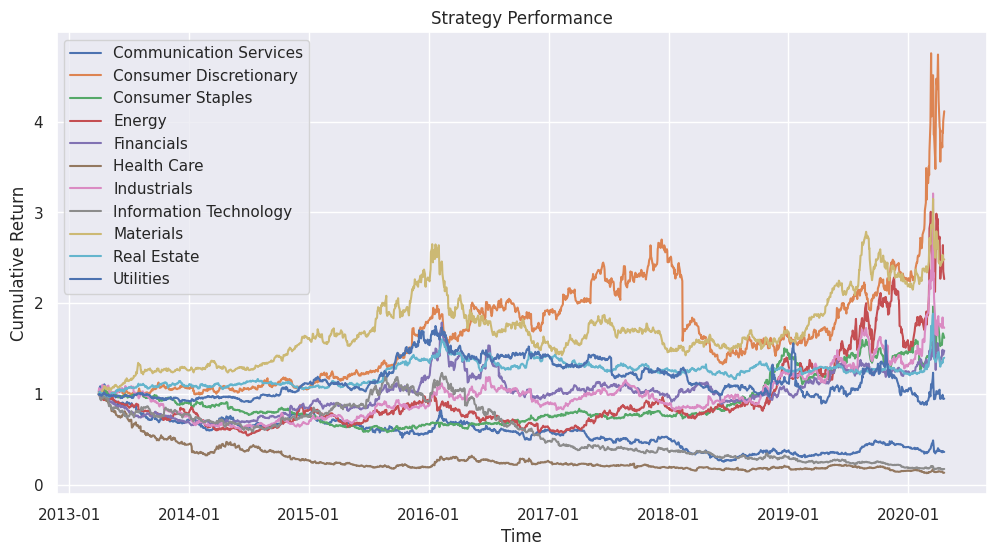

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))
index_results = []

for sector, sector_df in df_result.groupby('Sector'):
  # sector_sorted = sector_df.sort_values('MSE')
  # print(sector_sorted.head())
  # top3 = sector_sorted.head(3)
  # bottom3 = sector_sorted.tail(3)
  # select_ticker = top3 + bottom3
  # print(select_ticker)
  top3 = sector_df.sort_values('MSE').head(3)
  bottom3 = sector_df.sort_values('MSE').tail(3)

  selected = pd.concat([top3, bottom3])
  tickers = selected['Ticker'].tolist()
  long_ticker = top3['Ticker'].tolist()
  short_ticker = bottom3['Ticker'].tolist()

  df_selected = df[df['Ticker'].isin(tickers)]
  # price_data = df[df['Ticker'].isin(select_ticker['Ticker'].tolist())]
  sector_price = df_selected[df_selected['GICS Sector'] == sector]
  returns_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()

  weights = pd.DataFrame(0, index=returns_matrix.index, columns=returns_matrix.columns)
  if returns_matrix.empty or returns_matrix.shape[1] < 6:
    print(f"Skipping sector {sector} due to insufficient data.")
    continue

  for t in long_ticker:
      weights[t] = 1 / len(long_ticker)
  for t in short_ticker:
      weights[t] = -1 / len(short_ticker)
  # returns_matrix = sector_price.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  # returns_matrix = returns_matrix.dropna()



  # weights = pd.DataFrame(0, index=price_data.index, columns=price_data.columns)
  # for t in top3['Ticker'].tolist():
  #     weights[t] = 1 / len(top3)
  # for t in bottom3['Ticker'].tolist():
  #     weights[t] = -1 / len(bottom3)

  daily_pnl = (weights * returns_matrix).sum(axis=1)/100
  cumulative_pnl = (1 + daily_pnl).cumprod()
  cumulative_pnl.index = pd.to_datetime(cumulative_pnl.index)

  total_return = cumulative_pnl.iloc[-1] - 1
  max_drawdown = (cumulative_pnl / cumulative_pnl.cummax() - 1).min()
  sharpe_ratio = daily_pnl.mean() / daily_pnl.std() * (252 ** 0.5)
  win_ratio = (daily_pnl > 0).sum()/len(daily_pnl)
  volatility = daily_pnl.std() * (252 ** 0.5)

  print(f"Sector: {sector}")
  print(f"Total Return: {total_return}")
  print(f"Max Drawdown: {max_drawdown}")
  print(f"Sharpe Ratio: {sharpe_ratio}")
  print(f"Win Ratio: {win_ratio}")
  print(f"Volatility: {volatility}")
  if not daily_pnl.empty:
    metrics = {
        'Sector': sector,
        'Total Return': total_return,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Win Ratio': win_ratio,
        'Volatility': volatility
    }
    index_results.append(metrics)
  else:
    print(f"Skipping sector {sector} due to empty daily_pnl.")


  plt.plot(cumulative_pnl,label=f'{sector}')



# plt.plot(cumulative_pnl,label='long top3, short bottom 3')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Strategy Performance')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/strategy_performance.png')

In [ ]:
metrics_df = pd.DataFrame(index_results)

# Reorder columns if needed
metrics_df = metrics_df[[
    'Sector', 'Total Return', 'Sharpe Ratio', 'Volatility', 'Max Drawdown', 'Win Ratio'
]]

# Format numbers as percentages or with 2 decimals
metrics_df['Total Return'] = (metrics_df['Total Return']/100).apply(lambda x: f"{x:.2%}")
metrics_df['Volatility'] = metrics_df['Volatility'].apply(lambda x: f"{x:.2%}")
metrics_df['Max Drawdown'] = metrics_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")
metrics_df['Win Ratio'] = metrics_df['Win Ratio'].apply(lambda x: f"{x:.2%}")
metrics_df['Sharpe Ratio'] = metrics_df['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")

# Show the table
from IPython.display import display
display(metrics_df)

Sector Total Return Sharpe Ratio Volatility Max Drawdown  \
0   Communication Services       -0.64%        -0.36     28.58%      -76.92%   
1   Consumer Discretionary        3.12%         0.82     30.44%      -50.83%   
2         Consumer Staples        0.62%         0.42     21.95%      -44.45%   
3                   Energy        1.27%         0.51     34.77%      -45.74%   
4               Financials        0.48%         0.34     26.12%      -50.01%   
5              Health Care       -0.87%        -0.63     35.25%      -87.65%   
6              Industrials        0.73%         0.41     30.72%      -48.69%   
7   Information Technology       -0.82%        -0.69     29.31%      -86.45%   
8                Materials        1.48%         0.67     23.43%      -46.16%   
9              Real Estate        0.40%         0.36     17.14%      -30.94%   
10               Utilities       -0.05%         0.11     27.11%      -49.60%   

   Win Ratio  
0     48.85%  
1     51.94%  
2     51.44%  
3     51.21%  
4     51.27%  
5     48.51%  
6     48.96%  
7     49.24%  
8     53.29%  
9     51.94%  
10    49.92%

In [ ]:
top3 = df_result.sort_values('MSE').head(3)
bottom3 = df_result.sort_values('MSE').tail(3)

selected = pd.concat([top3, bottom3])
tickers = selected['Ticker'].tolist()
long_ticker = top3['Ticker'].tolist()
short_ticker = bottom3['Ticker'].tolist()

df_selected = df[df['Ticker'].isin(tickers)]
# price_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Close')
# price_matrix.head()

In [ ]:
returns_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()

weights = pd.DataFrame(0, index=returns_matrix.index, columns=returns_matrix.columns)
for t in long_ticker:
    weights[t] = 1 / len(long_ticker)
for t in short_ticker:
    weights[t] = -1 / len(short_ticker)

print("Tickers in returns:", returns_matrix.columns.tolist())
print("Tickers in weights:", weights.columns.tolist())


Tickers in returns: ['COF', 'GNW', 'LNC', 'MMC', 'RNR', 'WRB']
Tickers in weights: ['COF', 'GNW', 'LNC', 'MMC', 'RNR', 'WRB']


In [ ]:
weights.head()

Ticker           COF       GNW       LNC       MMC       RNR       WRB
Timestamp                                                             
2013-04-01 -0.333333 -0.333333 -0.333333  0.333333  0.333333  0.333333
2013-04-02 -0.333333 -0.333333 -0.333333  0.333333  0.333333  0.333333
2013-04-03 -0.333333 -0.333333 -0.333333  0.333333  0.333333  0.333333
2013-04-04 -0.333333 -0.333333 -0.333333  0.333333  0.333333  0.333333
2013-04-05 -0.333333 -0.333333 -0.333333  0.333333  0.333333  0.333333

In [ ]:
daily_pnl = (weights * returns_matrix).sum(axis=1)/100
cumulative_pnl = (1 + daily_pnl).cumprod()


In [ ]:
daily_pnl

Timestamp
2013-04-01   -0.007053
2013-04-02    0.016718
2013-04-03   -0.000677
2013-04-04    0.004415
2013-04-05   -0.011133
                ...   
2020-04-14    0.023431
2020-04-15    0.023486
2020-04-16   -0.033064
2020-04-17   -0.003410
2020-04-20    0.030776
Length: 1777, dtype: float64

In [ ]:
cumulative_pnl

Timestamp
2013-04-01    0.992947
2013-04-02    1.009547
2013-04-03    1.008864
2013-04-04    1.013318
2013-04-05    1.002037
                ...   
2020-04-14    1.454112
2020-04-15    1.488263
2020-04-16    1.439055
2020-04-17    1.434148
2020-04-20    1.478284
Length: 1777, dtype: float64

In [ ]:
cumulative_pnl.index = pd.to_datetime(cumulative_pnl.index)

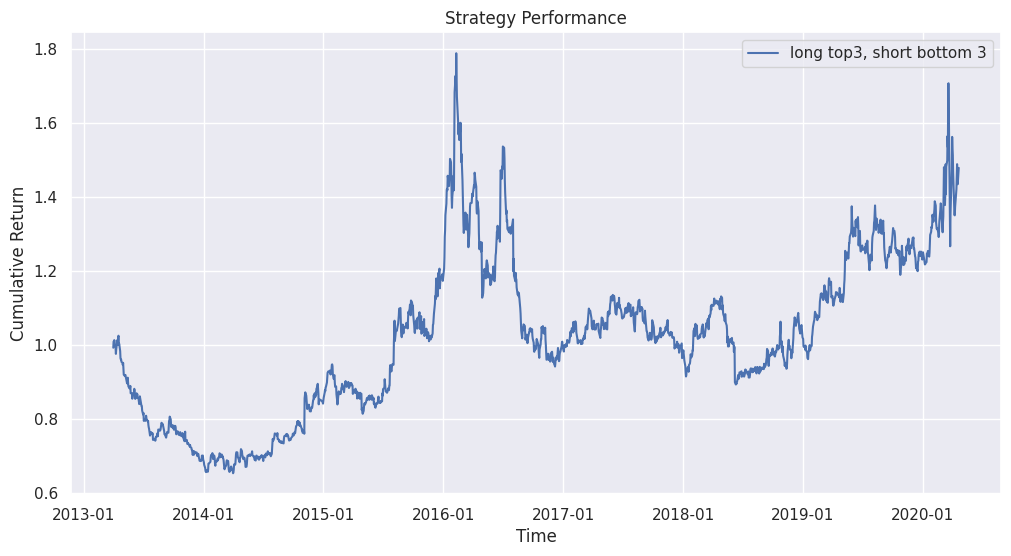

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(cumulative_pnl,label='long top3, short bottom 3')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Strategy Performance')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

#### KNN to predict the direction of movement
+ price change > 0, long the stocks
+ price change < 0, short the stocks

In [ ]:
SDG_features = [f'SDG_{i}' for i in range(1, 18)] + [f'STS_{i}' for i in range(1, 18)] + [f'LTS_{i}' for i in range(1, 18)]
target = 'Price_change'

In [ ]:
df.head()

Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [ ]:
from ast import mod
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

sector_result = []

for sector, group in df.groupby('GICS Sector'):
    if sector != 'Financials' and sector != 'Information Technology':
        continue
    tickers = group['Ticker'].unique()
    for ticker in tickers:
        print(f"Processing sector: {sector}, ticker:{ticker}")
        df_ticker = group[group['Ticker'] == ticker].dropna()
        if len(df_ticker) < 50:
            continue
        X = df_ticker[SDG_features]
        y = (df_ticker[target] > 0).astype(int)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print()
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        sector_result.append((sector, ticker, mae, mse, r2))

Processing sector: Financials, ticker:ACGL
Accuracy: 0.49050632911392406
              precision    recall  f1-score   support

           0       0.50      0.39      0.44       162
           1       0.48      0.60      0.53       154

    accuracy                           0.49       316
   macro avg       0.49      0.49      0.49       316
weighted avg       0.49      0.49      0.48       316

[[63 99]
 [62 92]]

Processing sector: Financials, ticker:AFG
Accuracy: 0.5615763546798029
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        79
           1       0.64      0.64      0.64       124

    accuracy                           0.56       203
   macro avg       0.54      0.54      0.54       203
weighted avg       0.56      0.56      0.56       203

[[35 44]
 [45 79]]

Processing sector: Financials, ticker:AFL
Accuracy: 0.49846153846153846
              precision    recall  f1-score   support

           0       0.51      0.37  

In [ ]:
len(sector_result)

121

In [ ]:
sector_result

[('Financials',
  'ACGL',
  0.509493670886076,
  0.509493670886076,
  -1.0392817059483725),
 ('Financials',
  'AFG',
  0.43842364532019706,
  0.43842364532019706,
  -0.8443242139648837),
 ('Financials',
  'AFL',
  0.5015384615384615,
  0.5015384615384615,
  -1.0070849435477758),
 ('Financials',
  'AIG',
  0.46438746438746437,
  0.46438746438746437,
  -0.8655601930350856),
 ('Financials',
  'AIZ',
  0.4419889502762431,
  0.4419889502762431,
  -0.7771232204221892),
 ('Financials',
  'ALL',
  0.532051282051282,
  0.532051282051282,
  -1.131358024691358),
 ('Financials',
  'ALLY',
  0.5394736842105263,
  0.5394736842105263,
  -1.1580607926125435),
 ('Financials', 'AMP', 0.52, 0.52, -1.124044180118946),
 ('Financials', 'AON', 0.5259259259259259, 0.5259259259259259, -1.109375),
 ('Financials',
  'AXP',
  0.48955223880597015,
  0.48955223880597015,
  -0.963264722698685),
 ('Financials',
  'BAC',
  0.49008498583569404,
  0.49008498583569404,
  -0.9616150584607475),
 ('Financials',
  'BEN',
  0

#### XGBoost


In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
for sector, group in df.groupby('GICS Sector'):
    # if sector != 'Financials' and sector != 'Information Technology':
    #     continue
    tickers = group['Ticker'].unique()
    for ticker in tickers:
        print(f"Processing sector: {sector}, ticker:{ticker}")
        df_ticker = group[group['Ticker'] == ticker].dropna()
        if len(df_ticker) < 50:
            continue
        X = df_ticker[SDG_features]
        y = df_ticker[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        xgb_train = xgb.DMatrix(X_train, label=y_train)
        xgb_test = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'eta': 0.1,
            'max_depth': 6,
            'learning_rate': 0.1,
        }
        n = 50
        model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)
        y_pred = model.predict(xgb_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")
        print()
        sector_result.append((sector, ticker, mae, mse, r2))

Processing sector: Communication Services, ticker:CMCSA
MAE: 1.0818812418175807, MSE: 2.301209461614488, R2: -0.11989611661552257

Processing sector: Communication Services, ticker:DIS
MAE: 0.9660158387623246, MSE: 2.1661911123872337, R2: -0.2515874202663744

Processing sector: Communication Services, ticker:EA
MAE: 1.5582495167019943, MSE: 5.258229968216677, R2: -0.15222965830602297

Processing sector: Communication Services, ticker:FWONK
Processing sector: Communication Services, ticker:IPG
MAE: 1.3628471660182757, MSE: 5.43813534163814, R2: -0.2740961268172186

Processing sector: Communication Services, ticker:LYV
MAE: 1.4944370499238893, MSE: 5.784300948888718, R2: 0.02344226189660159

Processing sector: Communication Services, ticker:NFLX
MAE: 1.8721283691942567, MSE: 7.5457854015723695, R2: -0.07202201868367442

Processing sector: Communication Services, ticker:NWSA
MAE: 1.2911430488874847, MSE: 3.292704167366288, R2: -0.07597930533606445

Processing sector: Communication Service

In [ ]:
len(sector_result)

685

In [ ]:
df_result = pd.DataFrame(sector_result, columns=['Sector','Ticker', 'MAE', 'MSE', 'R2'])
df_result.dropna(inplace=True)

In [ ]:
df_result.head()

Sector Ticker       MAE       MSE        R2
0  Financials   ACGL  0.509494  0.509494 -1.039282
1  Financials    AFG  0.438424  0.438424 -0.844324
2  Financials    AFL  0.501538  0.501538 -1.007085
3  Financials    AIG  0.464387  0.464387 -0.865560
4  Financials    AIZ  0.441989  0.441989 -0.777123

In [ ]:
df.head()

Timestamp Ticker          ISIN            Company_Name GICS Sector  \
0 2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials   
1 2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials   
2 2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials   
3 2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials   
4 2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials   

      SDG_1    SDG_2     SDG_3     SDG_4     SDG_5  ...  SDG_16_News_Volume  \
0 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
1 -0.426378 -0.44602  4.885057  0.553236 -0.974007  ...            1.000000   
2 -0.426378 -0.44602  5.569007  0.553236 -0.974007  ...            1.000000   
3 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
4 -0.426378 -0.44602  2.188655  0.553236 -0.974007  ...            2.000000   

   SDG_17_News_Volume  SDG_News_Volume_Mean      Close       High        Low  \
0            1.573566                   NaN  16.662910  16.998896  16.532956   
1            1.573566                   1.0  16.628046  16.764340  16.583670   
2            1.573566                   1.0  16.491749  16.735814  16.463223   
3            1.573566                   NaN  16.418848  16.555144  16.364963   
4            1.573566                   2.0  16.368134  16.447376  16.235008   

        Open   Volume        Amount  Price_change  
0  16.704118  1390500  2.316978e+07     -0.209234  
1  16.758001  1300200  2.161979e+07     -0.819683  
2  16.688268  1402200  2.312473e+07     -0.442044  
3  16.532957  2694000  4.423238e+07     -0.308880  
4  16.339606  1557000  2.548518e+07      0.542217  

[5 rows x 102 columns]

        Timestamp Ticker          ISIN       Company_Name  \
551452 2013-04-01    OMC  US6819191064  omnicom group inc   
551453 2013-04-02    OMC  US6819191064  omnicom group inc   
551454 2013-04-03    OMC  US6819191064  omnicom group inc   
551455 2013-04-04    OMC  US6819191064  omnicom group inc   
551456 2013-04-05    OMC  US6819191064  omnicom group inc   

                   GICS Sector   SDG_1     SDG_2     SDG_3     SDG_4  \
551452  Communication Services  0.8395  1.039153  1.719083  2.402397   
551453  Communication Services  0.8395  1.039153  1.719083  2.693605   
551454  Communication Services  0.8395  1.039153  1.719083  2.402397   
551455  Communication Services  0.8395  1.039153  1.719083  2.402397   
551456  Communication Services  0.8395  1.039153  1.719083  2.402397   

           SDG_5  ...  SDG_16_News_Volume  SDG_17_News_Volume  \
551452  0.776818  ...            3.303303            2.252492   
551453  0.776818  ...            3.303303            2.252492   
55145

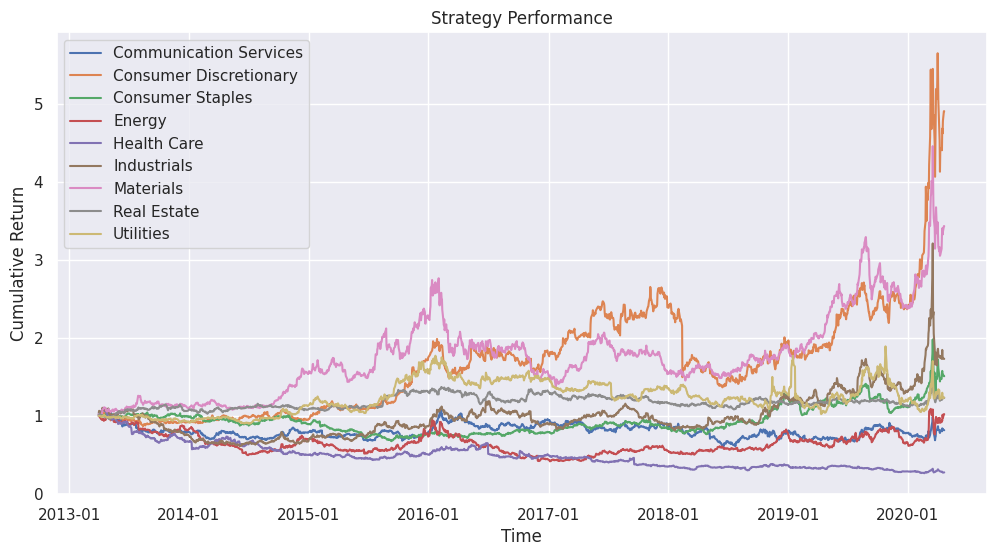

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))
index_results = []

for sector, sector_df in df_result.groupby('Sector'):
  # sector_sorted = sector_df.sort_values('MSE')
  # print(sector_sorted.head())
  # top3 = sector_sorted.head(3)
  # bottom3 = sector_sorted.tail(3)
  # select_ticker = top3 + bottom3
  # print(select_ticker)
  top3 = sector_df.sort_values('MSE').head(3)
  bottom3 = sector_df.sort_values('MSE').tail(3)

  selected = pd.concat([top3, bottom3])
  tickers = selected['Ticker'].tolist()
  long_ticker = top3['Ticker'].tolist()
  short_ticker = bottom3['Ticker'].tolist()
  # print(f"tickers : {tickers}")
  df_selected = df[df['Ticker'].isin(tickers)]
  print(df_selected.head())
  # price_data = df[df['Ticker'].isin(select_ticker['Ticker'].tolist())]
  sector_price = df_selected[df_selected['GICS Sector'] == sector]
  returns_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  weights = pd.DataFrame(0, index=returns_matrix.index, columns=returns_matrix.columns)
  if returns_matrix.empty or returns_matrix.shape[1] < 6:
    print(f"Skipping sector {sector} due to insufficient data.")
    continue

  for t in long_ticker:
      weights[t] = 1 / len(long_ticker)
  for t in short_ticker:
      weights[t] = -1 / len(short_ticker)
  # returns_matrix = sector_price.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  # returns_matrix = returns_matrix.dropna()



  # weights = pd.DataFrame(0, index=price_data.index, columns=price_data.columns)
  # for t in top3['Ticker'].tolist():
  #     weights[t] = 1 / len(top3)
  # for t in bottom3['Ticker'].tolist():
  #     weights[t] = -1 / len(bottom3)

  daily_pnl = (weights * returns_matrix).sum(axis=1)/100
  cumulative_pnl = (1 + daily_pnl).cumprod()
  cumulative_pnl.index = pd.to_datetime(cumulative_pnl.index)

  total_return = cumulative_pnl.iloc[-1] - 1
  max_drawdown = (cumulative_pnl / cumulative_pnl.cummax() - 1).min()
  sharpe_ratio = daily_pnl.mean() / daily_pnl.std() * (252 ** 0.5)
  win_ratio = (daily_pnl > 0).sum()/len(daily_pnl)
  volatility = daily_pnl.std() * (252 ** 0.5)

  print(f"Sector: {sector}")
  print(f"Total Return: {total_return}")
  print(f"Max Drawdown: {max_drawdown}")
  print(f"Sharpe Ratio: {sharpe_ratio}")
  print(f"Win Ratio: {win_ratio}")
  print(f"Volatility: {volatility}")
  if not daily_pnl.empty:
    metrics = {
        'Sector': sector,
        'Total Return': total_return,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Win Ratio': win_ratio,
        'Volatility': volatility
    }
    index_results.append(metrics)
  else:
    print(f"Skipping sector {sector} due to empty daily_pnl.")


  plt.plot(cumulative_pnl,label=f'{sector}')



# plt.plot(cumulative_pnl,label='long top3, short bottom 3')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Strategy Performance')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
# plt.savefig('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/strategy_performance.png')

In [ ]:
df.columns

Index(['Ticker', 'ISIN', 'Company_Name', 'GICS Sector', 'SDG_1', 'SDG_2',
       'SDG_3', 'SDG_4', 'SDG_5', 'SDG_6',
       ...
       'SDG_16_News_Volume', 'SDG_17_News_Volume', 'SDG_News_Volume_Mean',
       'Close', 'High', 'Low', 'Open', 'Volume', 'Amount', 'Price_change'],
      dtype='object', length=101)

In [ ]:
df.head()

Ticker          ISIN            Company_Name GICS Sector     SDG_1  \
Timestamp                                                                       
2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   
2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials -0.426378   

              SDG_2     SDG_3     SDG_4     SDG_5     SDG_6  ...  \
Timestamp                                                    ...   
2013-04-01 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-02 -0.44602  4.885057  0.553236 -0.974007  0.027248  ...   
2013-04-03 -0.44602  5.569007  0.553236 -0.974007  0.027248  ...   
2013-04-04 -0.44602 -0.391764  0.553236 -0.974007  0.027248  ...   
2013-04-05 -0.44602  2.188655  0.553236 -0.974007  0.027248  ...   

            SDG_16_News_Volume  SDG_17_News_Volume  SDG_News_Volume_Mean  \
Timestamp                                                                  
2013-04-01            3.829851            1.573566                   NaN   
2013-04-02            1.000000            1.573566                   1.0   
2013-04-03            1.000000            1.573566                   1.0   
2013-04-04            3.829851            1.573566                   NaN   
2013-04-05            2.000000            1.573566                   2.0   

                Close       High        Low       Open   Volume        Amount  \
Timestamp                                                                       
2013-04-01  16.662910  16.998896  16.532956  16.704118  1390500  2.316978e+07   
2013-04-02  16.628046  16.764340  16.583670  16.758001  1300200  2.161979e+07   
2013-04-03  16.491749  16.735814  16.463223  16.688268  1402200  2.312473e+07   
2013-04-04  16.418848  16.555144  16.364963  16.532957  2694000  4.423238e+07   
2013-04-05  16.368134  16.447376  16.235008  16.339606  1557000  2.548518e+07   

            Price_change  
Timestamp                 
2013-04-01     -0.209234  
2013-04-02     -0.819683  
2013-04-03     -0.442044  
2013-04-04     -0.308880  
2013-04-05      0.542217  

[5 rows x 101 columns]

In [ ]:
df.reset_index(names=['Timestamp'], inplace=True)

In [ ]:
df.head()

Timestamp Ticker          ISIN            Company_Name GICS Sector  \
0 2013-04-01   ACGL  BMG0450A1053  arch capital group ltd  Financials   
1 2013-04-02   ACGL  BMG0450A1053  arch capital group ltd  Financials   
2 2013-04-03   ACGL  BMG0450A1053  arch capital group ltd  Financials   
3 2013-04-04   ACGL  BMG0450A1053  arch capital group ltd  Financials   
4 2013-04-05   ACGL  BMG0450A1053  arch capital group ltd  Financials   

      SDG_1    SDG_2     SDG_3     SDG_4     SDG_5  ...  SDG_16_News_Volume  \
0 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
1 -0.426378 -0.44602  4.885057  0.553236 -0.974007  ...            1.000000   
2 -0.426378 -0.44602  5.569007  0.553236 -0.974007  ...            1.000000   
3 -0.426378 -0.44602 -0.391764  0.553236 -0.974007  ...            3.829851   
4 -0.426378 -0.44602  2.188655  0.553236 -0.974007  ...            2.000000   

   SDG_17_News_Volume  SDG_News_Volume_Mean      Close       High        Low  \
0            1.573566                   NaN  16.662910  16.998896  16.532956   
1            1.573566                   1.0  16.628046  16.764340  16.583670   
2            1.573566                   1.0  16.491749  16.735814  16.463223   
3            1.573566                   NaN  16.418848  16.555144  16.364963   
4            1.573566                   2.0  16.368134  16.447376  16.235008   

        Open   Volume        Amount  Price_change  
0  16.704118  1390500  2.316978e+07     -0.209234  
1  16.758001  1300200  2.161979e+07     -0.819683  
2  16.688268  1402200  2.312473e+07     -0.442044  
3  16.532957  2694000  4.423238e+07     -0.308880  
4  16.339606  1557000  2.548518e+07      0.542217  

[5 rows x 102 columns]

In [ ]:
metrics_df = pd.DataFrame(index_results)

# Reorder columns if needed
metrics_df = metrics_df[[
    'Sector', 'Total Return', 'Sharpe Ratio', 'Volatility', 'Max Drawdown', 'Win Ratio'
]]

# Format numbers as percentages or with 2 decimals
metrics_df['Total Return'] = (metrics_df['Total Return']/100).apply(lambda x: f"{x:.2%}")
metrics_df['Volatility'] = metrics_df['Volatility'].apply(lambda x: f"{x:.2%}")
metrics_df['Max Drawdown'] = metrics_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")
metrics_df['Win Ratio'] = metrics_df['Win Ratio'].apply(lambda x: f"{x:.2%}")
metrics_df['Sharpe Ratio'] = metrics_df['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")

# Show the table
from IPython.display import display
display(metrics_df)

Sector Total Return Sharpe Ratio Volatility Max Drawdown  \
0  Communication Services       -0.18%         0.02     26.04%      -44.76%   
1  Consumer Discretionary        3.90%         0.87     31.93%      -48.52%   
2        Consumer Staples        0.51%         0.38     21.83%      -35.36%   
3                  Energy        0.02%         0.17     31.60%      -58.89%   
4             Health Care       -0.72%        -0.63     24.23%      -75.94%   
5             Industrials        0.73%         0.41     30.72%      -48.69%   
6               Materials        2.43%         0.76     28.15%      -50.35%   
7             Real Estate        0.23%         0.27     15.18%      -25.32%   
8               Utilities        0.24%         0.25     28.34%      -44.54%   

  Win Ratio  
0    50.45%  
1    51.91%  
2    51.80%  
3    49.89%  
4    48.88%  
5    48.93%  
6    52.98%  
7    51.74%  
8    50.62%

#### random forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for sector, group in df.groupby('GICS Sector'):
    if sector != 'Financials' and sector != 'Information Technology':
        continue
    tickers = group['Ticker'].unique()
    for ticker in tickers:
        print(f"Processing sector: {sector}, ticker:{ticker}")
        df_ticker = group[group['Ticker'] == ticker].dropna()
        if len(df_ticker) < 50:
            continue
        X = df_ticker[SDG_features]
        y = df_ticker[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")
        print()
        sector_result.append((sector, ticker, mae, mse, r2))

Processing sector: Financials, ticker:ACGL
MAE: 0.8504035296543386, MSE: 1.6617131056959045, R2: -0.15310749797097856

Processing sector: Financials, ticker:AFG
MAE: 1.0236229584358518, MSE: 7.706381506557697, R2: -1.1368612585827442

Processing sector: Financials, ticker:AFL
MAE: 0.9671735978976508, MSE: 2.854956870915301, R2: -0.2499094198046654

Processing sector: Financials, ticker:AIG
MAE: 1.2655917898766889, MSE: 5.880527539752536, R2: -0.43536599518525954

Processing sector: Financials, ticker:AIZ
MAE: 1.0690286594961662, MSE: 2.674034685943849, R2: -0.1664114650560291

Processing sector: Financials, ticker:ALL
MAE: 0.9356962897734834, MSE: 2.3735036607691233, R2: -0.06093656681259718

Processing sector: Financials, ticker:ALLY
MAE: 1.4099297616738327, MSE: 5.077880836247515, R2: -0.32676218560052384

Processing sector: Financials, ticker:AMG
Processing sector: Financials, ticker:AMP
MAE: 1.389564835887942, MSE: 5.048307846825393, R2: -0.14019910900879462

Processing sector: Fin

In [ ]:
df_result = pd.DataFrame(sector_result, columns=['Sector','Ticker', 'MAE', 'MSE', 'R2'])
df_result.dropna(inplace=True)

In [ ]:
metrics_df = pd.DataFrame(index_results)

# Reorder columns if needed
metrics_df = metrics_df[[
    'Sector', 'Total Return', 'Sharpe Ratio', 'Volatility', 'Max Drawdown', 'Win Ratio'
]]

# Format numbers as percentages or with 2 decimals
metrics_df['Total Return'] = (metrics_df['Total Return']/100).apply(lambda x: f"{x:.2%}")
metrics_df['Volatility'] = metrics_df['Volatility'].apply(lambda x: f"{x:.2%}")
metrics_df['Max Drawdown'] = metrics_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")
metrics_df['Win Ratio'] = metrics_df['Win Ratio'].apply(lambda x: f"{x:.2%}")
metrics_df['Sharpe Ratio'] = metrics_df['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")

# Show the table
from IPython.display import display
display(metrics_df)

Sector Total Return Sharpe Ratio Volatility Max Drawdown  \
0  Communication Services       -0.18%         0.02     26.04%      -44.76%   
1  Consumer Discretionary        3.90%         0.87     31.93%      -48.52%   
2        Consumer Staples        0.51%         0.38     21.83%      -35.36%   
3                  Energy        0.02%         0.17     31.60%      -58.89%   
4             Health Care       -0.72%        -0.63     24.23%      -75.94%   
5             Industrials        0.73%         0.41     30.72%      -48.69%   
6               Materials        2.43%         0.76     28.15%      -50.35%   
7             Real Estate        0.23%         0.27     15.18%      -25.32%   
8               Utilities        0.24%         0.25     28.34%      -44.54%   

  Win Ratio  
0    50.45%  
1    51.91%  
2    51.80%  
3    49.89%  
4    48.88%  
5    48.93%  
6    52.98%  
7    51.74%  
8    50.62%

        Timestamp Ticker          ISIN       Company_Name  \
551452 2013-04-01    OMC  US6819191064  omnicom group inc   
551453 2013-04-02    OMC  US6819191064  omnicom group inc   
551454 2013-04-03    OMC  US6819191064  omnicom group inc   
551455 2013-04-04    OMC  US6819191064  omnicom group inc   
551456 2013-04-05    OMC  US6819191064  omnicom group inc   

                   GICS Sector   SDG_1     SDG_2     SDG_3     SDG_4  \
551452  Communication Services  0.8395  1.039153  1.719083  2.402397   
551453  Communication Services  0.8395  1.039153  1.719083  2.693605   
551454  Communication Services  0.8395  1.039153  1.719083  2.402397   
551455  Communication Services  0.8395  1.039153  1.719083  2.402397   
551456  Communication Services  0.8395  1.039153  1.719083  2.402397   

           SDG_5  ...  SDG_16_News_Volume  SDG_17_News_Volume  \
551452  0.776818  ...            3.303303            2.252492   
551453  0.776818  ...            3.303303            2.252492   
55145

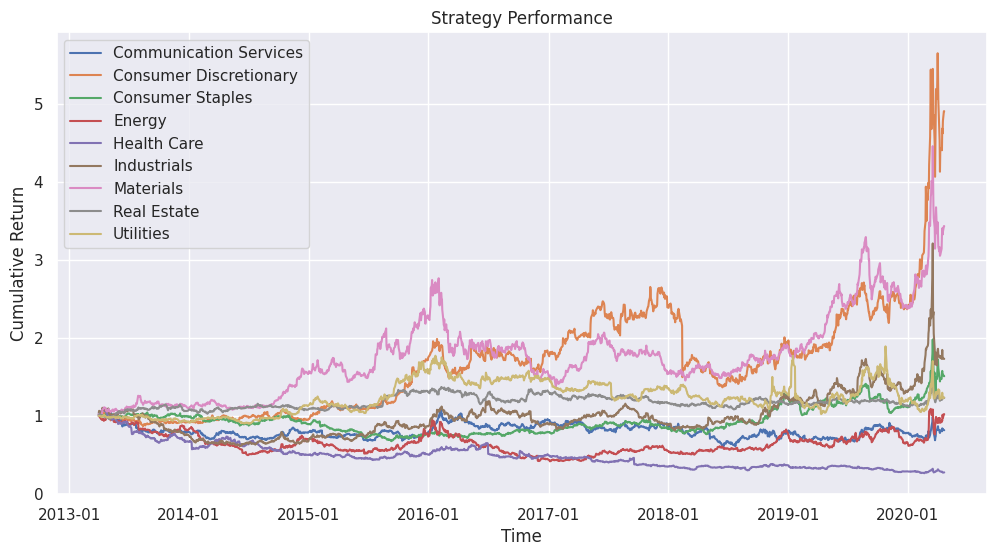

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))
index_results = []

for sector, sector_df in df_result.groupby('Sector'):
  # sector_sorted = sector_df.sort_values('MSE')
  # print(sector_sorted.head())
  # top3 = sector_sorted.head(3)
  # bottom3 = sector_sorted.tail(3)
  # select_ticker = top3 + bottom3
  # print(select_ticker)
  top3 = sector_df.sort_values('MSE').head(3)
  bottom3 = sector_df.sort_values('MSE').tail(3)

  selected = pd.concat([top3, bottom3])
  tickers = selected['Ticker'].tolist()
  long_ticker = top3['Ticker'].tolist()
  short_ticker = bottom3['Ticker'].tolist()
  # print(f"tickers : {tickers}")
  df_selected = df[df['Ticker'].isin(tickers)]
  print(df_selected.head())
  # price_data = df[df['Ticker'].isin(select_ticker['Ticker'].tolist())]
  sector_price = df_selected[df_selected['GICS Sector'] == sector]
  returns_matrix = df_selected.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  weights = pd.DataFrame(0, index=returns_matrix.index, columns=returns_matrix.columns)
  if returns_matrix.empty or returns_matrix.shape[1] < 6:
    print(f"Skipping sector {sector} due to insufficient data.")
    continue

  for t in long_ticker:
      weights[t] = 1 / len(long_ticker)
  for t in short_ticker:
      weights[t] = -1 / len(short_ticker)
  # returns_matrix = sector_price.pivot(index='Timestamp', columns='Ticker', values='Price_change').sort_index()
  # returns_matrix = returns_matrix.dropna()



  # weights = pd.DataFrame(0, index=price_data.index, columns=price_data.columns)
  # for t in top3['Ticker'].tolist():
  #     weights[t] = 1 / len(top3)
  # for t in bottom3['Ticker'].tolist():
  #     weights[t] = -1 / len(bottom3)

  daily_pnl = (weights * returns_matrix).sum(axis=1)/100
  cumulative_pnl = (1 + daily_pnl).cumprod()
  cumulative_pnl.index = pd.to_datetime(cumulative_pnl.index)

  total_return = cumulative_pnl.iloc[-1] - 1
  max_drawdown = (cumulative_pnl / cumulative_pnl.cummax() - 1).min()
  sharpe_ratio = daily_pnl.mean() / daily_pnl.std() * (252 ** 0.5)
  win_ratio = (daily_pnl > 0).sum()/len(daily_pnl)
  volatility = daily_pnl.std() * (252 ** 0.5)

  print(f"Sector: {sector}")
  print(f"Total Return: {total_return}")
  print(f"Max Drawdown: {max_drawdown}")
  print(f"Sharpe Ratio: {sharpe_ratio}")
  print(f"Win Ratio: {win_ratio}")
  print(f"Volatility: {volatility}")
  if not daily_pnl.empty:
    metrics = {
        'Sector': sector,
        'Total Return': total_return,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Win Ratio': win_ratio,
        'Volatility': volatility
    }
    index_results.append(metrics)
  else:
    print(f"Skipping sector {sector} due to empty daily_pnl.")


  plt.plot(cumulative_pnl,label=f'{sector}')



# plt.plot(cumulative_pnl,label='long top3, short bottom 3')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Strategy Performance')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
# plt.savefig('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/strategy_performance.png')